### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, roc_curve, log_loss, precision_score,recall_score,f1_score
from glob import glob #  glob (short for global) is used to return all file paths that match a specific pattern.
import scipy.stats as stat # For Q-Q plot
import pylab 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score # Cross validation
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ClassificationReport
sns.set()

### Creating a list of all csv files in dws_1 folder

In [2]:
# Here we are going to create a list of all csv files present in dws_1 folder
dws_1_files=sorted(glob("D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\dws_1\\sub_*.csv"))
dws_1_files

['D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\dws_1\\sub_1.csv',
 'D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\dws_1\\sub_10.csv',
 'D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\dws_1\\sub_11.csv',
 'D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\dws_1\\sub_12.csv',
 'D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\dws_1\\sub_13.csv',
 'D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\dws_1\\sub_14.csv',
 'D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\dws_1\\sub_15.csv',
 'D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\dws_1\\sub_16.csv',
 'D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\dws_1\\sub_17.csv',
 'D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\dws_1\\sub_18.csv',
 'D:\\AAKASH\\DATA SC

### Combining all the csv files of dws_1 folder

In [3]:
dws_1=pd.concat((pd.read_csv(file).assign(Action="downstairs")
          for  file in dws_1_files),ignore_index=True)
dws_1.columns

Index(['Unnamed: 0', 'attitude.roll', 'attitude.pitch', 'attitude.yaw',
       'gravity.x', 'gravity.y', 'gravity.z', 'rotationRate.x',
       'rotationRate.y', 'rotationRate.z', 'userAcceleration.x',
       'userAcceleration.y', 'userAcceleration.z', 'Action'],
      dtype='object')

In [4]:
dws_1.drop(labels=["Unnamed: 0"],axis=1,inplace=True) # Dropping the unnamed column from dws_1 dataframe
print("Shape of dws_1 is:",dws_1.shape) # Shape of dws_1 dataframe
dws_1.head() # Top 5 rows of dws_1

Shape of dws_1 is: (50246, 13)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,downstairs
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,downstairs
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,downstairs
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,downstairs
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,downstairs


### Combining all the csv files of dws_2 folder

In [5]:
dws_2_files=sorted(glob("D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\dws_2\\sub_*.csv"))
dws_2=pd.concat((pd.read_csv(file).assign(Action="downstairs")
          for  file in dws_2_files),ignore_index=True)
dws_2.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
print("Shape of dws_2 is:",dws_2.shape)
dws_2.head()

Shape of dws_2 is: (59108, 13)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
0,0.055270,-0.954541,-0.609278,0.031929,0.816048,-0.577101,1.239972,-1.472075,0.198973,-0.432808,-0.107629,0.338057,downstairs
1,0.034557,-0.942493,-0.606960,0.020308,0.809026,-0.587422,0.091025,-0.944193,-0.012691,-0.450254,-0.134344,0.312718,downstairs
2,0.016687,-0.959855,-0.610954,0.009572,0.819108,-0.573559,-1.416476,-0.624047,-0.178523,-0.206303,-0.353853,0.164288,downstairs
3,0.000695,-1.003050,-0.620385,0.000374,0.843115,-0.537733,-2.503633,-0.320223,-0.356354,-0.151405,-0.341253,0.082167,downstairs
4,-0.017676,-1.060086,-0.634626,-0.008640,0.872398,-0.488720,-2.977756,-0.321077,-0.264592,-0.157269,-0.469489,0.003064,downstairs


### Combining all the csv files of dws_11 folder

In [6]:
dws_11_files=sorted(glob("D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\dws_11\\sub_*.csv"))
dws_11=pd.concat((pd.read_csv(file).assign(Action="downstairs")
          for  file in dws_11_files),ignore_index=True)
dws_11.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
print("Shape of dws_11 is:",dws_11.shape)
dws_11.head()

Shape of dws_11 is: (22502, 13)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
0,0.086504,-1.172129,1.181660,0.033538,0.921579,-0.386739,1.461974,-4.623707,1.674768,-0.067855,-0.048792,0.413061,downstairs
1,0.059454,-1.146609,1.248254,0.024456,0.911373,-0.410853,0.969699,-4.170838,1.271234,-0.160289,-0.187298,0.645487,downstairs
2,0.029339,-1.130040,1.295114,0.012515,0.904429,-0.426440,0.704113,-3.355548,0.880569,-0.217700,-0.262095,0.587390,downstairs
3,-0.004340,-1.119799,1.327633,-0.001892,0.900013,-0.435860,0.353412,-3.073109,0.617112,-0.186981,-0.207996,0.391212,downstairs
4,-0.041066,-1.118417,1.351262,-0.017945,0.899410,-0.436738,-0.076783,-2.783454,0.482344,-0.153762,-0.193431,0.464860,downstairs


### Combining all the csv files of jog_9 folder

In [7]:
jog_9_files=sorted(glob("D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\jog_9\\sub_*.csv"))
jog_9=pd.concat((pd.read_csv(file).assign(Action="jogging")
          for  file in jog_9_files),ignore_index=True)
jog_9.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
print("Shape of jog_9 is:",jog_9.shape)
jog_9.head()

Shape of jog_9 is: (104327, 13)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
0,3.058304,-1.227988,2.570999,0.027964,0.941814,0.334969,0.160508,-1.386834,-0.749713,0.204199,0.172657,-0.801048,jogging
1,3.075964,-1.225818,2.615277,0.022178,0.941083,0.337448,-0.217198,-0.612402,-0.682841,0.089974,-0.373914,-0.506332,jogging
2,3.103364,-1.235013,2.651791,0.012594,0.944152,0.329269,0.663253,-0.498534,-0.620223,0.260127,-0.364364,-0.781249,jogging
3,3.109208,-1.244901,2.678484,0.010366,0.947364,0.319989,0.458100,-1.202168,-0.304561,0.584253,-0.922813,-0.285169,jogging
4,3.074214,-1.263514,2.661371,0.020364,0.953159,0.301783,1.347809,-0.550578,0.610944,0.626501,-1.045978,-0.063884,jogging


### Combining all the csv files of jog_16 folder

In [8]:
jog_16_files=sorted(glob("D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\jog_16\\sub_*.csv"))
jog_16=pd.concat((pd.read_csv(file).assign(Action="jogging")
          for  file in jog_16_files),ignore_index=True)
jog_16.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
print("Shape of jog_16 is:",jog_16.shape)
jog_16.head()

Shape of jog_16 is: (29904, 13)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
0,2.135357,-1.138555,1.678900,0.353903,0.908029,0.224134,-0.255821,0.499133,-0.725292,0.778940,0.051810,-1.657163,jogging
1,2.162745,-1.152928,1.739330,0.336766,0.913956,0.226435,-1.015571,-1.724624,-1.266134,0.613780,-0.112152,-0.879374,jogging
2,2.175561,-1.166584,1.770651,0.323538,0.919413,0.223615,0.784464,-0.237245,-0.759811,0.413660,-0.630365,-0.428647,jogging
3,2.105621,-1.194708,1.696332,0.315997,0.930108,0.187202,2.235062,-0.180857,-0.135523,0.372556,-0.915796,-0.859046,jogging
4,2.021151,-1.202365,1.626949,0.324243,0.932893,0.156769,0.528382,-1.351467,0.512080,0.139503,-1.002214,-0.005295,jogging


### Combining all the csv files of sit_5 folder

In [9]:
sit_5_files=sorted(glob("D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\sit_5\\sub_*.csv"))
sit_5=pd.concat((pd.read_csv(file).assign(Action="sitting")
          for  file in sit_5_files),ignore_index=True)
sit_5.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
print("Shape of sit_5 is:",sit_5.shape)
sit_5.head()

Shape of sit_5 is: (234657, 13)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
0,0.351138,-0.416302,-0.098023,0.314588,0.404381,-0.858784,-0.003655,0.009577,-0.000234,0.000094,0.000252,-0.006954,sitting
1,0.351219,-0.416372,-0.098025,0.314649,0.404445,-0.858732,-0.007937,0.007457,0.000807,-0.001309,0.002262,-0.010348,sitting
2,0.351145,-0.416497,-0.098045,0.314567,0.404560,-0.858708,-0.007960,-0.001053,-0.002387,-0.002174,0.000012,-0.006664,sitting
3,0.350849,-0.416695,-0.098148,0.314286,0.404740,-0.858726,-0.000521,-0.006411,-0.001261,0.001693,0.009216,-0.011575,sitting
4,0.350859,-0.416863,-0.098022,0.314271,0.404894,-0.858658,-0.001613,-0.004306,0.006206,0.005767,0.007490,-0.008926,sitting


### Combining all the csv files of sit_13 folder

In [10]:
sit_13_files=sorted(glob("D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\sit_13\\sub_*.csv"))
sit_13=pd.concat((pd.read_csv(file).assign(Action="sitting")
          for  file in sit_13_files),ignore_index=True)
sit_13.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
print("Shape of sit_13 is:",sit_13.shape)
sit_13.head()

Shape of sit_13 is: (104121, 13)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
0,0.351138,-0.416302,-0.098023,0.314588,0.404381,-0.858784,-0.003655,0.009577,-0.000234,0.000094,0.000252,-0.006954,sitting
1,0.351219,-0.416372,-0.098025,0.314649,0.404445,-0.858732,-0.007937,0.007457,0.000807,-0.001309,0.002262,-0.010348,sitting
2,0.351145,-0.416497,-0.098045,0.314567,0.404560,-0.858708,-0.007960,-0.001053,-0.002387,-0.002174,0.000012,-0.006664,sitting
3,0.350849,-0.416695,-0.098148,0.314286,0.404740,-0.858726,-0.000521,-0.006411,-0.001261,0.001693,0.009216,-0.011575,sitting
4,0.350859,-0.416863,-0.098022,0.314271,0.404894,-0.858658,-0.001613,-0.004306,0.006206,0.005767,0.007490,-0.008926,sitting


### Combining all the csv files of std_6 folder

In [11]:
std_6_files=sorted(glob("D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\std_6\\sub_*.csv"))
std_6=pd.concat((pd.read_csv(file).assign(Action="standing")
          for  file in std_6_files),ignore_index=True)
std_6.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
print("Shape of std_6 is:",std_6.shape)
std_6.head()

Shape of std_6 is: (224816, 13)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
0,2.489271,-1.397067,1.899690,0.104929,0.984947,0.137365,-0.060667,-0.333742,-0.008674,0.007192,-0.004249,0.065989,standing
1,2.488154,-1.396068,1.905025,0.105682,0.984774,0.138030,-0.073340,-0.302813,-0.006666,-0.082061,0.004820,0.022905,standing
2,2.489687,-1.394939,1.912298,0.106144,0.984577,0.139074,-0.090184,-0.270723,-0.024985,-0.101612,0.008953,0.002664,standing
3,2.494505,-1.393874,1.922063,0.106105,0.984390,0.140421,-0.089858,-0.213139,-0.040011,-0.113307,0.020615,-0.029093,standing
4,2.500577,-1.393094,1.931172,0.105709,0.984253,0.141678,-0.070132,-0.098153,-0.041089,-0.111187,0.026429,-0.034393,standing


### Combining all the csv files of std_14 folder

In [12]:
std_14_files=sorted(glob("D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\std_14\\sub_*.csv"))
std_14=pd.concat((pd.read_csv(file).assign(Action="standing")
          for  file in std_14_files),ignore_index=True)
std_14.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
print("Shape of std_14 is:",std_14.shape)
std_14.head()

Shape of std_14 is: (81611, 13)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
0,1.573929,-1.051363,1.611548,0.496386,0.868100,0.001555,-0.027765,-0.014517,0.096305,0.019346,0.030886,0.008607,standing
1,1.573086,-1.051097,1.611145,0.496618,0.867968,0.001137,-0.031915,-0.006982,0.079159,-0.069464,0.063764,-0.021080,standing
2,1.574466,-1.050255,1.612825,0.497346,0.867550,0.001825,-0.041191,0.001830,0.014990,-0.073061,0.046253,-0.026514,standing
3,1.574735,-1.053220,1.614236,0.494771,0.869021,0.001949,-0.073207,-0.057491,-0.041800,-0.037023,-0.020236,0.048161,standing
4,1.577461,-1.054274,1.618206,0.493848,0.869542,0.003291,-0.103940,-0.024308,-0.054876,-0.022626,-0.037312,0.048344,standing


### Combining all the csv files of ups_3 folder

In [13]:
ups_3_files=sorted(glob("D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\ups_3\\sub_*.csv"))
ups_3=pd.concat((pd.read_csv(file).assign(Action="upstairs")
          for  file in ups_3_files),ignore_index=True)
ups_3.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
print("Shape of ups_3 is:",ups_3.shape)
ups_3.head()

Shape of ups_3 is: (58204, 13)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
0,-2.643769,-1.348560,1.938935,-0.105250,0.975407,0.193659,-1.828947,1.938878,-0.501217,0.319743,-0.332096,0.136877,upstairs
1,-2.611424,-1.325624,1.946019,-0.122740,0.970095,0.209403,-0.491319,0.916834,-0.750142,0.410796,-0.161044,0.162072,upstairs
2,-2.544143,-1.316334,2.003067,-0.141604,0.967799,0.208119,0.144838,0.409004,-0.845461,0.322085,-0.037882,0.068019,upstairs
3,-2.506960,-1.308531,2.043615,-0.153716,0.965805,0.208787,-0.247298,-0.300595,-0.474481,-0.074738,0.018051,-0.379288,upstairs
4,-2.528618,-1.296898,2.026038,-0.155612,0.962724,0.221242,-0.718499,-0.013115,-0.030556,-0.003415,-0.068849,-0.104970,upstairs


### Combining all the csv files of ups_4 folder

In [14]:
ups_4_files=sorted(glob("D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\ups_4\\sub_*.csv"))
ups_4=pd.concat((pd.read_csv(file).assign(Action="upstairs")
          for  file in ups_4_files),ignore_index=True)
ups_4.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
print("Shape of ups_4 is:",ups_4.shape)
ups_4.head()

Shape of ups_4 is: (71072, 13)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
0,0.348443,-0.817831,0.539156,0.233475,0.729665,-0.642712,-1.277225,1.288236,-0.316860,0.457321,-0.211461,0.051205,upstairs
1,0.391896,-0.851445,0.553602,0.251660,0.752233,-0.608944,-2.034523,1.783236,-0.104867,0.043292,-0.145880,0.193599,upstairs
2,0.448344,-0.888969,0.574567,0.273181,0.776422,-0.567927,-1.752982,2.147981,-0.187757,-0.287906,0.054434,-0.059637,upstairs
3,0.502052,-0.913294,0.588488,0.294097,0.791521,-0.535725,-1.059044,2.045296,-0.151800,-0.384124,0.382612,0.045826,upstairs
4,0.556119,-0.928739,0.603094,0.316126,0.800866,-0.508604,-0.907142,2.402687,0.117995,-0.238032,0.507164,0.386427,upstairs


### Combining all the csv files of ups_12 folder

In [15]:
ups_12_files=sorted(glob("D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\ups_12\\sub_*.csv"))
ups_12=pd.concat((pd.read_csv(file).assign(Action="upstairs")
          for  file in ups_12_files),ignore_index=True)
ups_12.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
print("Shape of ups_12 is:",ups_12.shape)
ups_12.head()

Shape of ups_12 is: (28009, 13)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
0,0.838472,-0.901646,0.189667,0.461284,0.784349,-0.414745,0.127156,2.833157,-0.227154,-0.097468,-0.011766,0.079388,upstairs
1,0.901238,-0.900320,0.177763,0.487205,0.783526,-0.385640,0.076840,4.165144,-0.281555,0.375618,0.492231,0.449682,upstairs
2,0.993089,-0.914963,0.185652,0.510856,0.792540,-0.333025,-0.794123,3.879236,-0.488098,0.061608,0.260805,0.489626,upstairs
3,1.029530,-0.921919,0.171090,0.517913,0.796763,-0.311345,0.701853,1.728788,-0.538987,-0.107970,0.133718,-0.024181,upstairs
4,1.052038,-0.927877,0.156188,0.520657,0.800349,-0.297251,-0.233936,2.031018,-0.449770,-0.025372,-0.095515,0.276041,upstairs


### Combining all the csv files of wlk_7 folder

In [16]:
wlk_7_files=sorted(glob("D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\wlk_7\\sub_*.csv"))
wlk_7=pd.concat((pd.read_csv(file).assign(Action="walking")
          for  file in wlk_7_files),ignore_index=True)
wlk_7.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
print("Shape of wlk_7 is:",wlk_7.shape)
wlk_7.head()

Shape of wlk_7 is: (158645, 13)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
0,-1.711140,-1.429168,-2.591433,-0.139767,0.989987,0.019745,-0.350593,-0.511691,-0.865217,0.091702,0.415881,0.093689,walking
1,-1.787917,-1.414171,-2.630956,-0.152324,0.987759,0.033602,-0.550553,-2.243217,-0.582409,0.367412,0.004566,-0.106082,walking
2,-1.897323,-1.399331,-2.706668,-0.161610,0.985336,0.054729,-0.931014,-1.358033,-0.503947,0.172093,-0.217483,-0.163387,walking
3,-2.018375,-1.383279,-2.813421,-0.168058,0.982470,0.080680,-1.304668,-0.541368,-0.346302,0.004957,-0.237566,-0.019080,walking
4,-2.124395,-1.364054,-2.913092,-0.174613,0.978705,0.107922,-1.278349,-0.434722,-0.398598,-0.040292,-0.241461,0.015201,walking


### Combining all the csv files of wlk_8 folder

In [17]:
wlk_8_files=sorted(glob("D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\wlk_8\\sub_*.csv"))
wlk_8=pd.concat((pd.read_csv(file).assign(Action="walking")
          for  file in wlk_8_files),ignore_index=True)
wlk_8.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
print("Shape of wlk_8 is:",wlk_8.shape)
wlk_8.head()

Shape of wlk_8 is: (120371, 13)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
0,2.255404,-1.421448,1.482931,0.115265,0.988868,0.094092,2.093755,-1.138890,1.004218,0.008911,0.811516,0.390558,walking
1,1.960381,-1.423633,1.195886,0.135644,0.989191,0.055691,1.876863,-0.243485,1.026131,-0.138467,0.779104,0.459506,walking
2,1.648809,-1.412348,0.888191,0.157306,0.987473,0.012297,2.316180,-0.729885,1.070415,-0.411792,0.657027,0.080446,walking
3,1.342174,-1.388827,0.616273,0.176258,0.983489,-0.041014,2.319882,-2.589580,0.998049,-0.399219,0.419755,0.108610,walking
4,1.121672,-1.355100,0.449400,0.192801,0.976828,-0.092926,2.037166,-2.692458,1.129734,-0.132483,-0.012442,0.250869,walking


### Combining all the csv files of wlk_15 folder

In [18]:
wlk_15_files=sorted(glob("D:\\AAKASH\\DATA SCIENCE\\Seasia work\\Assessment\\spambase\\MotionDataset\\wlk_15\\sub_*.csv"))
wlk_15=pd.concat((pd.read_csv(file).assign(Action="walking")
          for  file in wlk_15_files),ignore_index=True)
wlk_15.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
print("Shape of wlk_15 is:",wlk_15.shape)
wlk_15.head()

Shape of wlk_15 is: (65272, 13)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
0,-0.642341,-1.408409,-1.725791,-0.096855,0.986844,-0.129452,-4.822288,3.517159,-1.556482,-0.534569,-0.158566,0.918927,walking
1,-1.063803,-1.440007,-2.200242,-0.114011,0.991459,-0.063324,-2.657579,1.764313,-0.919547,0.022550,0.026424,0.394119,walking
2,-1.258381,-1.432875,-2.424099,-0.130829,0.990504,-0.042257,-0.640600,1.383491,-0.940221,0.522461,0.306722,-0.095133,walking
3,-1.391648,-1.420133,-2.584396,-0.147692,0.988672,-0.026745,-1.372217,1.084103,-0.827444,0.556612,0.253333,-0.207446,walking
4,-1.602210,-1.412241,-2.812153,-0.157814,0.987457,0.004959,-1.764822,0.642413,-0.321146,0.394126,-0.162551,0.027161,walking


### Combining all the above dataframes
- dws_1,dws_2,dws_11,jog_9,jog_16,sit_5,sit_13,std_6,std_14,ups_3,ups_4,ups_12,wlk_7,wlk_8,wlk_15

In [19]:
dataframes=[dws_1,dws_2,dws_11,jog_9,jog_16,sit_5,sit_13,std_6,std_14,ups_3,ups_4,ups_12,wlk_7,wlk_8,wlk_15]
print("Total no of different dataframes available :",len(dataframes))

Total no of different dataframes available : 15


### Concatenating all the dataframes into single dataframe

In [20]:
dataset=pd.concat(dataframes,ignore_index=True) # Concatenation
dataset.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,downstairs
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,downstairs
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,downstairs
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,downstairs
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,downstairs


#### Shape of dataset

In [21]:
print("Shape of dataset =",dataset.shape) 

Shape of dataset = (1412865, 13)


#### Observation
- There are 1412865 no of data available.
- In this dataset, there are 12 input features and one target column.  

The input features are-   
1. attitude.roll
2. attitude.pitch
3. attitude.yaw
4. gravity.x
5. gravity.y
6. gravity.z
7. rotationRate.x
8. rotationRate.y
9. rotationRate.z
10.userAcceleration.x
11.userAcceleration.y
12.userAcceleration.z



The target feature is-   
- Action

#### Unique categories in Action column of dataset

In [22]:
dataset.Action.unique() 

array(['downstairs', 'jogging', 'sitting', 'standing', 'upstairs',
       'walking'], dtype=object)

#### Observation
In the target feature, we have six classes-   
1. downstairs
2. jogging
3. sitting
4. standing
5. upstairs
6. walking

#### Calculating the total no of missing values in each column of dataset

In [23]:
for i in dataset:
    print("The null values present in",i,"th column is :",dataset[i].isnull().sum())

The null values present in attitude.roll th column is : 0
The null values present in attitude.pitch th column is : 0
The null values present in attitude.yaw th column is : 0
The null values present in gravity.x th column is : 0
The null values present in gravity.y th column is : 0
The null values present in gravity.z th column is : 0
The null values present in rotationRate.x th column is : 0
The null values present in rotationRate.y th column is : 0
The null values present in rotationRate.z th column is : 0
The null values present in userAcceleration.x th column is : 0
The null values present in userAcceleration.y th column is : 0
The null values present in userAcceleration.z th column is : 0
The null values present in Action th column is : 0


#### Observation-
- There are no missing values in our dataset

#### Columns present in dataset

In [24]:
print("Columns present in dataset : \n")
for i in dataset:
    print(i)

Columns present in dataset : 

attitude.roll
attitude.pitch
attitude.yaw
gravity.x
gravity.y
gravity.z
rotationRate.x
rotationRate.y
rotationRate.z
userAcceleration.x
userAcceleration.y
userAcceleration.z
Action


#### Datatypes of all columns of dataset

In [25]:
for i in dataset:
    print("The datatype of",i,"th column is :",dataset[i].dtypes)

The datatype of attitude.roll th column is : float64
The datatype of attitude.pitch th column is : float64
The datatype of attitude.yaw th column is : float64
The datatype of gravity.x th column is : float64
The datatype of gravity.y th column is : float64
The datatype of gravity.z th column is : float64
The datatype of rotationRate.x th column is : float64
The datatype of rotationRate.y th column is : float64
The datatype of rotationRate.z th column is : float64
The datatype of userAcceleration.x th column is : float64
The datatype of userAcceleration.y th column is : float64
The datatype of userAcceleration.z th column is : float64
The datatype of Action th column is : object


#### Observation
- All input features have numeric values
- Only target column has "object" dataset

#### Total unique values in each column of dataset

In [26]:
for i in dataset:
    print("The total unique values present in",i,"th column is :",len(dataset[i].unique()))

The total unique values present in attitude.roll th column is : 1195863
The total unique values present in attitude.pitch th column is : 788251
The total unique values present in attitude.yaw th column is : 1192491
The total unique values present in gravity.x th column is : 809558
The total unique values present in gravity.y th column is : 489563
The total unique values present in gravity.z th column is : 829808
The total unique values present in rotationRate.x th column is : 849745
The total unique values present in rotationRate.y th column is : 878845
The total unique values present in rotationRate.z th column is : 773557
The total unique values present in userAcceleration.x th column is : 612164
The total unique values present in userAcceleration.y th column is : 680018
The total unique values present in userAcceleration.z th column is : 654542
The total unique values present in Action th column is : 6


### Countplot of target column of dataset

<AxesSubplot:xlabel='Action', ylabel='count'>

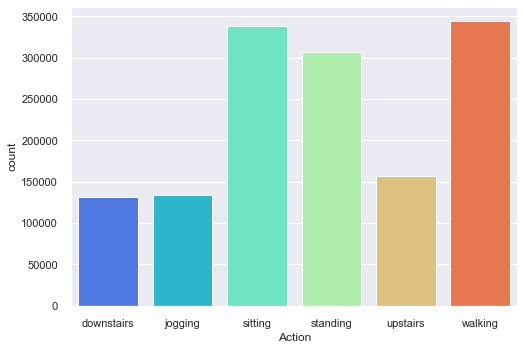

In [27]:
sns.countplot(data=dataset,x="Action",palette="rainbow")

#### Observation
- In complete dataset, the descending order of no of data of each class is -
1. Walking
2. Sitting
3. Standing  
4. Upstairs  
5. Jogging 
6. Downstairs

### Statistical Summary of Numeric Variables

In [28]:
dataset.describe() # Statistics of the whole dataset

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
count,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06
mean,-1.760427e-01,-9.866487e-01,-1.492687e-01,4.213359e-02,7.547222e-01,-1.388248e-01,5.321167e-03,1.458119e-02,1.276031e-02,-3.910640e-03,4.424380e-02,3.927177e-02
std,1.566652e+00,4.940860e-01,1.544769e+00,3.388300e-01,3.332649e-01,4.283231e-01,1.292916e+00,1.226470e+00,8.080411e-01,3.282090e-01,5.275663e-01,3.762121e-01
min,-3.141590e+00,-1.569974e+00,-3.141588e+00,-9.998220e-01,-9.999930e-01,-9.999990e-01,-1.736579e+01,-1.841441e+01,-1.215124e+01,-6.369264e+00,-5.673592e+00,-7.743481e+00
25%,-1.480050e+00,-1.358278e+00,-1.277552e+00,-1.725300e-01,5.837930e-01,-3.922410e-01,-2.860300e-01,-1.669860e-01,-9.733300e-02,-4.751300e-02,-6.213600e-02,-2.361300e-02
50%,1.222180e-01,-1.181032e+00,-1.356530e-01,1.991400e-02,9.249990e-01,-9.690200e-02,-3.940000e-04,3.250000e-04,1.770000e-04,8.910000e-04,4.336000e-03,3.433000e-03
75%,8.763600e-01,-6.233930e-01,8.291430e-01,2.721440e-01,9.775030e-01,8.488200e-02,1.163210e-01,2.312710e-01,1.133280e-01,4.428400e-02,5.176600e-02,1.047770e-01
max,3.141579e+00,1.567175e+00,3.141584e+00,9.999980e-01,1.000000e+00,9.813120e-01,1.046806e+01,1.754312e+01,1.143624e+01,7.120793e+00,7.322722e+00,8.125357e+00


### Graphical Univariate Analysis of dataset

array([[<AxesSubplot:title={'center':'attitude.roll'}>,
        <AxesSubplot:title={'center':'attitude.pitch'}>,
        <AxesSubplot:title={'center':'attitude.yaw'}>],
       [<AxesSubplot:title={'center':'gravity.x'}>,
        <AxesSubplot:title={'center':'gravity.y'}>,
        <AxesSubplot:title={'center':'gravity.z'}>],
       [<AxesSubplot:title={'center':'rotationRate.x'}>,
        <AxesSubplot:title={'center':'rotationRate.y'}>,
        <AxesSubplot:title={'center':'rotationRate.z'}>],
       [<AxesSubplot:title={'center':'userAcceleration.x'}>,
        <AxesSubplot:title={'center':'userAcceleration.y'}>,
        <AxesSubplot:title={'center':'userAcceleration.z'}>]],
      dtype=object)

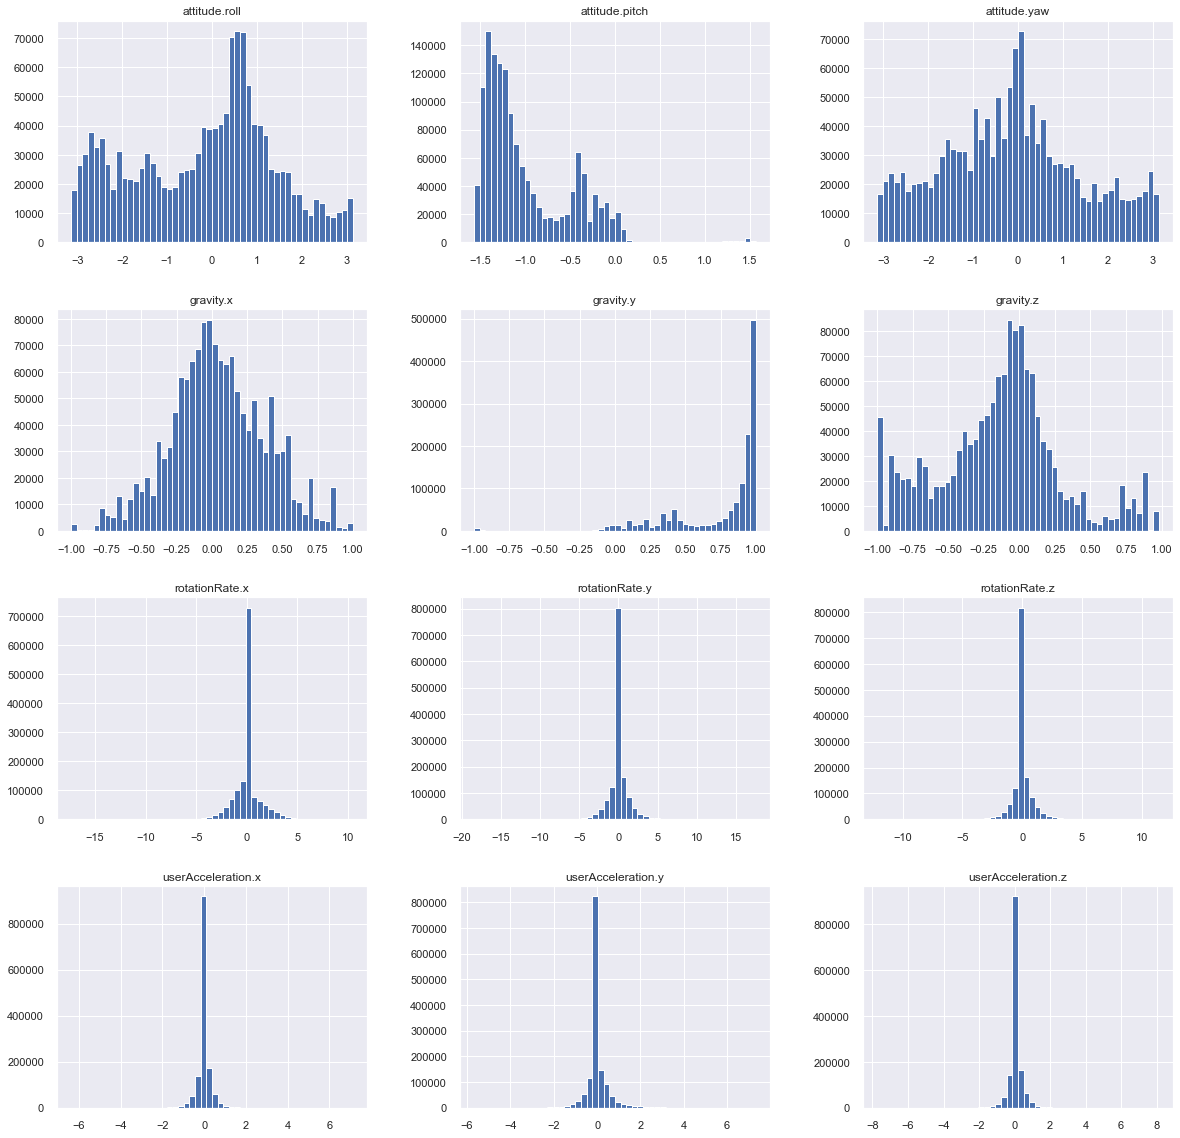

In [29]:
dataset.hist(bins=50,figsize=(20,20))

#### Observations-   
1. attitude.roll, attitude.pitch, attitude.yaw, gravity.x, gravity.y, gravity.z are skewed in nature.
2. rotationRate.x, rotationRate.y, rotationRate.z, userAcceleration.x, userAcceleration.y, userAcceleration.z are close to Gaussian distributed data

### Visualizing outliers of unscaled dataset 

<AxesSubplot:>

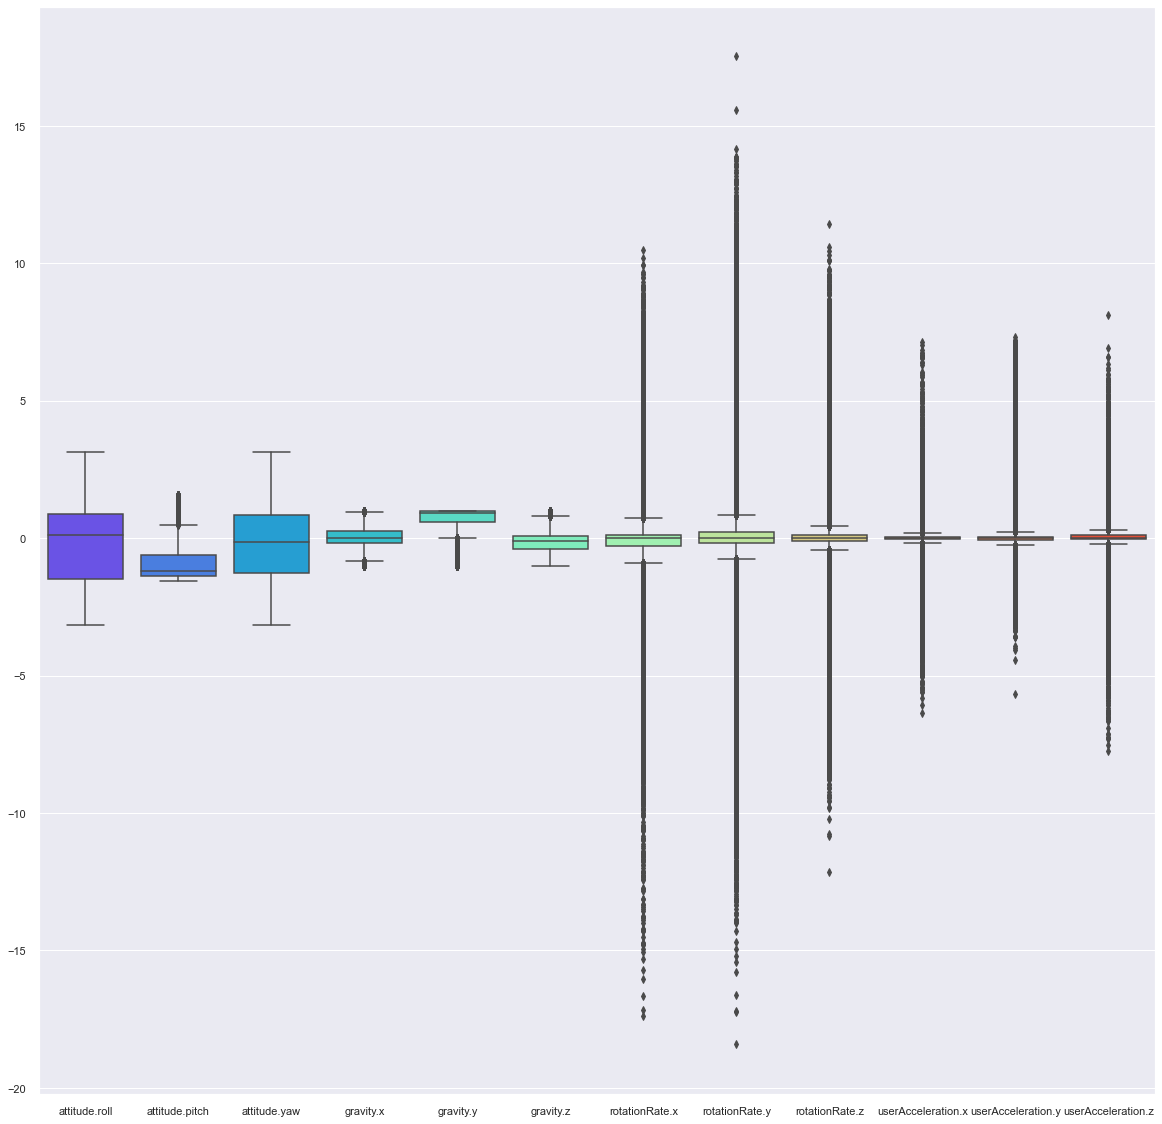

In [30]:
plt.figure(figsize=(20,20))
sns.boxplot(data=dataset,palette="rainbow")

#### Observations-  
1. All the skewed data columns i.e attitude.roll, attitude.pitch, attitude.yaw, gravity.x, gravity.y, gravity.z have very lesser outliers in numbers.
2. All the Gaussian distributed data columns i.e. rotationRate.x, rotationRate.y, rotationRate.z, userAcceleration.x, userAcceleration.y, userAcceleration.z have very large no of outliers.

### Splitting of dataset into train set and test set

- Here we are going to split our dataset into train and test sets in the ratio of 70:30.

In [31]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(dataset, test_size=0.3, random_state=42)

#### Shape of train and test set

In [32]:
print("Train set shape is =",train_set.shape)
print("Test set shape is =",test_set.shape)

Train set shape is = (989005, 13)
Test set shape is = (423860, 13)


In [33]:
train_set.head() # Top 5 rows of train set

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
93898,1.242305,-1.147675,0.986390,0.388646,0.911812,-0.132466,0.048218,0.027150,-0.560580,-0.083653,-0.354073,0.096929,downstairs
1093317,-0.457586,-0.939993,-0.100720,-0.260557,0.807554,-0.529107,1.195774,-0.720208,0.148872,0.396787,1.247820,-0.331259,walking
9098,1.105062,-0.962256,2.632832,0.510779,0.820483,-0.256723,1.189169,-0.327524,1.415717,-0.145545,1.111295,0.221491,downstairs
658212,1.840698,-1.069574,-1.642264,0.463005,0.876996,0.128092,-0.025728,-0.120820,-0.061471,-0.008415,-0.003796,-0.014063,standing
1353224,-1.468210,-1.333181,-2.381137,-0.234120,0.971902,-0.024102,3.991997,-0.286374,1.770907,-0.316631,0.111716,0.242547,walking


### Countplot of train set

<AxesSubplot:xlabel='Action', ylabel='count'>

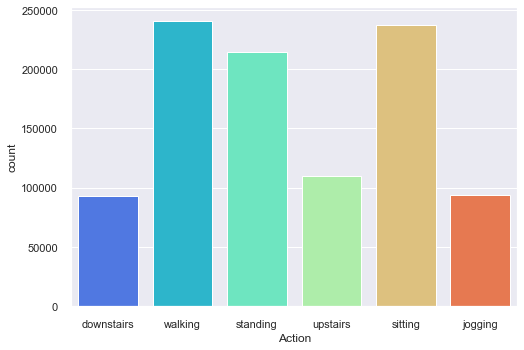

In [34]:
sns.countplot(data=train_set,x="Action",palette="rainbow")

#### Observation
- The train set consist the diferent classes of Action column in thr same ratio as that of original dataset

In [35]:
test_set.head() # Top 5 rows of test set

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
336591,-2.505132,-0.274014,0.956587,-0.572176,0.270598,0.774198,0.000208,-0.007633,-0.004025,0.019258,0.004030,0.004671,sitting
472981,0.637210,-0.614508,-0.979715,0.486112,0.576557,-0.656717,-0.000424,-0.002143,-0.000657,0.001971,0.013821,0.003198,sitting
652268,1.532910,-1.242712,-2.311958,0.321997,0.946661,-0.012205,-0.011999,-0.078295,-0.007060,-0.024130,0.027643,0.005247,standing
255280,2.506760,-1.407796,0.531521,0.096210,0.986745,0.130623,-1.911038,0.945109,-2.783451,-0.006931,0.768046,-0.475487,jogging
347223,0.789102,-0.091962,0.232860,0.706722,0.091833,-0.701506,-0.002047,0.002544,0.000482,-0.010433,0.003794,-0.014940,sitting


### Countplot of test set

<AxesSubplot:xlabel='Action', ylabel='count'>

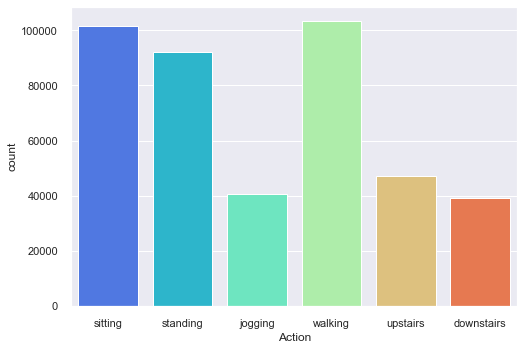

In [36]:
sns.countplot(data=test_set,x="Action",palette="rainbow")

#### Observation
- test set also has the same ratio of different classes of target column i.e. Action column as that of original dataset

### Statistics of test set

In [37]:
test_set.describe()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
count,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000
mean,-0.176403,-0.987017,-0.148486,0.042228,0.754791,-0.138746,0.011115,0.017224,0.013289,-0.003865,0.044406,0.038806
std,1.567236,0.494655,1.545156,0.338384,0.333579,0.428327,1.294939,1.225337,0.807895,0.329943,0.527994,0.376119
min,-3.141590,-1.569360,-3.141583,-0.999463,-0.999993,-0.999999,-17.169640,-15.420590,-9.448476,-6.054142,-3.989993,-7.319022
25%,-1.483277,-1.359145,-1.277619,-0.172044,0.584463,-0.391490,-0.280052,-0.166620,-0.097468,-0.047822,-0.062000,-0.023810
50%,0.121653,-1.181862,-0.134859,0.019818,0.925314,-0.096459,-0.000359,0.000313,0.000151,0.000866,0.004341,0.003397
75%,0.876558,-0.624219,0.830937,0.271631,0.977685,0.085251,0.121061,0.233109,0.113169,0.043917,0.051973,0.104260
max,3.141566,1.567175,3.141568,0.999930,0.999999,0.980863,9.603835,17.543121,11.436243,7.120793,7.322722,6.592363


## Standardization of train set and test set

- In Standardization, we fit and transform Standardization on train set only while perform only transform operation on test set to avoid data or information leakage from test set.

## (i).Standardization of train set

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(train_set[['attitude.roll','attitude.pitch','attitude.yaw','gravity.x','gravity.y','gravity.z','rotationRate.x','rotationRate.y','rotationRate.z','userAcceleration.x','userAcceleration.y','userAcceleration.z']])

array([[ 0.90538285, -0.32638847,  0.73546018, ..., -0.24345551,
        -0.75513898,  0.15271055],
       [-0.17983736,  0.09415517,  0.03164846, ...,  1.22370192,
         2.28229873, -0.9853257 ],
       [ 0.81776613,  0.04907392,  1.80139204, ..., -0.43245997,
         2.02342614,  0.4837709 ],
       ...,
       [-1.85556695, -0.37248826,  1.72597786, ...,  1.11368038,
        -0.55648639, -2.43034532],
       [-0.73890844, -1.04866036, -1.20245537, ...,  0.01981381,
        -0.09054417,  0.07901785],
       [-0.33601312, -0.77207782,  1.92256877, ..., -0.64077043,
         0.98334521, -0.30497782]])

#### Observation
- We are fitting Standardization and performing tranforming operations on train set.

In [39]:
train_set.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
93898,1.242305,-1.147675,0.986390,0.388646,0.911812,-0.132466,0.048218,0.027150,-0.560580,-0.083653,-0.354073,0.096929,downstairs
1093317,-0.457586,-0.939993,-0.100720,-0.260557,0.807554,-0.529107,1.195774,-0.720208,0.148872,0.396787,1.247820,-0.331259,walking
9098,1.105062,-0.962256,2.632832,0.510779,0.820483,-0.256723,1.189169,-0.327524,1.415717,-0.145545,1.111295,0.221491,downstairs
658212,1.840698,-1.069574,-1.642264,0.463005,0.876996,0.128092,-0.025728,-0.120820,-0.061471,-0.008415,-0.003796,-0.014063,standing
1353224,-1.468210,-1.333181,-2.381137,-0.234120,0.971902,-0.024102,3.991997,-0.286374,1.770907,-0.316631,0.111716,0.242547,walking


In [40]:
train_set.iloc[:,:-1]=scaler.fit_transform(train_set[['attitude.roll','attitude.pitch','attitude.yaw','gravity.x','gravity.y','gravity.z','rotationRate.x','rotationRate.y','rotationRate.z','userAcceleration.x','userAcceleration.y','userAcceleration.z']])

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [41]:
train_set.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
93898,0.905383,-0.326388,0.735460,1.022216,0.471645,0.014925,0.035123,0.011167,-0.709208,-0.243456,-0.755139,0.152711,downstairs
1093317,-0.179837,0.094155,0.031648,-0.892718,0.158680,-0.911112,0.923296,-0.597950,0.168714,1.223702,2.282299,-0.985326,walking
9098,0.817766,0.049074,1.801392,1.382468,0.197491,-0.275178,0.918184,-0.277902,1.736390,-0.432460,2.023426,0.483771,downstairs
658212,1.287400,-0.168239,-0.966371,1.241551,0.367133,0.623248,-0.022109,-0.109432,-0.091578,-0.013695,-0.090959,-0.142284,standing
1353224,-0.825026,-0.702027,-1.444729,-0.814737,0.652025,0.267922,3.087488,-0.244363,2.175925,-0.954919,0.128069,0.539733,walking


In [42]:
train_set.describe()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
count,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05
mean,2.006923e-18,2.288949e-16,2.738993e-17,-1.337492e-17,5.218381e-17,-1.899519e-16,2.533541e-17,1.804165e-17,-2.528018e-17,6.062752e-18,8.540255e-18,2.720184e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.893317e+00,-1.181519e+00,-1.937056e+00,-3.073305e+00,-5.267254e+00,-2.010501e+00,-1.344279e+01,-1.501919e+01,-1.505225e+01,-1.943832e+01,-1.084177e+01,-2.068550e+01
25%,-8.317307e-01,-7.520734e-01,-7.302390e-01,-6.336894e-01,-5.142036e-01,-5.922621e-01,-2.253776e-01,-1.472162e-01,-1.358335e-01,-1.326736e-01,-2.017063e-01,-1.674741e-01
50%,1.905108e-01,-3.933026e-01,8.775271e-03,-6.526464e-02,5.108729e-01,9.756815e-02,-2.513033e-03,-1.069352e-02,-1.527718e-02,1.475370e-02,-7.554369e-02,-9.573488e-02
75%,6.717270e-01,7.362414e-01,6.331187e-01,6.791285e-01,6.685949e-01,5.219972e-01,8.618158e-02,1.768922e-01,1.248236e-01,1.476847e-01,1.423357e-02,1.740739e-01
max,2.117890e+00,5.169012e+00,2.130766e+00,2.825502e+00,7.363702e-01,2.615258e+00,8.099762e+00,1.268263e+01,1.309920e+01,2.151912e+01,1.358204e+01,2.149063e+01


#### Observation 
- After standardization, we can see that the mean and standard deviation of each column becomes 0 and 1.

### (ii).Standardization of test set

In [43]:
test_set.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
336591,-2.505132,-0.274014,0.956587,-0.572176,0.270598,0.774198,0.000208,-0.007633,-0.004025,0.019258,0.004030,0.004671,sitting
472981,0.637210,-0.614508,-0.979715,0.486112,0.576557,-0.656717,-0.000424,-0.002143,-0.000657,0.001971,0.013821,0.003198,sitting
652268,1.532910,-1.242712,-2.311958,0.321997,0.946661,-0.012205,-0.011999,-0.078295,-0.007060,-0.024130,0.027643,0.005247,standing
255280,2.506760,-1.407796,0.531521,0.096210,0.986745,0.130623,-1.911038,0.945109,-2.783451,-0.006931,0.768046,-0.475487,jogging
347223,0.789102,-0.091962,0.232860,0.706722,0.091833,-0.701506,-0.002047,0.002544,0.000482,-0.010433,0.003794,-0.014940,sitting


In [44]:
test_set.iloc[:,:-1]=scaler.transform(test_set[['attitude.roll','attitude.pitch','attitude.yaw','gravity.x','gravity.y','gravity.z','rotationRate.x','rotationRate.y','rotationRate.z','userAcceleration.x','userAcceleration.y','userAcceleration.z']])

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


#### Observation
- In test set, we are only transforming data w.r.to Standardization of train set to avoid data leakage.

In [45]:
test_set.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Action
336591,-1.487003,1.442723,0.716165,-1.811890,-1.453170,2.131709,-0.002035,-0.017182,-0.020491,0.070812,-0.076120,-0.092492,sitting
472981,0.519087,0.753243,-0.537426,1.309709,-0.534733,-1.209042,-0.002525,-0.012707,-0.016323,0.018021,-0.057555,-0.096407,sitting
652268,1.090907,-0.518833,-1.399941,0.825624,0.576256,0.295697,-0.011483,-0.074773,-0.024246,-0.061685,-0.031346,-0.090961,standing
255280,1.712618,-0.853118,0.440971,0.159627,0.696581,0.629157,-1.481282,0.759328,-3.459933,-0.009163,1.372573,-1.368654,jogging
347223,0.616055,1.811367,0.247613,1.960435,-1.989792,-1.313611,-0.003781,-0.008887,-0.014913,-0.019858,-0.076568,-0.144614,sitting


In [46]:
test_set.describe()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
count,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000
mean,-0.000328,-0.001066,0.000724,0.000398,0.000295,0.000262,0.006406,0.003077,0.000935,0.000200,0.000438,-0.001769
std,1.000532,1.001647,1.000358,0.998120,1.001347,1.000014,1.002244,0.998683,0.999742,1.007572,1.001158,0.999648
min,-1.893321,-1.180275,-1.937053,-3.072246,-5.267266,-2.010501,-13.290978,-12.579153,-11.707667,-18.476007,-7.649408,-19.557372
25%,-0.834645,-0.754603,-0.730294,-0.631634,-0.511000,-0.589818,-0.218948,-0.146761,-0.136123,-0.134036,-0.201324,-0.168190
50%,0.189952,-0.395615,0.009546,-0.065704,0.512174,0.098991,-0.002474,-0.010706,-0.015323,0.014647,-0.075530,-0.095878
75%,0.671888,0.733579,0.634817,0.677060,0.669385,0.523228,0.091501,0.179029,0.124533,0.146115,0.014788,0.172194
max,2.117882,5.171021,2.130756,2.825302,0.736367,2.614209,7.430881,14.287150,14.136440,21.757328,13.801256,17.416247


#### Observation
- In test set, after transforming data w.r.to Standardization operation (fitted on train set), mean is very close to zero and standard deviation close to 1.

# Train set preprocessing

#### Train set shape

In [47]:
print("The shape of train set is =",train_set.shape)

The shape of train set is = (989005, 13)


#### Missing values present in each column of train set

In [48]:
for i in test_set:
    print("The null values present in",i,"th column is :",train_set[i].isnull().sum())

The null values present in attitude.roll th column is : 0
The null values present in attitude.pitch th column is : 0
The null values present in attitude.yaw th column is : 0
The null values present in gravity.x th column is : 0
The null values present in gravity.y th column is : 0
The null values present in gravity.z th column is : 0
The null values present in rotationRate.x th column is : 0
The null values present in rotationRate.y th column is : 0
The null values present in rotationRate.z th column is : 0
The null values present in userAcceleration.x th column is : 0
The null values present in userAcceleration.y th column is : 0
The null values present in userAcceleration.z th column is : 0
The null values present in Action th column is : 0


#### Statistics of train set

In [49]:
train_set.describe()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
count,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05,9.890050e+05
mean,2.006923e-18,2.288949e-16,2.738993e-17,-1.337492e-17,5.218381e-17,-1.899519e-16,2.533541e-17,1.804165e-17,-2.528018e-17,6.062752e-18,8.540255e-18,2.720184e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.893317e+00,-1.181519e+00,-1.937056e+00,-3.073305e+00,-5.267254e+00,-2.010501e+00,-1.344279e+01,-1.501919e+01,-1.505225e+01,-1.943832e+01,-1.084177e+01,-2.068550e+01
25%,-8.317307e-01,-7.520734e-01,-7.302390e-01,-6.336894e-01,-5.142036e-01,-5.922621e-01,-2.253776e-01,-1.472162e-01,-1.358335e-01,-1.326736e-01,-2.017063e-01,-1.674741e-01
50%,1.905108e-01,-3.933026e-01,8.775271e-03,-6.526464e-02,5.108729e-01,9.756815e-02,-2.513033e-03,-1.069352e-02,-1.527718e-02,1.475370e-02,-7.554369e-02,-9.573488e-02
75%,6.717270e-01,7.362414e-01,6.331187e-01,6.791285e-01,6.685949e-01,5.219972e-01,8.618158e-02,1.768922e-01,1.248236e-01,1.476847e-01,1.423357e-02,1.740739e-01
max,2.117890e+00,5.169012e+00,2.130766e+00,2.825502e+00,7.363702e-01,2.615258e+00,8.099762e+00,1.268263e+01,1.309920e+01,2.151912e+01,1.358204e+01,2.149063e+01


#### Total unique quantities present in each column of train set

In [50]:
for i in test_set:
    print("The total unique values present in",i,"th column is :",len(train_set[i].unique()))

The total unique values present in attitude.roll th column is : 876815
The total unique values present in attitude.pitch th column is : 638116
The total unique values present in attitude.yaw th column is : 873428
The total unique values present in gravity.x th column is : 654447
The total unique values present in gravity.y th column is : 403573
The total unique values present in gravity.z th column is : 665746
The total unique values present in rotationRate.x th column is : 628224
The total unique values present in rotationRate.y th column is : 655214
The total unique values present in rotationRate.z th column is : 580320
The total unique values present in userAcceleration.x th column is : 482750
The total unique values present in userAcceleration.y th column is : 519982
The total unique values present in userAcceleration.z th column is : 514426
The total unique values present in Action th column is : 6


#### Datatypes of each column of train set

In [51]:
for i in test_set:
    print("The datatype of",i,"th column is :",train_set[i].dtypes)

The datatype of attitude.roll th column is : float64
The datatype of attitude.pitch th column is : float64
The datatype of attitude.yaw th column is : float64
The datatype of gravity.x th column is : float64
The datatype of gravity.y th column is : float64
The datatype of gravity.z th column is : float64
The datatype of rotationRate.x th column is : float64
The datatype of rotationRate.y th column is : float64
The datatype of rotationRate.z th column is : float64
The datatype of userAcceleration.x th column is : float64
The datatype of userAcceleration.y th column is : float64
The datatype of userAcceleration.z th column is : float64
The datatype of Action th column is : object


#### Values count of each category of Action column of train set

In [52]:
train_set.Action.value_counts()

walking       240901
sitting       237302
standing      214345
upstairs      110074
jogging        93771
downstairs     92612
Name: Action, dtype: int64

#### Countplot of Action column of train set

<AxesSubplot:xlabel='Action', ylabel='count'>

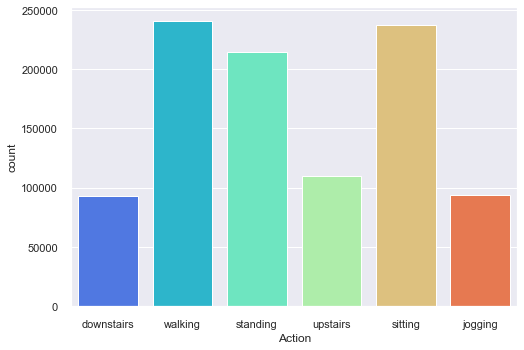

In [53]:
sns.countplot(data=train_set,x="Action",palette="rainbow")

#### Distribution plot of train set columns

array([[<AxesSubplot:title={'center':'attitude.roll'}>,
        <AxesSubplot:title={'center':'attitude.pitch'}>,
        <AxesSubplot:title={'center':'attitude.yaw'}>],
       [<AxesSubplot:title={'center':'gravity.x'}>,
        <AxesSubplot:title={'center':'gravity.y'}>,
        <AxesSubplot:title={'center':'gravity.z'}>],
       [<AxesSubplot:title={'center':'rotationRate.x'}>,
        <AxesSubplot:title={'center':'rotationRate.y'}>,
        <AxesSubplot:title={'center':'rotationRate.z'}>],
       [<AxesSubplot:title={'center':'userAcceleration.x'}>,
        <AxesSubplot:title={'center':'userAcceleration.y'}>,
        <AxesSubplot:title={'center':'userAcceleration.z'}>]],
      dtype=object)

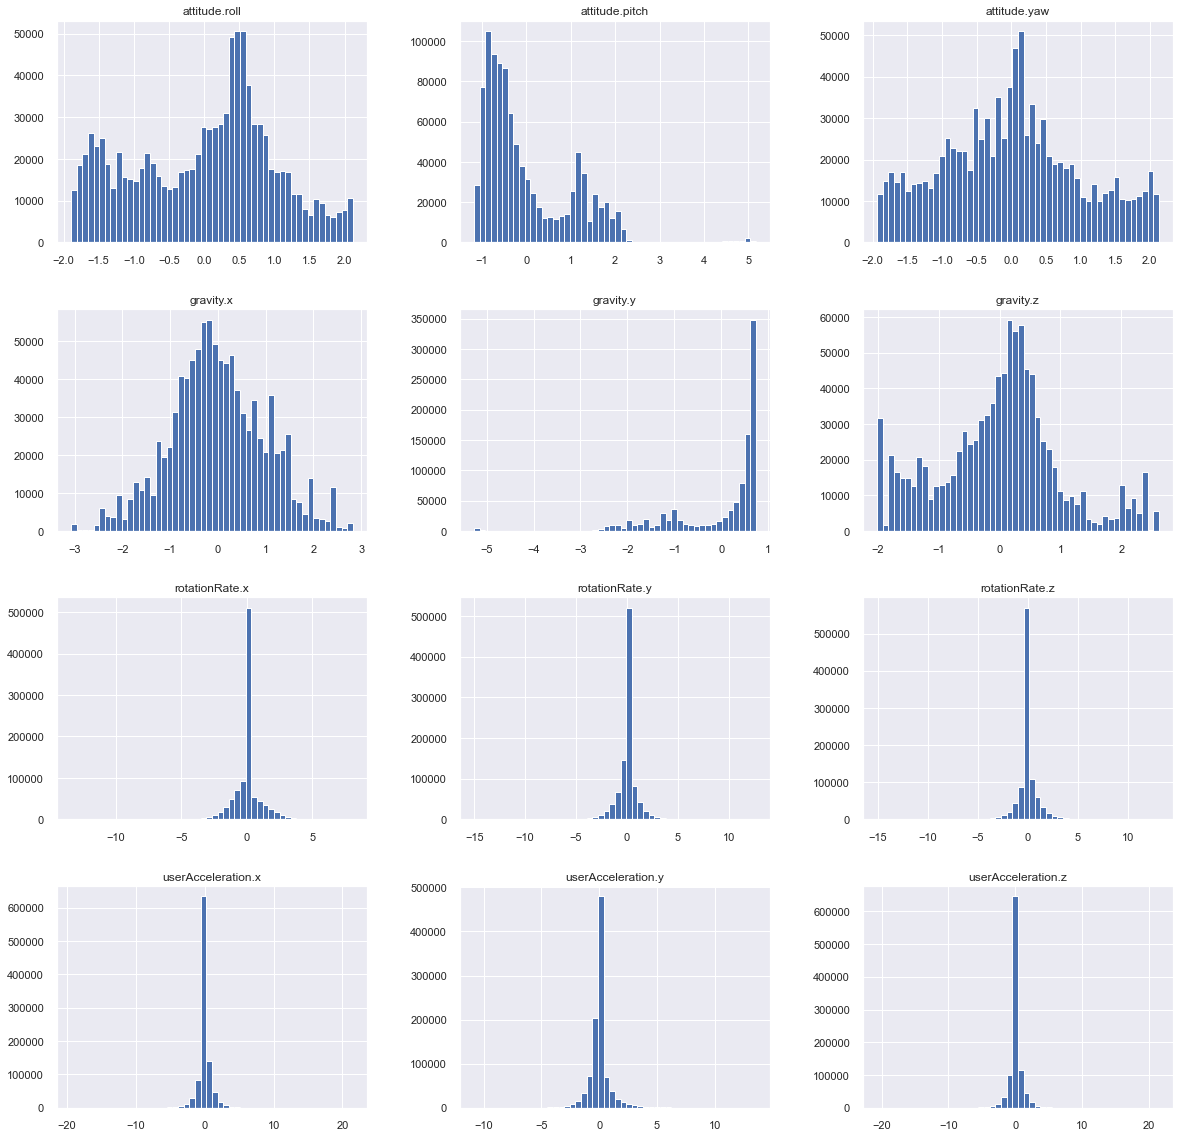

In [54]:
train_set.hist(bins=50,figsize=(20,20))

### Visualize box plot to see the outlier's density in standardized train data

<AxesSubplot:>

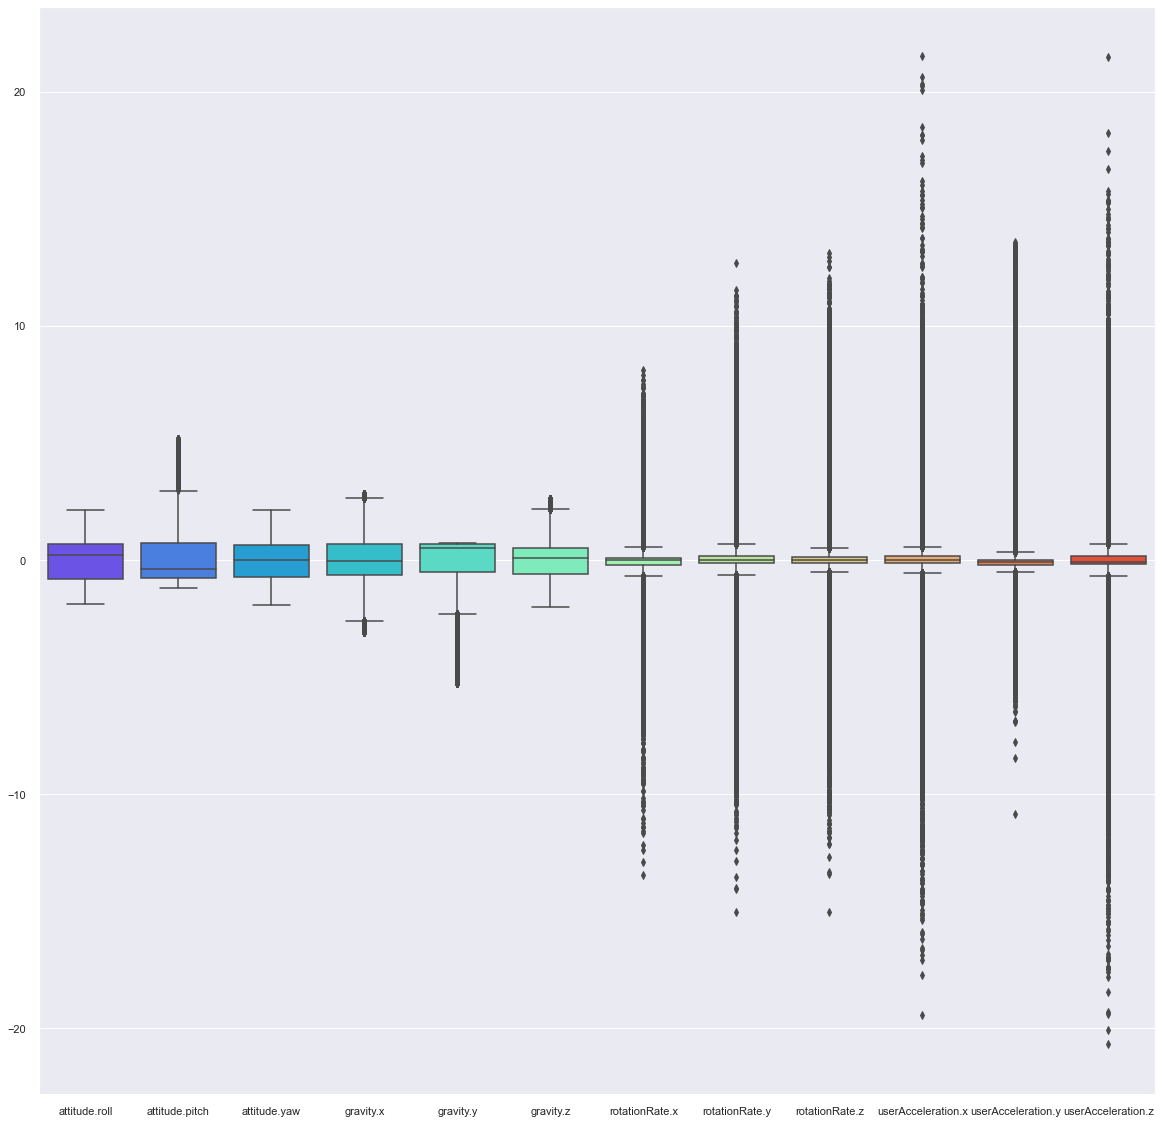

In [55]:
plt.figure(figsize=(20,20))
sns.boxplot(data=train_set,palette="rainbow")

#### Observations-  
1. All the skewed data columns i.e attitude.roll, attitude.pitch, attitude.yaw, gravity.x, gravity.y, gravity.z have very lesser outliers in numbers.
2. All the Gaussian distributed data columns i.e. rotationRate.x, rotationRate.y, rotationRate.z, userAcceleration.x, userAcceleration.y, userAcceleration.z have very large no of outliers.

# Removing the outliers 

1) When the data follows Gaussian distribution, then we use : 
 - Upper boundary = mean + 3 * (Std deviation)
 - Lower boundary = mean - 3 * (Std deviation)
 
2) When data is Skewed, then we use :
 - Upper boundary = Q3 + 1.5 * (IQR)
 - Lower boundary = Q1 - 1.5 * (IQR)

#### 1. Gaussian distributed data
- The columns which are following Gaussian distribution are :  
  (i)rotationRate.x  
  (ii)rotationRate.y  
  (iii)rotationRate.z   
  (iv)userAcceleration.x    
  (v)userAcceleration.y    
  (vi)userAcceleration.z  
  
#### 2. Skewed data
- The columns which are skewed in nature are :   
  (i)attitude.roll    
  (ii)attitude.pitch    
  (iii)attitude.yaw    
  (iv)gravity.x    
  (v)gravity.y    
  (vi)gravity.z    

## Removing outliers of train set

### 1). Gaussian distributed data

Min values of train_set['rotationRate.x'] = -13.442790934211688 
Lower Brackert of rotationRate.x = -3.000001516676976 

Max values of train_set['rotationRate.x'] = 8.099762120224197 
Upper Brackert of rotationRate.x = 3.000001516676976
(971933, 13)


<AxesSubplot:>

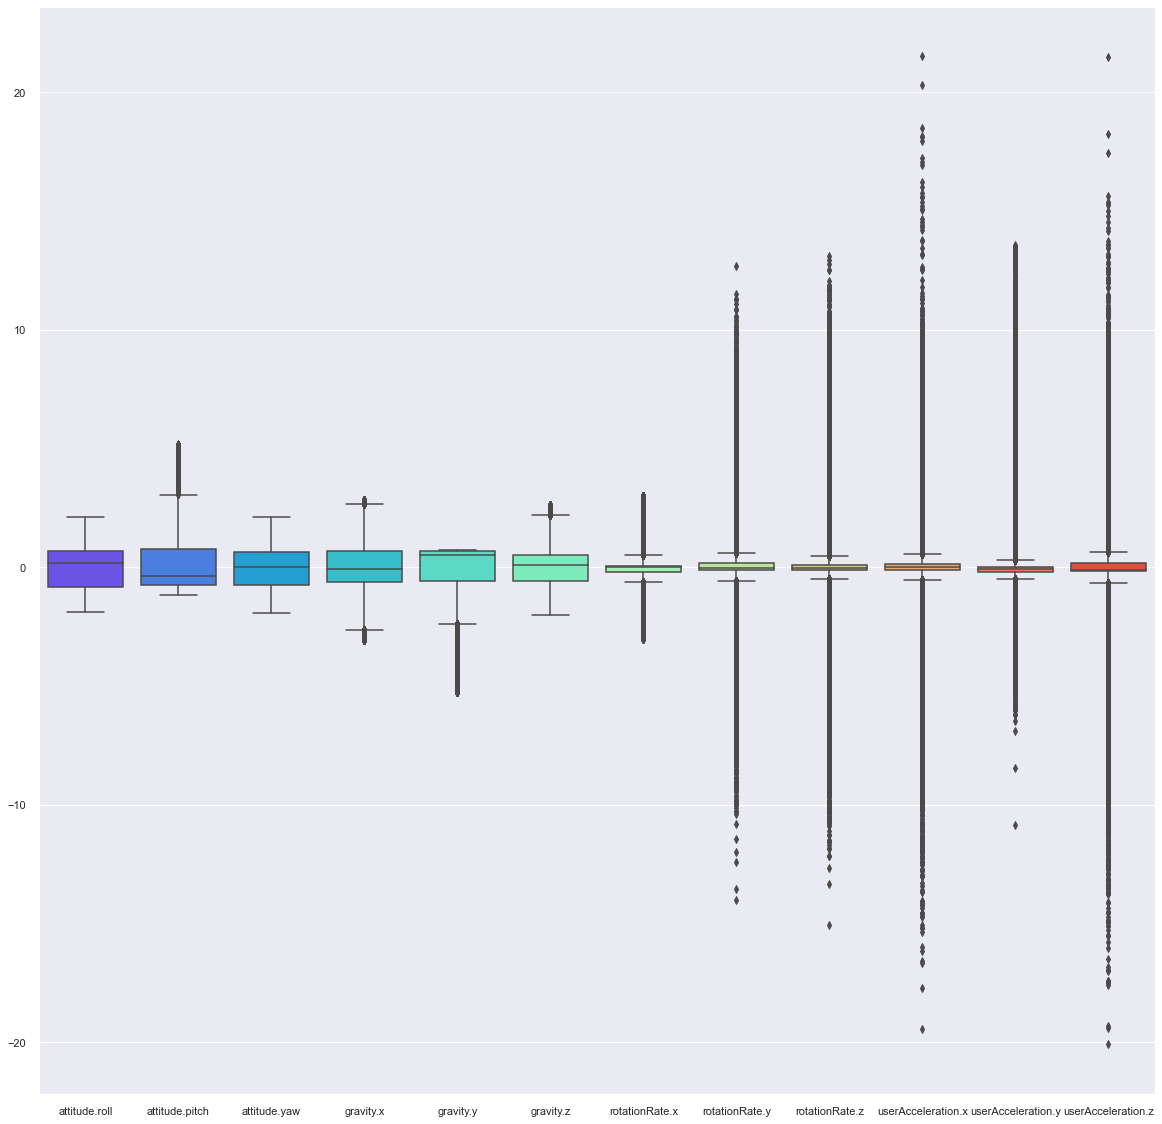

In [56]:
## 1. rotationRate.x
LB_rotationRate_x = train_set['rotationRate.x'].mean() - 3 * train_set['rotationRate.x'].std()
UB_rotationRate_x = train_set['rotationRate.x'].mean() + 3 * train_set['rotationRate.x'].std()
print("Min values of train_set['rotationRate.x'] =",train_set['rotationRate.x'].min(),"\nLower Brackert of rotationRate.x =",LB_rotationRate_x,"\n")
print("Max values of train_set['rotationRate.x'] =",train_set['rotationRate.x'].max(),"\nUpper Brackert of rotationRate.x =",UB_rotationRate_x)
plt.figure(figsize=(20,20))
train_set_without_outliers=(train_set[(train_set["rotationRate.x"]>LB_rotationRate_x) & (train_set["rotationRate.x"]<UB_rotationRate_x)])
print(train_set_without_outliers.shape)
sns.boxplot(data=train_set_without_outliers,palette="rainbow")

#### Observation 
- The number of outliers in column rotationRate.x decrease by a very large amount.

Min values of train_set_without_outliers['rotationRate.y'] = -14.018090304199267 
 Lower Brackert of rotationRate.y = -2.84414169396709
Max values of train_set_without_outliers['rotationRate.y'] = 12.682631727625768 
 Upper Brackert of rotationRate.y = 2.849554907868989
(951573, 13)


<AxesSubplot:>

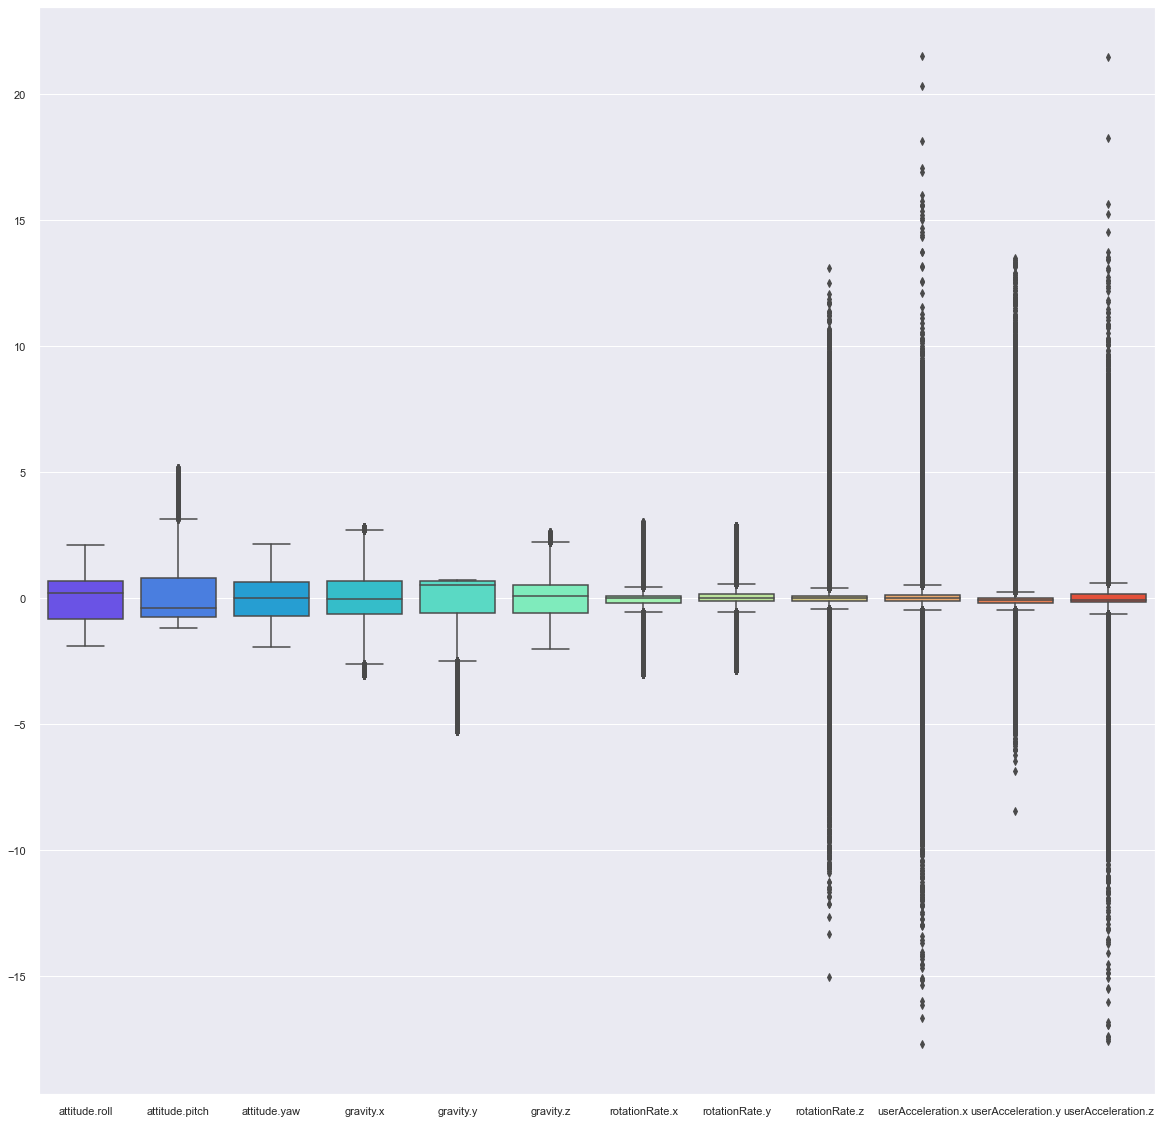

In [57]:
## 2. rotationRate.y
LB_rotationRate_y = train_set_without_outliers['rotationRate.y'].mean() - 3 * train_set_without_outliers['rotationRate.y'].std()
UB_rotationRate_y = train_set_without_outliers['rotationRate.y'].mean() + 3 * train_set_without_outliers['rotationRate.y'].std()
print("Min values of train_set_without_outliers['rotationRate.y'] =",train_set_without_outliers['rotationRate.y'].min(),"\n Lower Brackert of rotationRate.y =",LB_rotationRate_y)
print("Max values of train_set_without_outliers['rotationRate.y'] =",train_set_without_outliers['rotationRate.y'].max(),"\n Upper Brackert of rotationRate.y =",UB_rotationRate_y)

train_set_without_outliers=(train_set_without_outliers[(train_set_without_outliers["rotationRate.y"]>LB_rotationRate_y) & (train_set_without_outliers["rotationRate.y"]<UB_rotationRate_y)])
print(train_set_without_outliers.shape)

plt.figure(figsize=(20,20))
sns.boxplot(data=train_set_without_outliers,palette="rainbow")

#### Observation 
- The number of outliers in column rotationRate.y decrease by a very large amount.

Min values of train_set_without_outliers['rotationRate.z'] = -15.052245407921488 
 Lower Brackert of rotationRate.z = -2.7835873700331737
Max values of train_set_without_outliers['rotationRate.z'] = 13.099196495499395 
 Upper Brackert of rotationRate.z = 2.783619513502365
(930003, 13)


<AxesSubplot:>

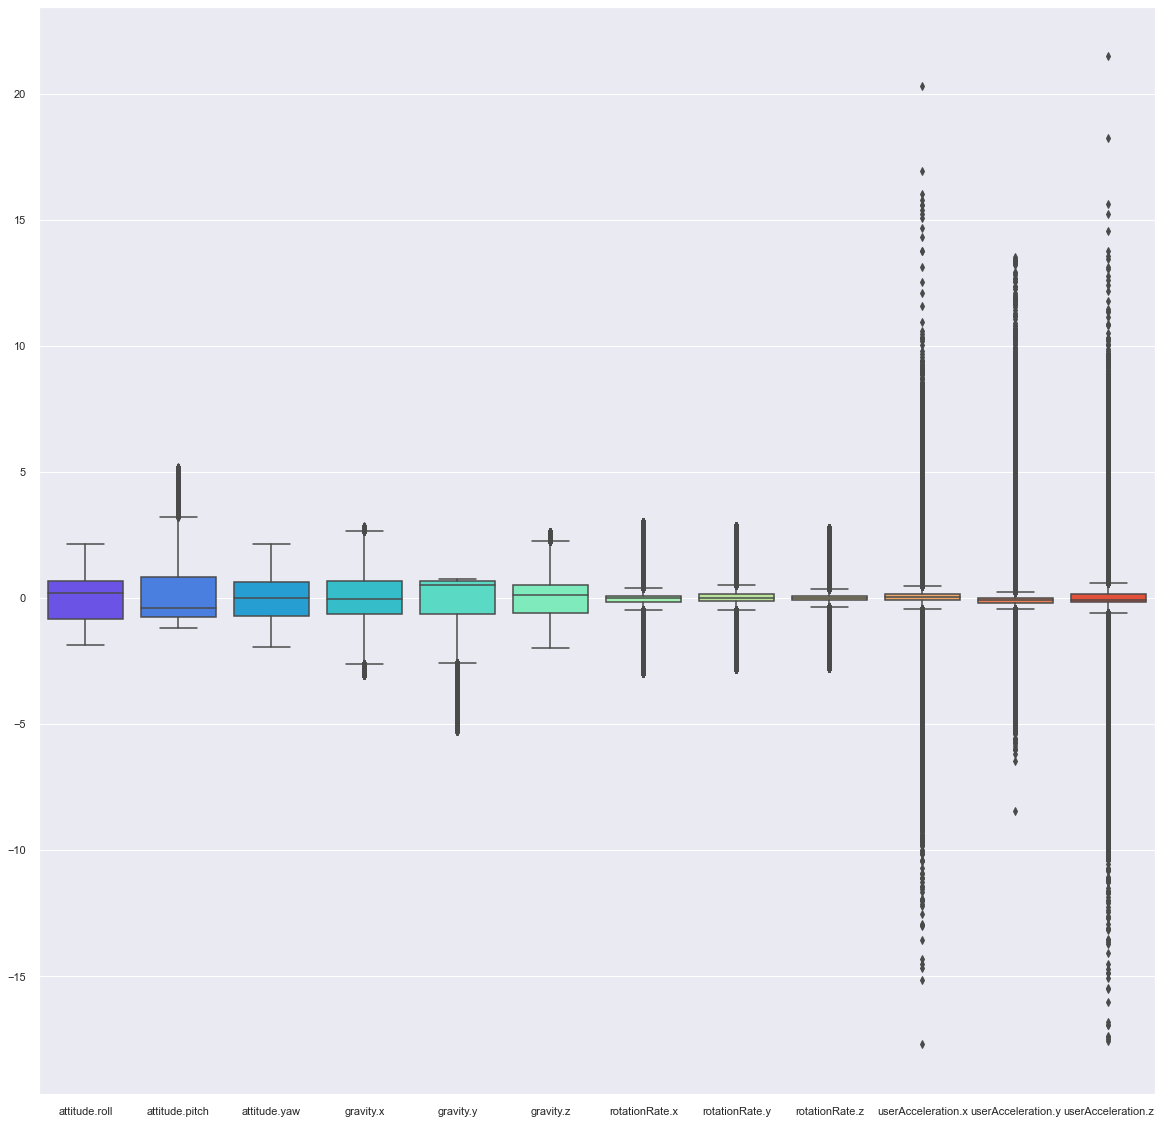

In [58]:
## 3. rotationRate.z
LB_rotationRate_z = train_set_without_outliers['rotationRate.z'].mean() - 3 * train_set_without_outliers['rotationRate.z'].std()
UB_rotationRate_z = train_set_without_outliers['rotationRate.z'].mean() + 3 * train_set_without_outliers['rotationRate.z'].std()
print("Min values of train_set_without_outliers['rotationRate.z'] =",train_set_without_outliers['rotationRate.z'].min(),"\n Lower Brackert of rotationRate.z =",LB_rotationRate_z)
print("Max values of train_set_without_outliers['rotationRate.z'] =",train_set_without_outliers['rotationRate.z'].max(),"\n Upper Brackert of rotationRate.z =",UB_rotationRate_z)

train_set_without_outliers=(train_set_without_outliers[(train_set_without_outliers["rotationRate.z"]>LB_rotationRate_z) & (train_set_without_outliers["rotationRate.z"]<UB_rotationRate_z)])
print(train_set_without_outliers.shape)

plt.figure(figsize=(20,20))
sns.boxplot(data=train_set_without_outliers,palette="rainbow")

#### Observation 
- The number of outliers in column rotationRate.z decrease by a very large amount.

Min values of train_set_without_outliers['userAcceleration.x'] = -17.71620594372136 
 Lower Brackert of userAcceleration.x = -2.600251628570094
Max values of train_set_without_outliers['userAcceleration.x'] = 20.318369174929817 
 Upper Brackert of userAcceleration.x = 2.596620569286152
(908665, 13)


<AxesSubplot:>

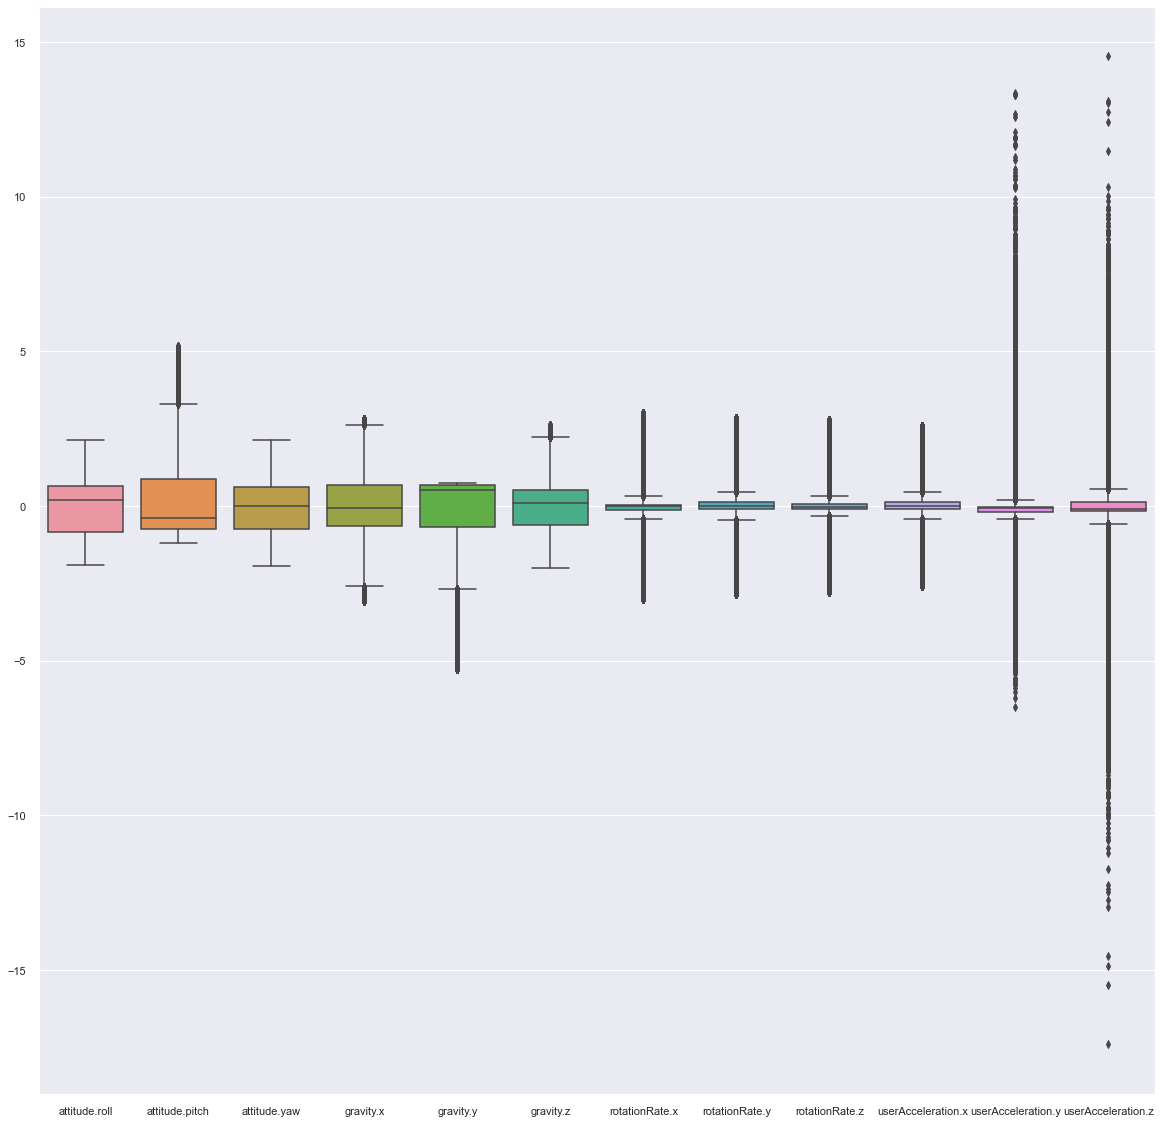

In [59]:
## 4. userAcceleration.x
LB_userAcceleration_x = train_set_without_outliers['userAcceleration.x'].mean() - 3 * train_set_without_outliers['userAcceleration.x'].std()
UB_userAcceleration_x = train_set_without_outliers['userAcceleration.x'].mean() + 3 * train_set_without_outliers['userAcceleration.x'].std()
print("Min values of train_set_without_outliers['userAcceleration.x'] =",train_set_without_outliers['userAcceleration.x'].min(),"\n Lower Brackert of userAcceleration.x =",LB_userAcceleration_x)
print("Max values of train_set_without_outliers['userAcceleration.x'] =",train_set_without_outliers['userAcceleration.x'].max(),"\n Upper Brackert of userAcceleration.x =",UB_userAcceleration_x)

train_set_without_outliers=(train_set_without_outliers[(train_set_without_outliers["userAcceleration.x"]>LB_userAcceleration_x) & (train_set_without_outliers["userAcceleration.x"]<UB_userAcceleration_x)])
print(train_set_without_outliers.shape)
plt.figure(figsize=(20,20))
sns.boxplot(data=train_set_without_outliers)

#### Observation 
- The number of outliers in column userAcceleration.x decrease by a very large amount.

Min values of train_set_without_outliers['userAcceleration.y'] = -6.486121996965743 
 Lower Brackert of userAcceleration.y = -2.3443702565414237
Max values of train_set_without_outliers['userAcceleration.y'] = 13.358294791604356 
 Upper Brackert of userAcceleration.y = 2.192892951772668
(887255, 13)


<AxesSubplot:>

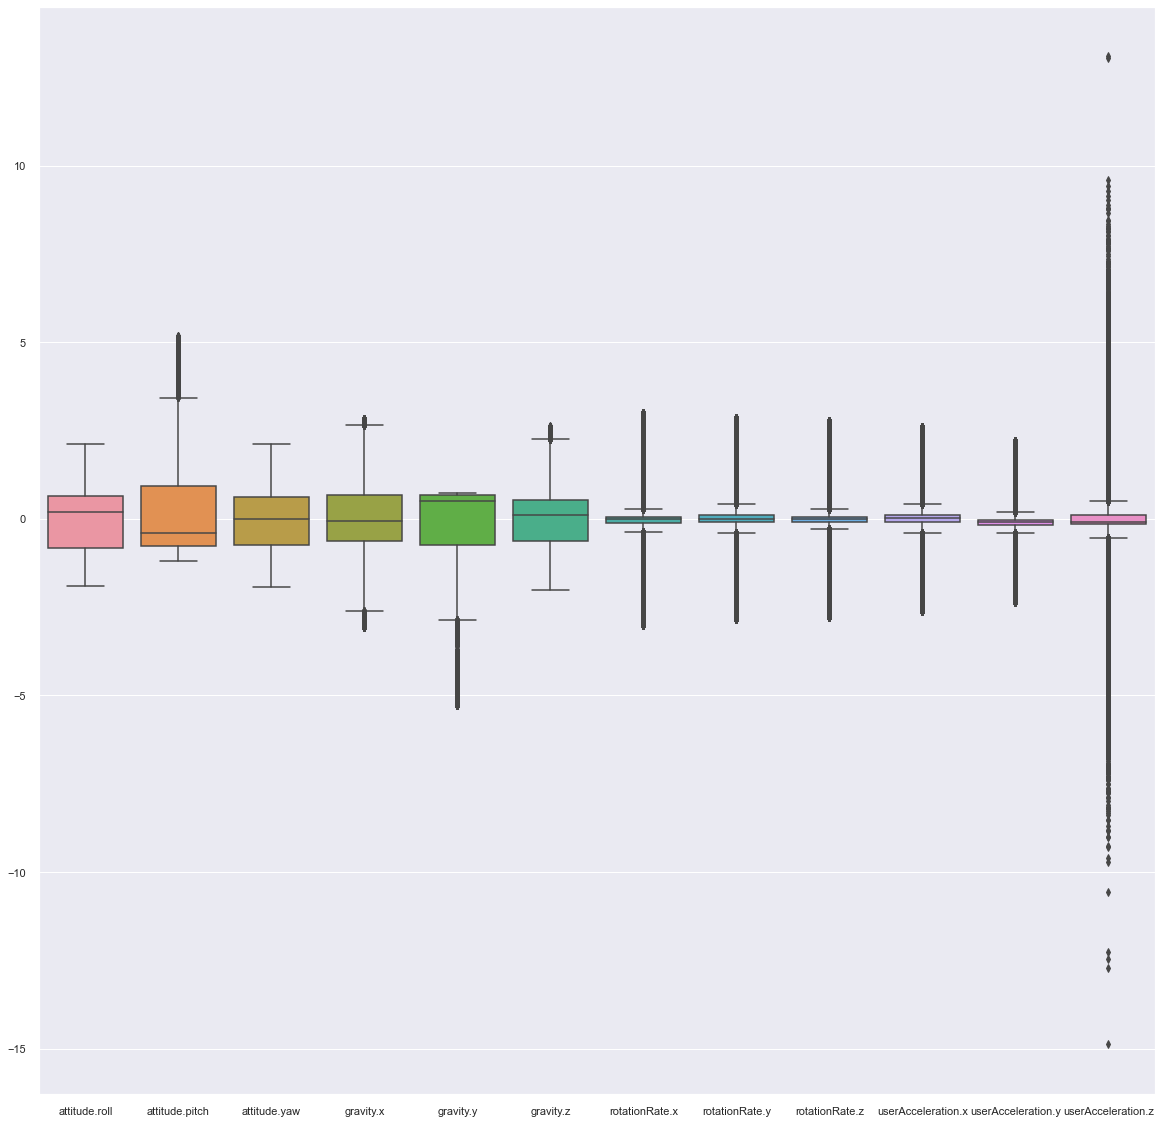

In [60]:
## 5. userAcceleration.y
LB_userAcceleration_y = train_set_without_outliers['userAcceleration.y'].mean() - 3 * train_set_without_outliers['userAcceleration.y'].std()
UB_userAcceleration_y = train_set_without_outliers['userAcceleration.y'].mean() + 3 * train_set_without_outliers['userAcceleration.y'].std()
print("Min values of train_set_without_outliers['userAcceleration.y'] =",train_set_without_outliers['userAcceleration.y'].min(),"\n Lower Brackert of userAcceleration.y =",LB_userAcceleration_y)
print("Max values of train_set_without_outliers['userAcceleration.y'] =",train_set_without_outliers['userAcceleration.y'].max(),"\n Upper Brackert of userAcceleration.y =",UB_userAcceleration_y)

train_set_without_outliers=(train_set_without_outliers[(train_set_without_outliers["userAcceleration.y"]>LB_userAcceleration_y) & (train_set_without_outliers["userAcceleration.y"]<UB_userAcceleration_y)])
print(train_set_without_outliers.shape)
plt.figure(figsize=(20,20))
sns.boxplot(data=train_set_without_outliers)

#### Observation 
- The number of outliers in column userAcceleration.y decrease by a very large amount.

Min values of train_set_without_outliers['userAcceleration.z'] = -14.878700477914439 
 Lower Brackert of userAcceleration.z = -2.2487881786550696
Max values of train_set_without_outliers['userAcceleration.z'] = 13.104295408079583 
 Upper Brackert of userAcceleration.z = 2.2225307215157324
(867713, 13)


<AxesSubplot:>

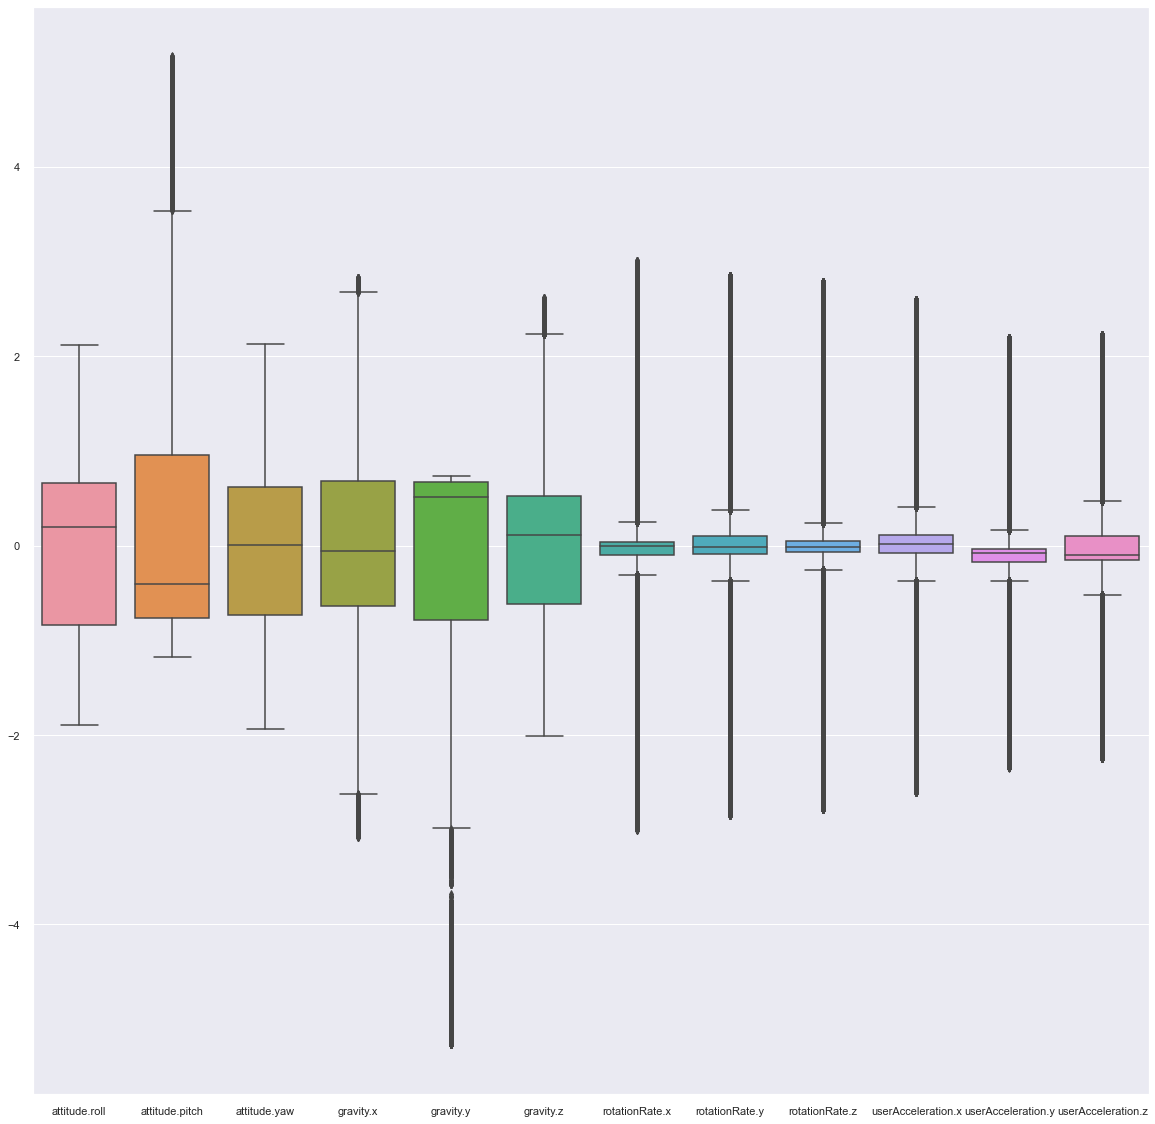

In [61]:
## 6. userAcceleration.z
LB_userAcceleration_z = train_set_without_outliers['userAcceleration.z'].mean() - 3 * train_set_without_outliers['userAcceleration.z'].std()
UB_userAcceleration_z = train_set_without_outliers['userAcceleration.z'].mean() + 3 * train_set_without_outliers['userAcceleration.z'].std()
print("Min values of train_set_without_outliers['userAcceleration.z'] =",train_set_without_outliers['userAcceleration.z'].min(),"\n Lower Brackert of userAcceleration.z =",LB_userAcceleration_z)
print("Max values of train_set_without_outliers['userAcceleration.z'] =",train_set_without_outliers['userAcceleration.z'].max(),"\n Upper Brackert of userAcceleration.z =",UB_userAcceleration_z)

train_set_without_outliers=(train_set_without_outliers[(train_set_without_outliers["userAcceleration.z"]>LB_userAcceleration_z) & (train_set_without_outliers["userAcceleration.z"]<UB_userAcceleration_z)])
print(train_set_without_outliers.shape)
plt.figure(figsize=(20,20))
sns.boxplot(data=train_set_without_outliers)


#### Observation 
- The number of outliers in column userAcceleration.z decrease by a very large amount.

### 2). Skewed column data

Max values of train_set_without_outliers['attitude.pitch'] = 5.169011842564746 
 Upper Brackert of attitude.pitch = 3.536634603269158
(861033, 13)


<AxesSubplot:>

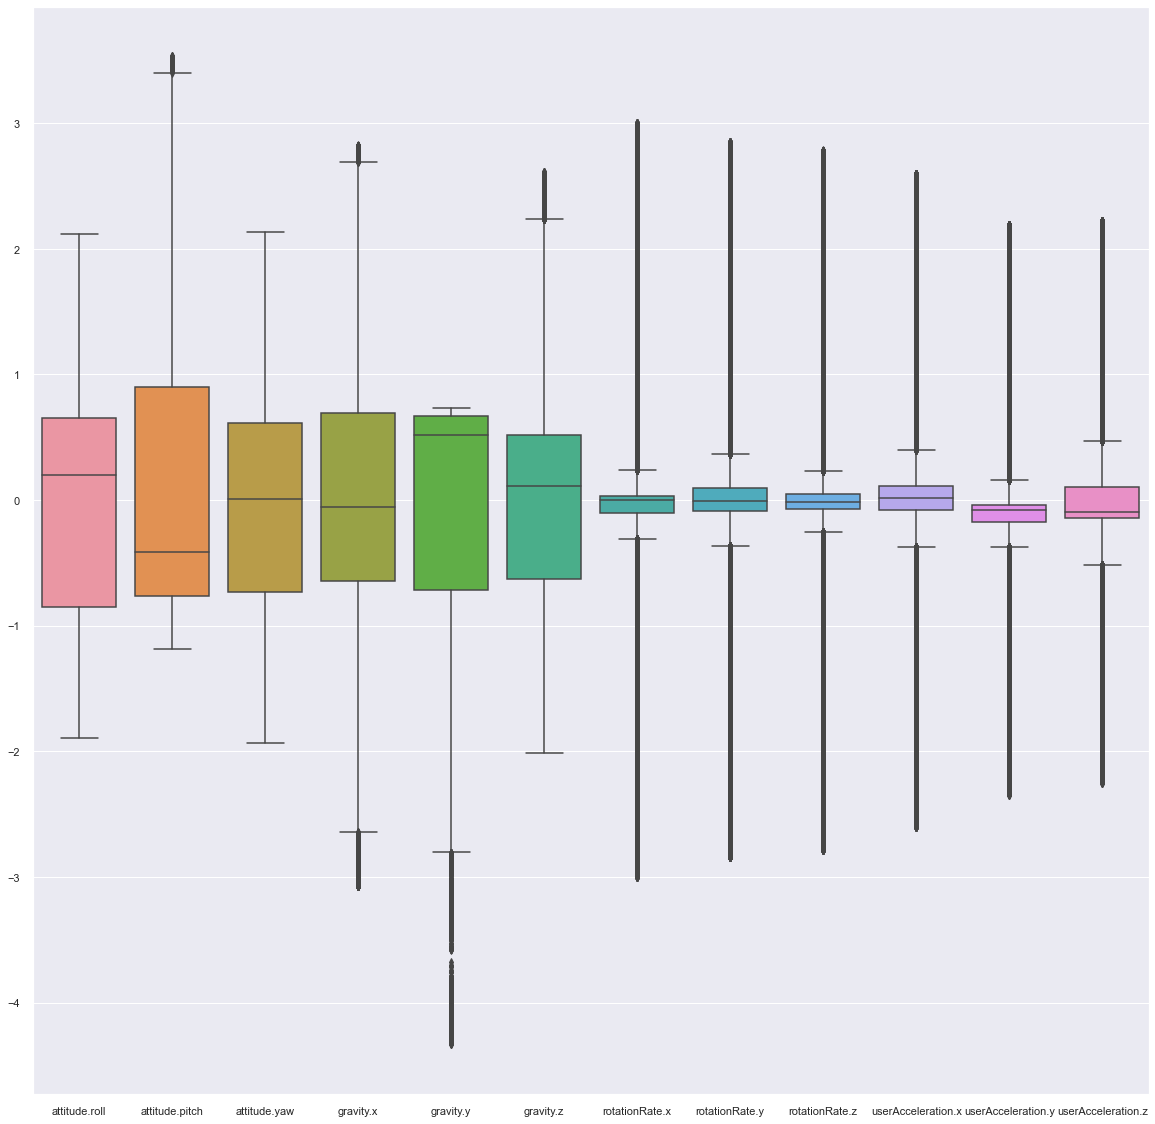

In [62]:
## 1. attitude.pitch
Q_1_attitude_pitch = train_set_without_outliers['attitude.pitch'].quantile(0.25)
Q_3_attitude_pitch = train_set_without_outliers['attitude.pitch'].quantile(0.75)
IQR_attitude_pitch = Q_3_attitude_pitch - Q_1_attitude_pitch
LB_attitude_pitch = Q_1_attitude_pitch - 1.5 * (IQR_attitude_pitch)
UB_attitude_pitch = Q_3_attitude_pitch + 1.5 * (IQR_attitude_pitch)
# print("Min values of train_set_without_outliers['attitude.pitch'] =",train_set_without_outliers['attitude.pitch'].min(),"\n Lower Brackert of attitude.pitch =",LB_attitude_pitch)
print("Max values of train_set_without_outliers['attitude.pitch'] =",train_set_without_outliers['attitude.pitch'].max(),"\n Upper Brackert of attitude.pitch =",UB_attitude_pitch)

train_set_without_outliers=(train_set_without_outliers[(train_set_without_outliers["attitude.pitch"]<UB_attitude_pitch)])
print(train_set_without_outliers.shape)
plt.figure(figsize=(20,20))
sns.boxplot(data=train_set_without_outliers)


#### Observation 
- The number of outliers in column attitude.pitch decrease by a very large amount.

Min values of train_set_without_outliers['gravity.x'] = -3.073304513085316 
 Lower Brackert of gravity.x = -2.644030353266503
Max values of train_set_without_outliers['gravity.x'] = 2.823567305952405 
 Upper Brackert of gravity.x = 2.6924869709892816
(858679, 13)


<AxesSubplot:>

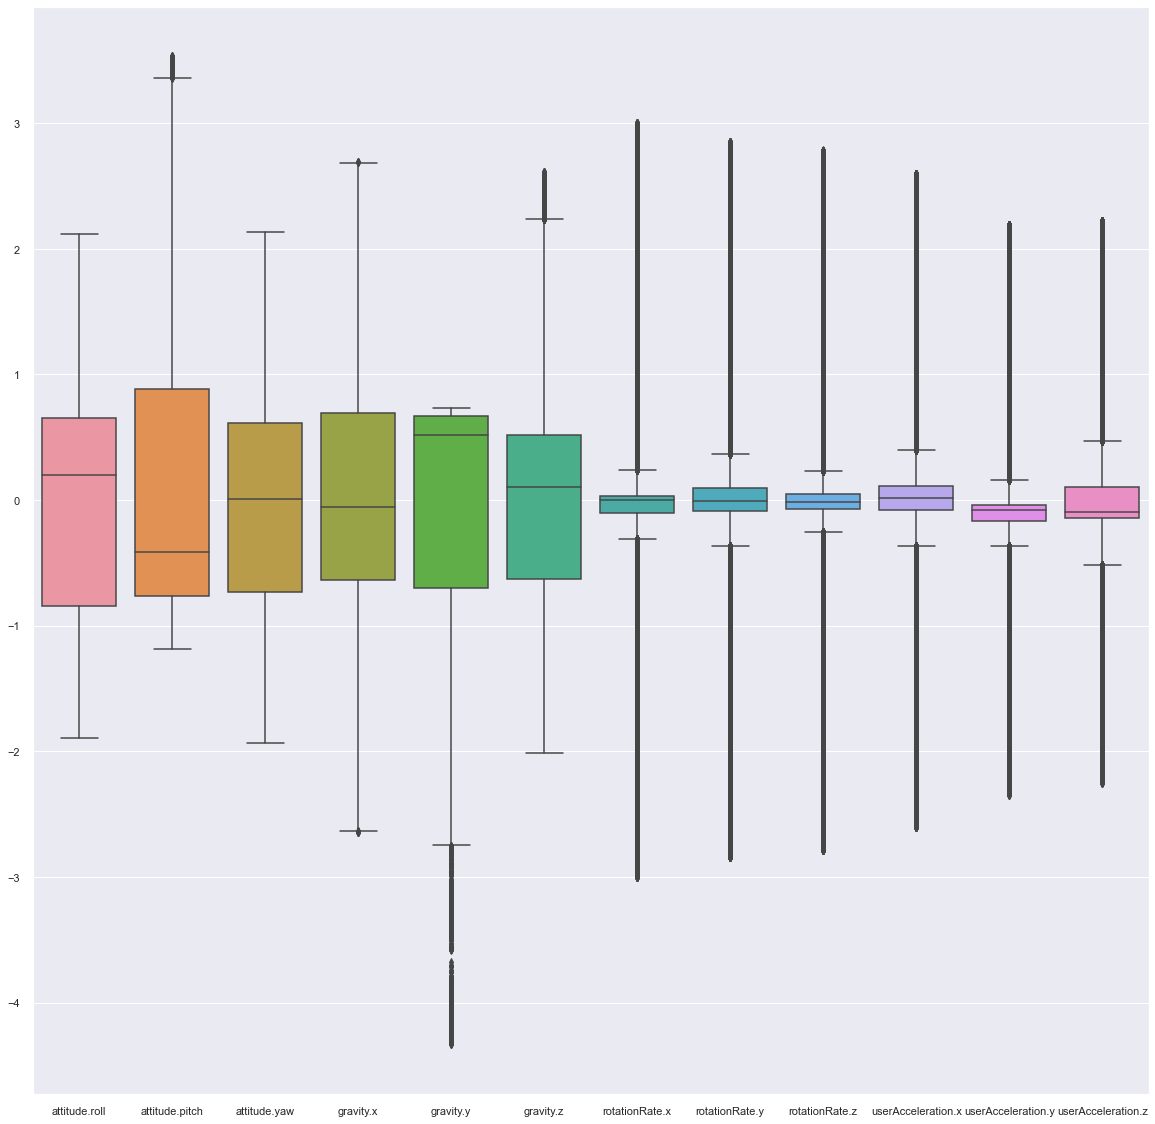

In [63]:
## 2. gravity.x
Q_1_gravity_x = train_set_without_outliers['gravity.x'].quantile(0.25)
Q_3_gravity_x = train_set_without_outliers['gravity.x'].quantile(0.75)
IQR_gravity_x = Q_3_gravity_x - Q_1_gravity_x
LB_gravity_x = Q_1_gravity_x - 1.5 * (IQR_gravity_x)
UB_gravity_x = Q_3_gravity_x + 1.5 * (IQR_gravity_x)
print("Min values of train_set_without_outliers['gravity.x'] =",train_set_without_outliers['gravity.x'].min(),"\n Lower Brackert of gravity.x =",LB_gravity_x)
print("Max values of train_set_without_outliers['gravity.x'] =",train_set_without_outliers['gravity.x'].max(),"\n Upper Brackert of gravity.x =",UB_gravity_x)

train_set_without_outliers=(train_set_without_outliers[(train_set_without_outliers["gravity.x"]>LB_gravity_x) & (train_set_without_outliers["gravity.x"]<UB_gravity_x)])
print(train_set_without_outliers.shape)
plt.figure(figsize=(20,20))
sns.boxplot(data=train_set_without_outliers)

#### Observation
- The number of outliers in column gravity.x decrease by a very large amount.

Min values of train_set_without_outliers['gravity.y'] = -4.332823839789474 
 Lower Brackert of gravity.y = -2.7499558330869873
Max values of train_set_without_outliers['gravity.y'] = 0.7363702284106353 
 Upper Brackert of gravity.y = 2.7268385383972324
(858187, 13)


<AxesSubplot:>

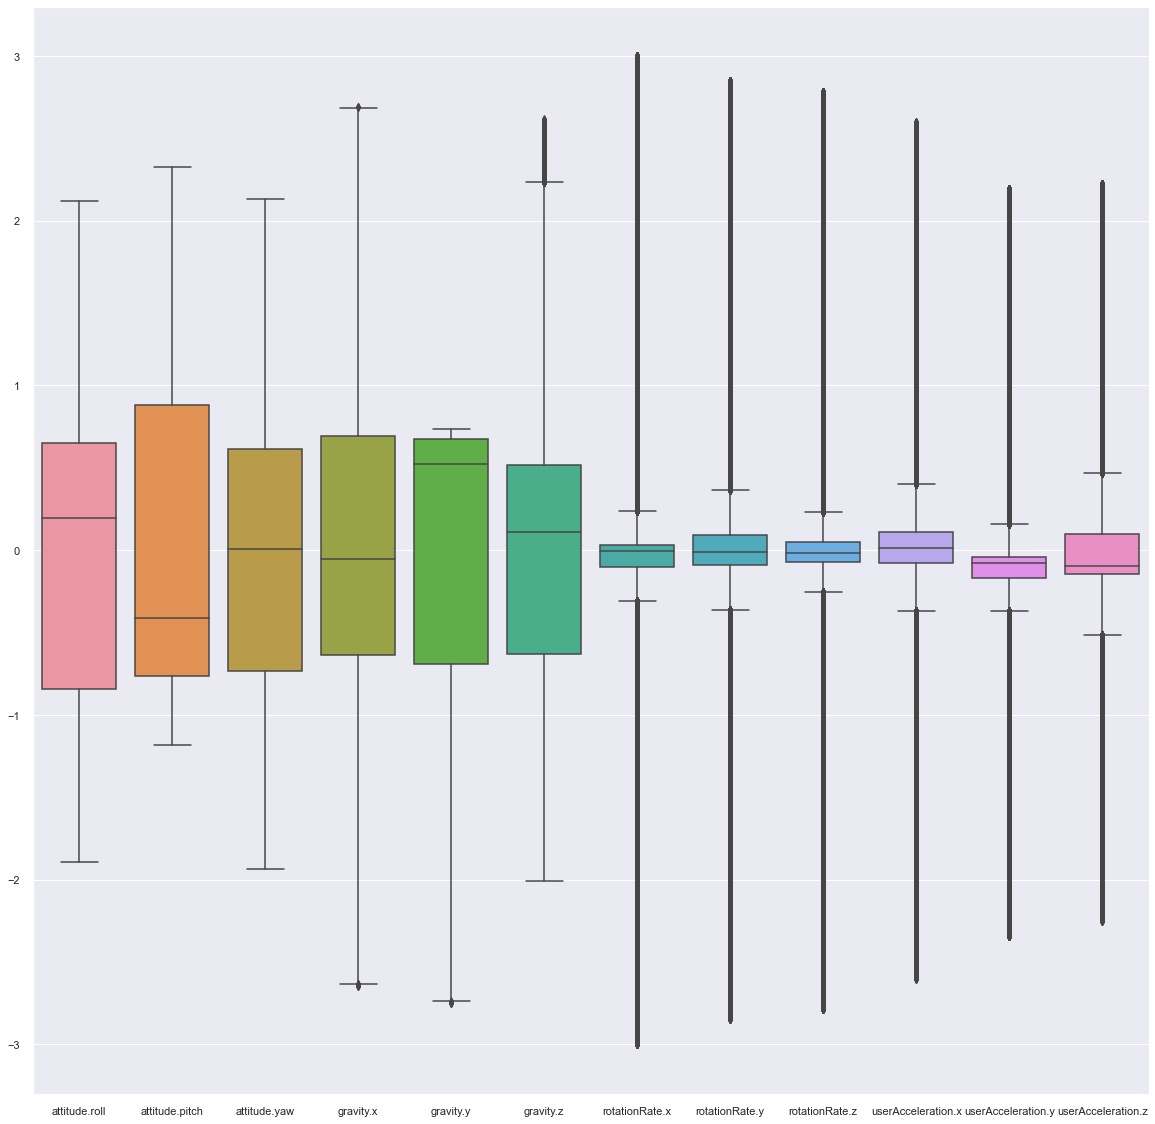

In [64]:
## 3. gravity.y
Q_1_gravity_y = train_set_without_outliers['gravity.y'].quantile(0.25)
Q_3_gravity_y = train_set_without_outliers['gravity.y'].quantile(0.75)
IQR_gravity_y = Q_3_gravity_y - Q_1_gravity_y
LB_gravity_y = Q_1_gravity_y - 1.5 * (IQR_gravity_y)
UB_gravity_y = Q_3_gravity_y + 1.5 * (IQR_gravity_y)
print("Min values of train_set_without_outliers['gravity.y'] =",train_set_without_outliers['gravity.y'].min(),"\n Lower Brackert of gravity.y =",LB_gravity_y)
print("Max values of train_set_without_outliers['gravity.y'] =",train_set_without_outliers['gravity.y'].max(),"\n Upper Brackert of gravity.y =",UB_gravity_y)

train_set_without_outliers=(train_set_without_outliers[(train_set_without_outliers["gravity.y"]>LB_gravity_y)])
print(train_set_without_outliers.shape)
plt.figure(figsize=(20,20))
sns.boxplot(data=train_set_without_outliers)

#### Observation
- The number of outliers in column gravity.y decrease by a very large amount.

Min values of train_set_without_outliers['gravity.z'] = -2.0105012427854545 
 Lower Brackert of gravity.z = -2.3487385752206356
Max values of train_set_without_outliers['gravity.z'] = 2.615257629922989 
 Upper Brackert of gravity.z = 2.2354603739356333
(830332, 13)


<AxesSubplot:>

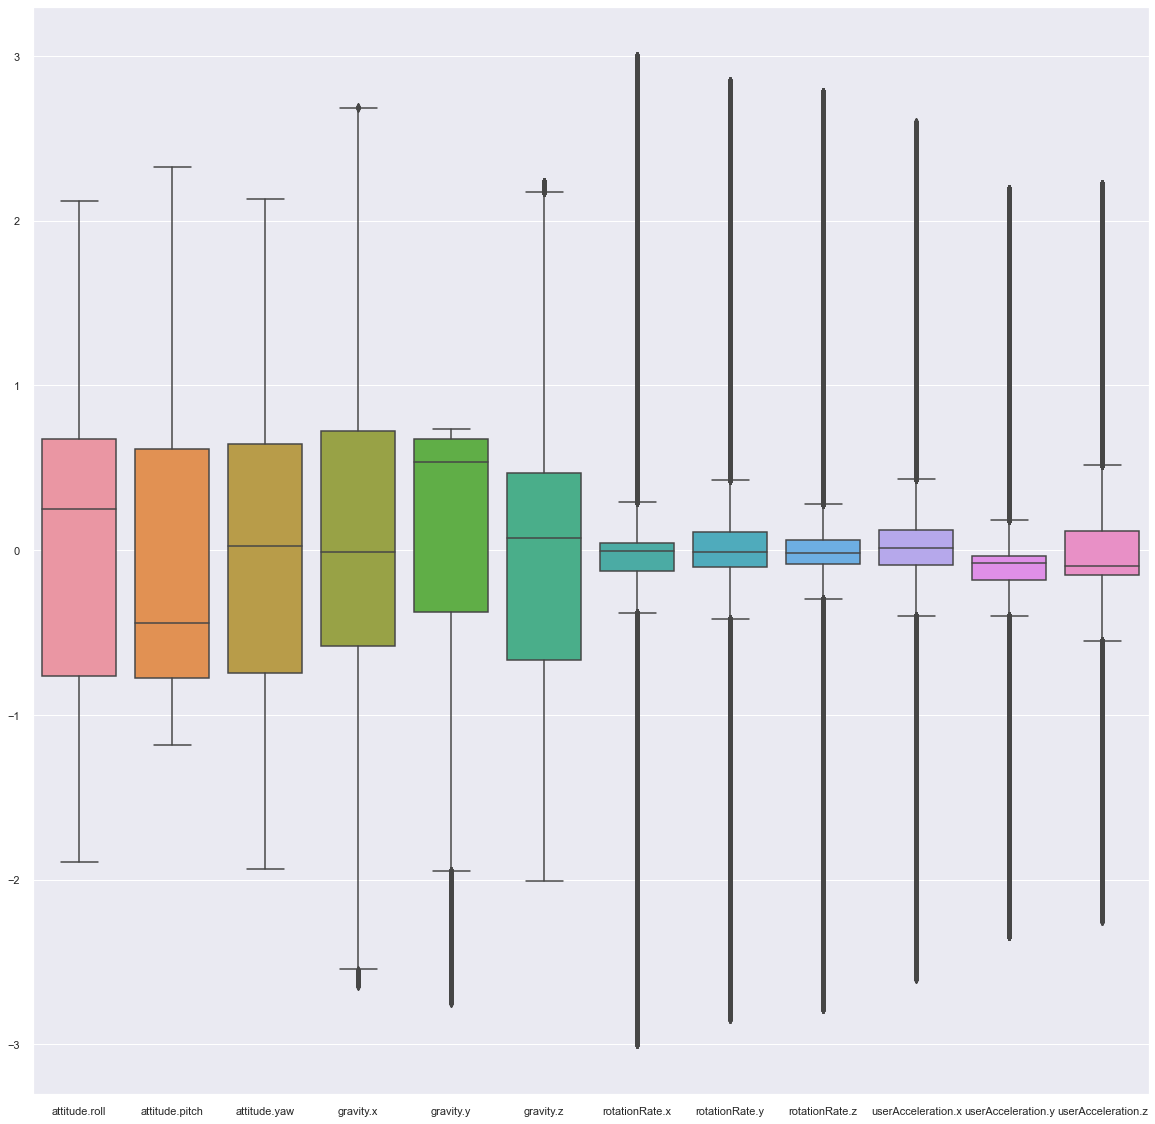

In [65]:
## 4. gravity.z
Q_1_gravity_z = train_set_without_outliers['gravity.z'].quantile(0.25)
Q_3_gravity_z = train_set_without_outliers['gravity.z'].quantile(0.75)
IQR_gravity_z = Q_3_gravity_z - Q_1_gravity_z
LB_gravity_z = Q_1_gravity_z - 1.5 * (IQR_gravity_z)
UB_gravity_z = Q_3_gravity_z + 1.5 * (IQR_gravity_z)
print("Min values of train_set_without_outliers['gravity.z'] =",train_set_without_outliers['gravity.z'].min(),"\n Lower Brackert of gravity.z =",LB_gravity_z)
print("Max values of train_set_without_outliers['gravity.z'] =",train_set_without_outliers['gravity.z'].max(),"\n Upper Brackert of gravity.z =",UB_gravity_z)

train_set_without_outliers=(train_set_without_outliers[(train_set_without_outliers["gravity.z"]>LB_gravity_z) & (train_set_without_outliers["gravity.z"]<UB_gravity_z)])
print(train_set_without_outliers.shape)
plt.figure(figsize=(20,20))
sns.boxplot(data=train_set_without_outliers)

#### Observation
- The number of outliers in column gravity.z decrease by a very large amount.

## Visualization of train set without outliers dataset

array([[<AxesSubplot:title={'center':'attitude.roll'}>,
        <AxesSubplot:title={'center':'attitude.pitch'}>,
        <AxesSubplot:title={'center':'attitude.yaw'}>],
       [<AxesSubplot:title={'center':'gravity.x'}>,
        <AxesSubplot:title={'center':'gravity.y'}>,
        <AxesSubplot:title={'center':'gravity.z'}>],
       [<AxesSubplot:title={'center':'rotationRate.x'}>,
        <AxesSubplot:title={'center':'rotationRate.y'}>,
        <AxesSubplot:title={'center':'rotationRate.z'}>],
       [<AxesSubplot:title={'center':'userAcceleration.x'}>,
        <AxesSubplot:title={'center':'userAcceleration.y'}>,
        <AxesSubplot:title={'center':'userAcceleration.z'}>]],
      dtype=object)

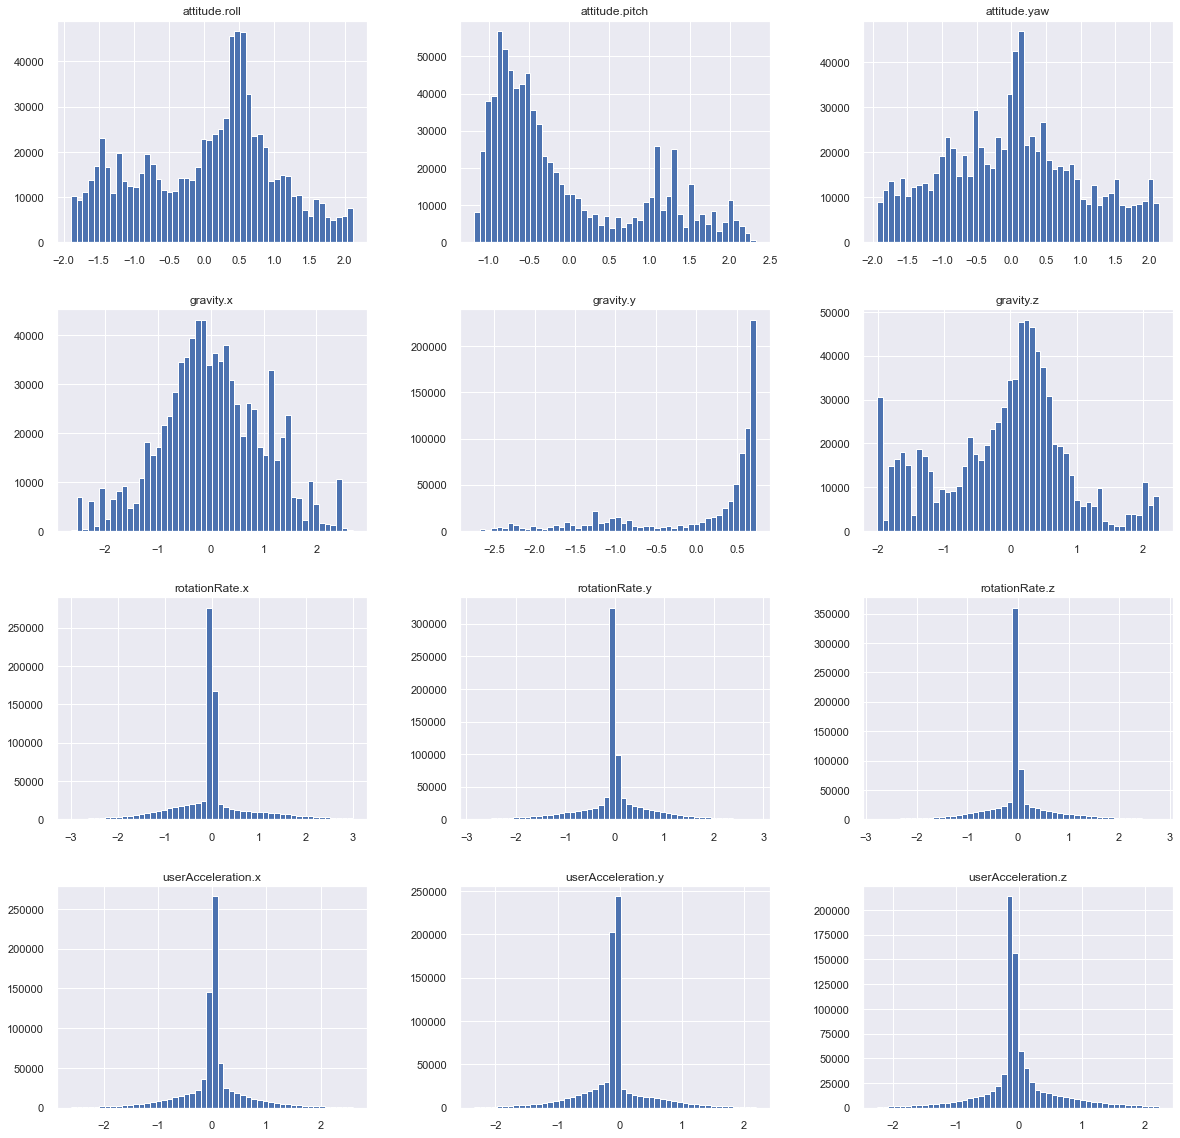

In [66]:
train_set_without_outliers.hist(bins=50,figsize=(20,20))

# Q-Q plot
- As the dataset size is very large, so it will take a very high computational cost and time to plot kde graph.  
  So instead of plotting kde plot, we are going to plot Q-Q plot.
* Q-Q plot is used to check whether feature is guassian or normal distributed
- In Q-Q plot, red line shows the std normally distributed line while the thick blue curve is showing the actual plot.

In [67]:
# Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist(bins=50)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

## Creating the input feature's train dataframe
- X_train

In [68]:
X_train=train_set_without_outliers.drop(columns="Action") # Dropping the target column from train set without outliers dataframe.
X_train.head() # Top 5 rows

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
93898,0.905383,-0.326388,0.735460,1.022216,0.471645,0.014925,0.035123,0.011167,-0.709208,-0.243456,-0.755139,0.152711
9098,0.817766,0.049074,1.801392,1.382468,0.197491,-0.275178,0.918184,-0.277902,1.736390,-0.432460,2.023426,0.483771
658212,1.287400,-0.168239,-0.966371,1.241551,0.367133,0.623248,-0.022109,-0.109432,-0.091578,-0.013695,-0.090959,-0.142284
1051988,-0.580963,-0.931007,0.407966,-0.448303,0.713124,0.189028,-0.553678,1.139832,0.315510,0.487702,1.547296,0.608052
1309557,-1.394540,0.051816,0.477389,-1.313913,0.195168,1.273657,0.206039,1.499938,-1.172007,-1.466564,0.861527,0.805630


### **Visualizating Q-Q plot of train set without outliers**
- If you want to check whether feature is guassian or normal distributed

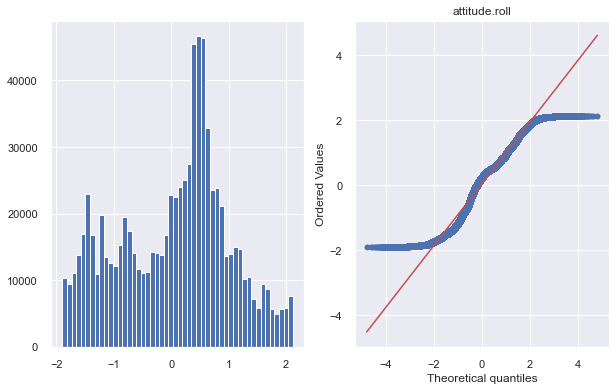

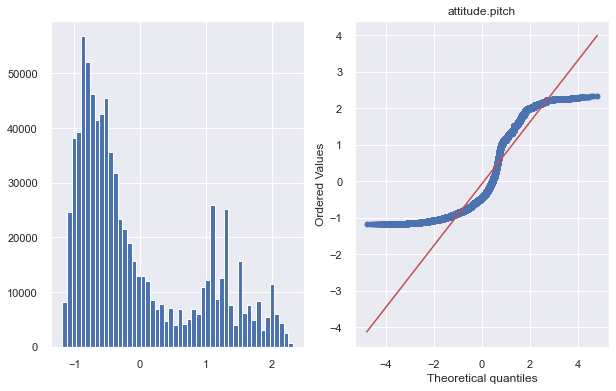

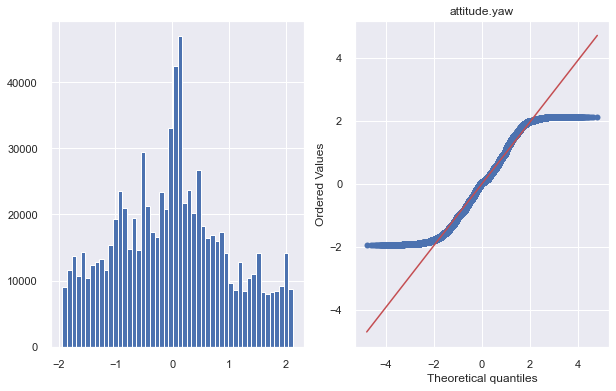

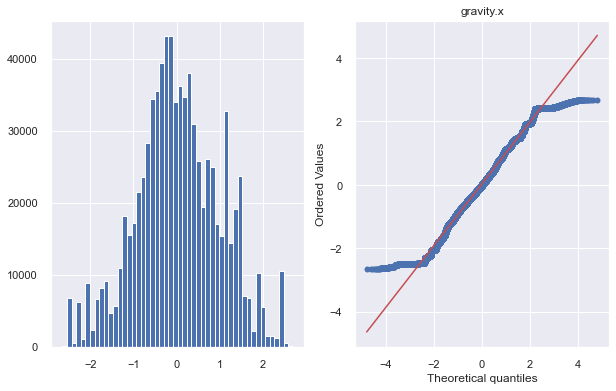

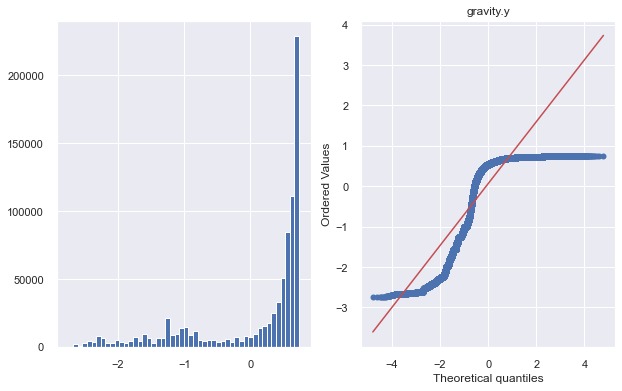

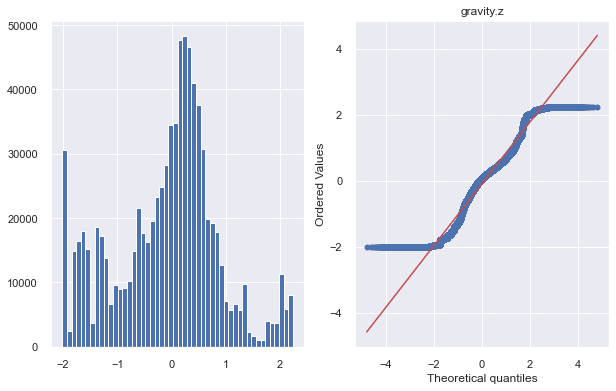

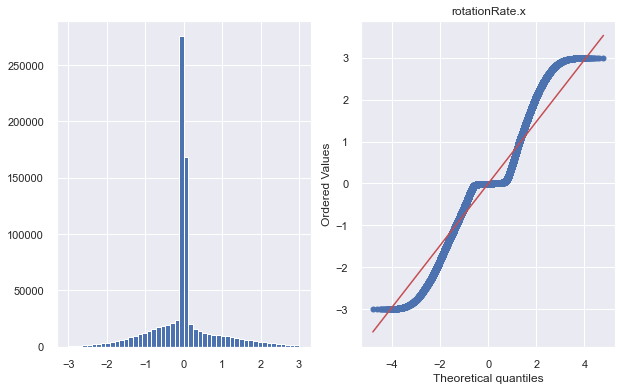

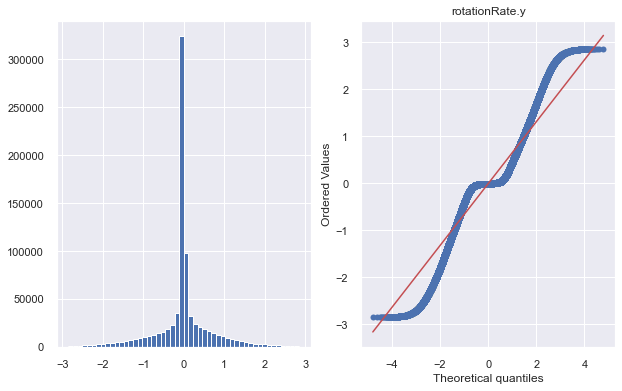

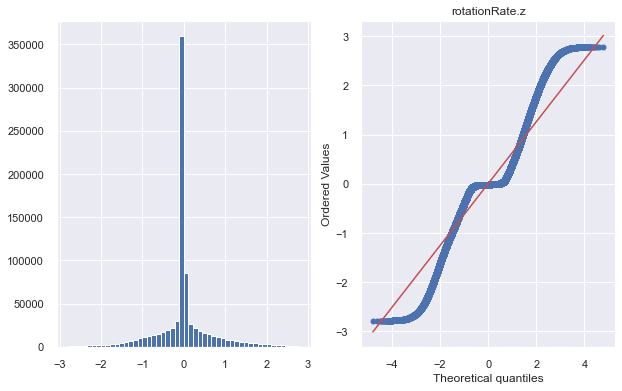

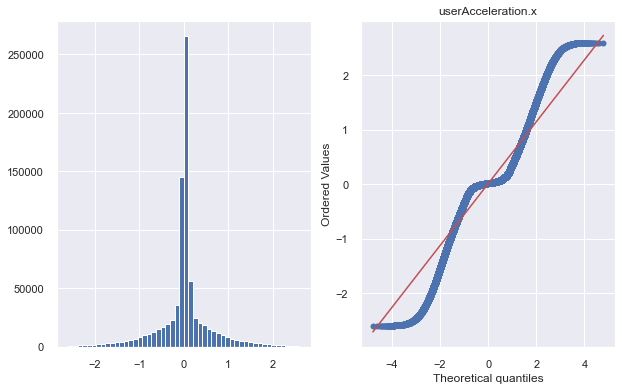

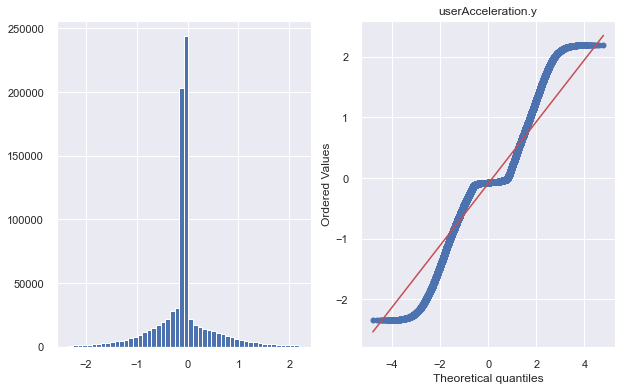

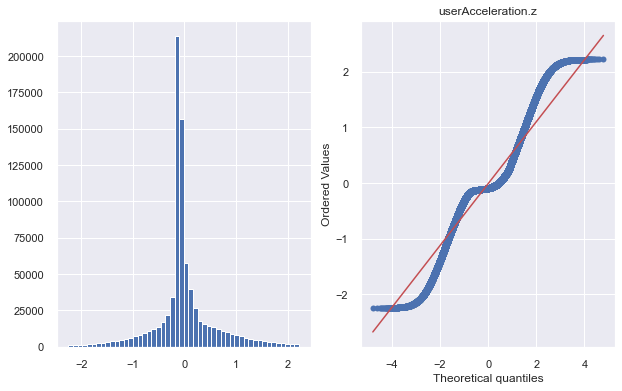

In [69]:
for i in X_train:
    plot_data(X_train,i)

# Creating train target column 
- y_train

In [70]:
y_train=train_set_without_outliers["Action"]
y_train=pd.Series(y_train,name="Action")
y_train

93898      downstairs
9098       downstairs
658212       standing
1051988      upstairs
1309557       walking
              ...    
999890       upstairs
732180       standing
110268     downstairs
671155       standing
121958     downstairs
Name: Action, Length: 830332, dtype: object

### Visualizing Count plots of train data

<AxesSubplot:xlabel='Action', ylabel='count'>

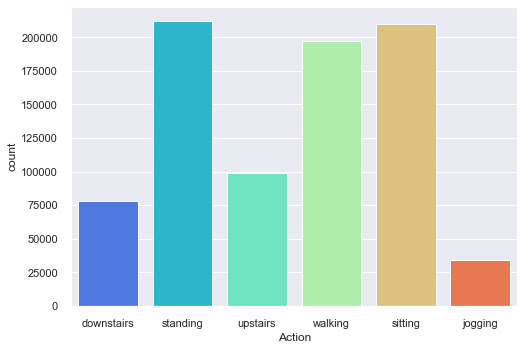

In [71]:
sns.countplot(data=train_set_without_outliers,x="Action",palette="rainbow")

### Correlation matrix of X_train
- It will show the correlation of every variable w.r.to another variable.

In [72]:
corr_mat_train=X_train.corr()
corr_mat_train

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
attitude.roll,1.000000,0.032160,0.033024,0.676400,-0.032192,-0.309779,-0.022041,0.022187,-0.006712,-0.101160,0.001926,0.063265
attitude.pitch,0.032160,1.000000,0.080038,0.228402,-0.981091,-0.485853,0.003491,-0.050336,0.017133,-0.029740,-0.019488,-0.005579
attitude.yaw,0.033024,0.080038,1.000000,-0.017860,-0.067034,-0.002752,-0.000952,0.016551,-0.001776,0.030550,0.002723,-0.026751
gravity.x,0.676400,0.228402,-0.017860,1.000000,-0.218634,-0.490516,-0.017949,-0.004337,-0.005845,-0.125649,0.005745,0.020763
gravity.y,-0.032192,-0.981091,-0.067034,-0.218634,1.000000,0.482604,-0.002121,0.032119,-0.005831,0.015634,0.004734,0.036057
gravity.z,-0.309779,-0.485853,-0.002752,-0.490516,0.482604,1.000000,-0.003645,0.046848,-0.069035,0.104376,0.008030,-0.173098
rotationRate.x,-0.022041,0.003491,-0.000952,-0.017949,-0.002121,-0.003645,1.000000,-0.161627,0.408801,-0.071538,0.071743,0.077529
rotationRate.y,0.022187,-0.050336,0.016551,-0.004337,0.032119,0.046848,-0.161627,1.000000,-0.127462,-0.025272,0.115398,-0.053442
rotationRate.z,-0.006712,0.017133,-0.001776,-0.005845,-0.005831,-0.069035,0.408801,-0.127462,1.000000,-0.080174,-0.001316,0.098763
userAcceleration.x,-0.101160,-0.029740,0.030550,-0.125649,0.015634,0.104376,-0.071538,-0.025272,-0.080174,1.000000,0.011446,-0.255475


### Heatmap for correlation matrix of X_train

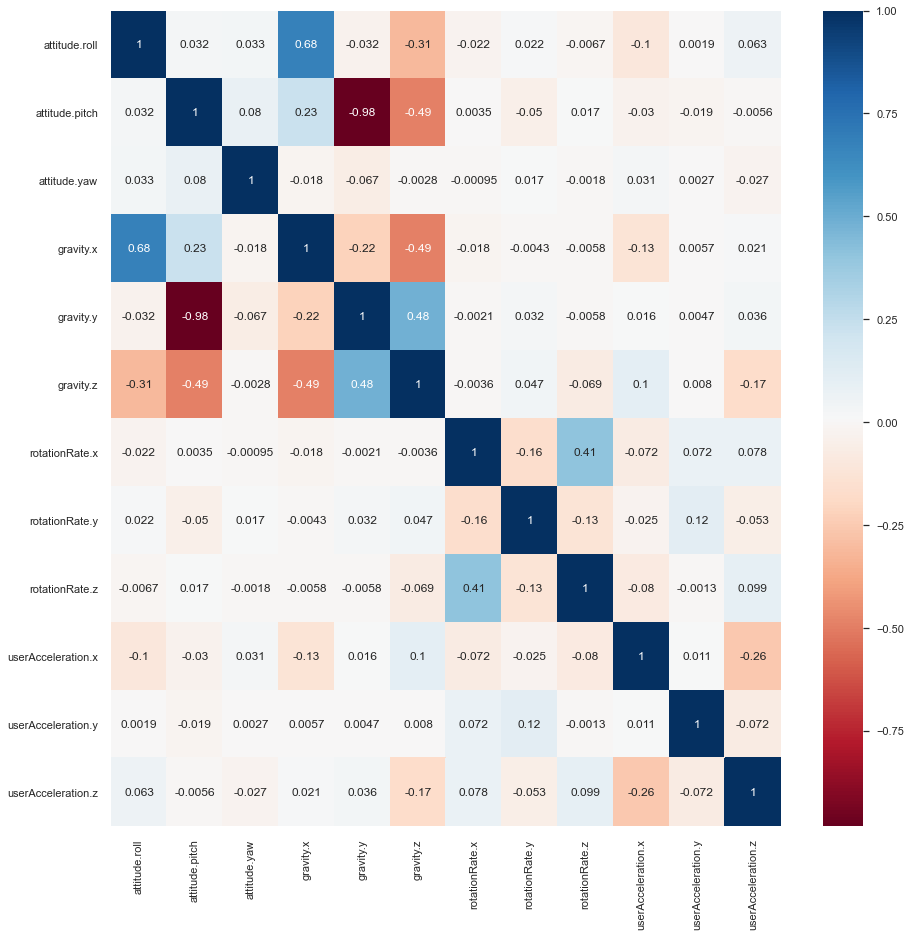

In [73]:
#plot the heatmap
plt.figure(figsize=(15,15))
ax = sns.heatmap(X_train.corr(),annot=True,cmap='RdBu')

#### Observations
- Most of the features are not correlated w.r.to another, but some features are related to each other.    
       
    
- Some +ve correlated features are     
1. attitude.roll and gravity.x
2. gravity.z and gravity.y are slightly +ve correlated   
3. rotationRate.x and rotationRate.z are also slightly +ve correlated   

- Some -ve correlated features are  
1. gravity.y and attitude.pitch are highly -ve correlated
2. gravity.z and attitude.pitch are slightly -ve correlated
3. gravity.z and gravity.x are slightly -ve correlated

# Test set preprocessing

#### Test shape 

In [74]:
print("Shape of test set =",test_set.shape)

Shape of test set = (423860, 13)


#### Columns in test set

In [75]:
print("Columns in test set are -\n")
for i in test_set:
    print(i)

Columns in test set are -

attitude.roll
attitude.pitch
attitude.yaw
gravity.x
gravity.y
gravity.z
rotationRate.x
rotationRate.y
rotationRate.z
userAcceleration.x
userAcceleration.y
userAcceleration.z
Action


#### Statistical summary of numericalvariables of test set

In [76]:
test_set.describe()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
count,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000,423860.000000
mean,-0.000328,-0.001066,0.000724,0.000398,0.000295,0.000262,0.006406,0.003077,0.000935,0.000200,0.000438,-0.001769
std,1.000532,1.001647,1.000358,0.998120,1.001347,1.000014,1.002244,0.998683,0.999742,1.007572,1.001158,0.999648
min,-1.893321,-1.180275,-1.937053,-3.072246,-5.267266,-2.010501,-13.290978,-12.579153,-11.707667,-18.476007,-7.649408,-19.557372
25%,-0.834645,-0.754603,-0.730294,-0.631634,-0.511000,-0.589818,-0.218948,-0.146761,-0.136123,-0.134036,-0.201324,-0.168190
50%,0.189952,-0.395615,0.009546,-0.065704,0.512174,0.098991,-0.002474,-0.010706,-0.015323,0.014647,-0.075530,-0.095878
75%,0.671888,0.733579,0.634817,0.677060,0.669385,0.523228,0.091501,0.179029,0.124533,0.146115,0.014788,0.172194
max,2.117882,5.171021,2.130756,2.825302,0.736367,2.614209,7.430881,14.287150,14.136440,21.757328,13.801256,17.416247


#### Null values present in test set 

In [77]:
for i in test_set:
    print("The null values present in",i,"th column is :",test_set[i].isnull().sum())

The null values present in attitude.roll th column is : 0
The null values present in attitude.pitch th column is : 0
The null values present in attitude.yaw th column is : 0
The null values present in gravity.x th column is : 0
The null values present in gravity.y th column is : 0
The null values present in gravity.z th column is : 0
The null values present in rotationRate.x th column is : 0
The null values present in rotationRate.y th column is : 0
The null values present in rotationRate.z th column is : 0
The null values present in userAcceleration.x th column is : 0
The null values present in userAcceleration.y th column is : 0
The null values present in userAcceleration.z th column is : 0
The null values present in Action th column is : 0


#### Unique values in test set columns

In [78]:
for i in test_set:
    print("The total unique values present in",i,"th column is :",len(test_set[i].unique()))

The total unique values present in attitude.roll th column is : 401581
The total unique values present in attitude.pitch th column is : 344325
The total unique values present in attitude.yaw th column is : 400400
The total unique values present in gravity.x th column is : 349892
The total unique values present in gravity.y th column is : 240376
The total unique values present in gravity.z th column is : 351615
The total unique values present in rotationRate.x th column is : 303726
The total unique values present in rotationRate.y th column is : 319269
The total unique values present in rotationRate.z th column is : 286498
The total unique values present in userAcceleration.x th column is : 262524
The total unique values present in userAcceleration.y th column is : 266435
The total unique values present in userAcceleration.z th column is : 275615
The total unique values present in Action th column is : 6


#### Data types of different columns in test set

In [79]:
for i in test_set:
    print("The datatype of",i,"th column is :",test_set[i].dtypes)

The datatype of attitude.roll th column is : float64
The datatype of attitude.pitch th column is : float64
The datatype of attitude.yaw th column is : float64
The datatype of gravity.x th column is : float64
The datatype of gravity.y th column is : float64
The datatype of gravity.z th column is : float64
The datatype of rotationRate.x th column is : float64
The datatype of rotationRate.y th column is : float64
The datatype of rotationRate.z th column is : float64
The datatype of userAcceleration.x th column is : float64
The datatype of userAcceleration.y th column is : float64
The datatype of userAcceleration.z th column is : float64
The datatype of Action th column is : object


#### Counting categories in target column of test set

In [80]:
print("Total values count of different categories in test_set.Action :")
test_set.Action.value_counts()

Total values count of different categories in test_set.Action :


walking       103387
sitting       101476
standing       92082
upstairs       47211
jogging        40460
downstairs     39244
Name: Action, dtype: int64

#### Plot countplot of target column in test set

<AxesSubplot:xlabel='Action', ylabel='count'>

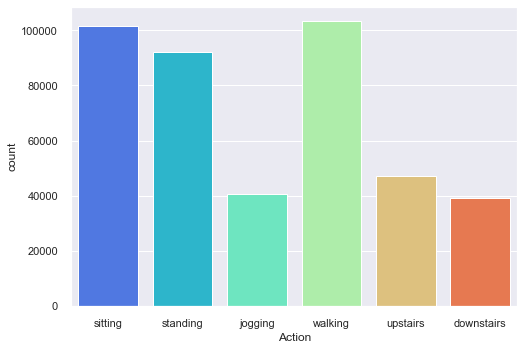

In [81]:
sns.countplot(data=test_set,x="Action",palette="rainbow")

#### Distribution plot of test set

array([[<AxesSubplot:title={'center':'attitude.roll'}>,
        <AxesSubplot:title={'center':'attitude.pitch'}>,
        <AxesSubplot:title={'center':'attitude.yaw'}>],
       [<AxesSubplot:title={'center':'gravity.x'}>,
        <AxesSubplot:title={'center':'gravity.y'}>,
        <AxesSubplot:title={'center':'gravity.z'}>],
       [<AxesSubplot:title={'center':'rotationRate.x'}>,
        <AxesSubplot:title={'center':'rotationRate.y'}>,
        <AxesSubplot:title={'center':'rotationRate.z'}>],
       [<AxesSubplot:title={'center':'userAcceleration.x'}>,
        <AxesSubplot:title={'center':'userAcceleration.y'}>,
        <AxesSubplot:title={'center':'userAcceleration.z'}>]],
      dtype=object)

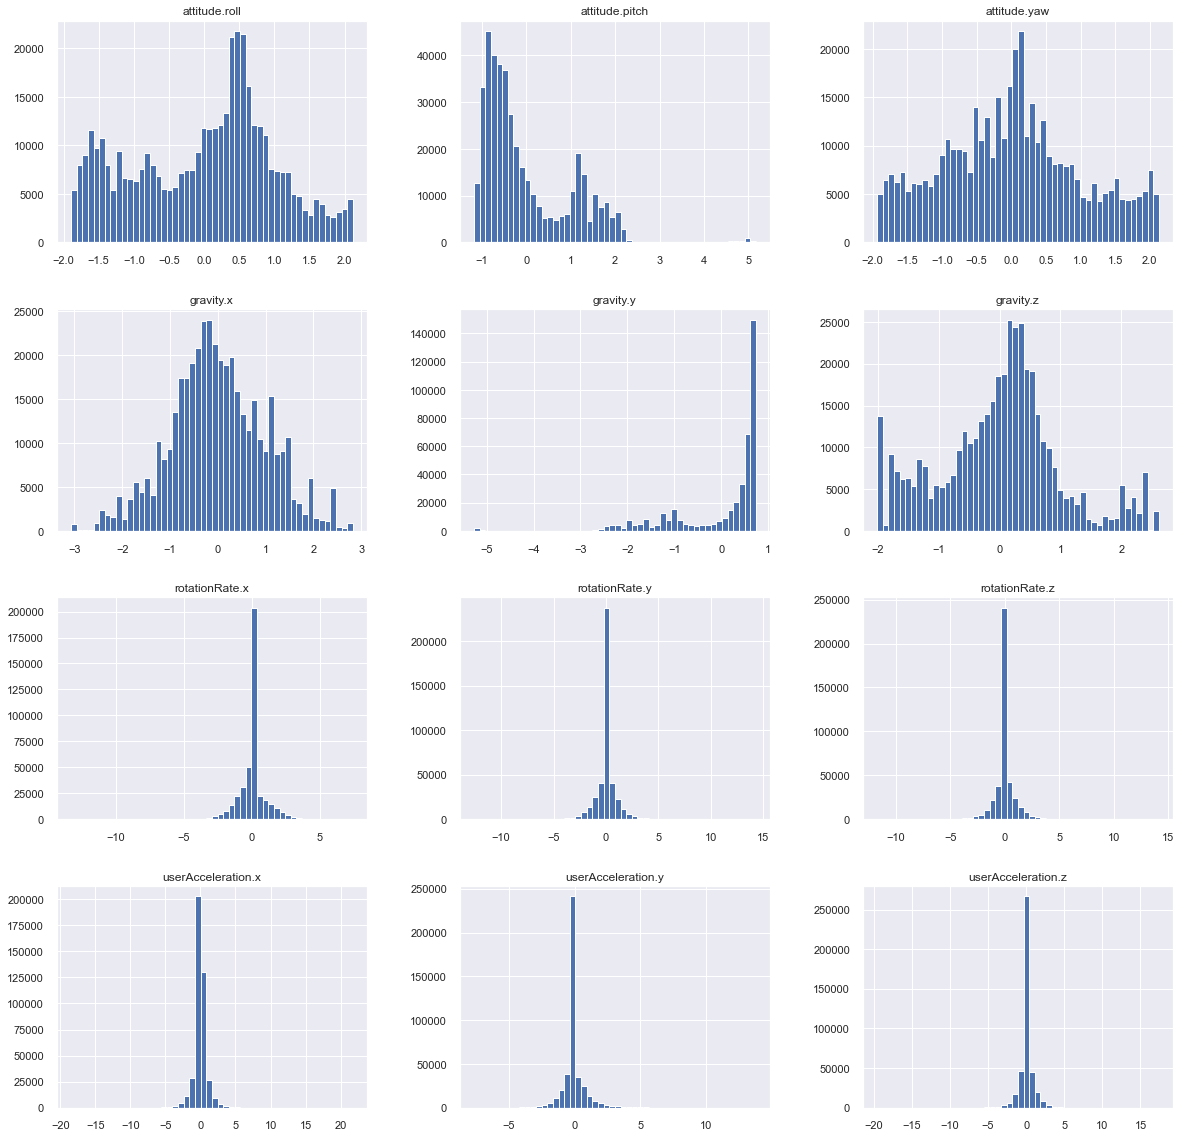

In [82]:
test_set.hist(bins=50,figsize=(20,20))

#### Observations
- The attitude.roll, attitude.pitch, attitude.yaw, gravity.x, gravity.y, gravity.z have skewed distribution.
- The rotationRate.x, rotationRate.y, rotationRate.z, userAcceleration.x, userAcceleration.y, userAcceleration.z have gaussian distribution.

## Visualize box plot to see the outlier's density in standardized test data

<AxesSubplot:>

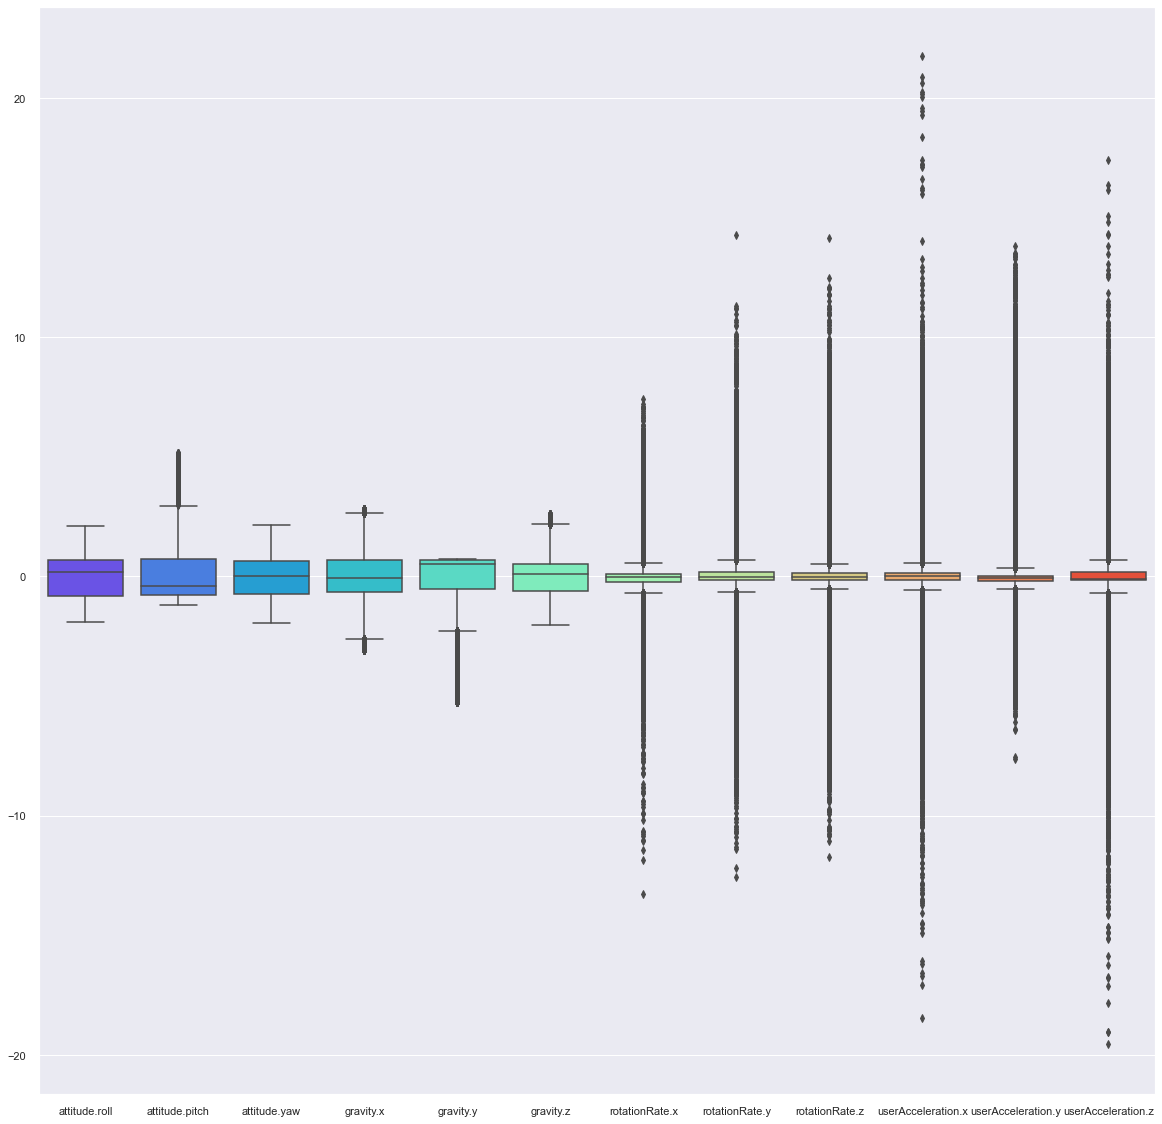

In [83]:
plt.figure(figsize=(20,20))
sns.boxplot(data=test_set,palette="rainbow")

#### Observation
- The std normally distributed columns have very large number of outliers.
- The skewed columns have very fewer number of outliers.

# Removing the outliers from test set

Min values of test_set['rotationRate.x'] = -13.290978317293899 
Lower Brackert of rotationRate.x = -3.000324071194739 

Max values of test_set['rotationRate.x'] = 7.43088121598195 
Upper Brackert of rotationRate.x = 3.013137009389534
(416444, 13)
----------------------------------------------------------------------
Min values of test_set_without_outliers['rotationRate.y'] = -11.303718224154325 
 Lower Brackert of rotationRate.y = -2.8360127754540048
Max values of test_set_without_outliers['rotationRate.y'] = 14.287150236560276 
 Upper Brackert of rotationRate.y = 2.848901551770201
(407702, 13)
----------------------------------------------------------------------
Min values of test_set_without_outliers['rotationRate.z'] = -11.077094805369205 
 Lower Brackert of rotationRate.z = -2.7788066500236757
Max values of test_set_without_outliers['rotationRate.z'] = 12.474519259330679 
 Upper Brackert of rotationRate.z = 2.7812221123564327
(398265, 13)
------------------------------------------

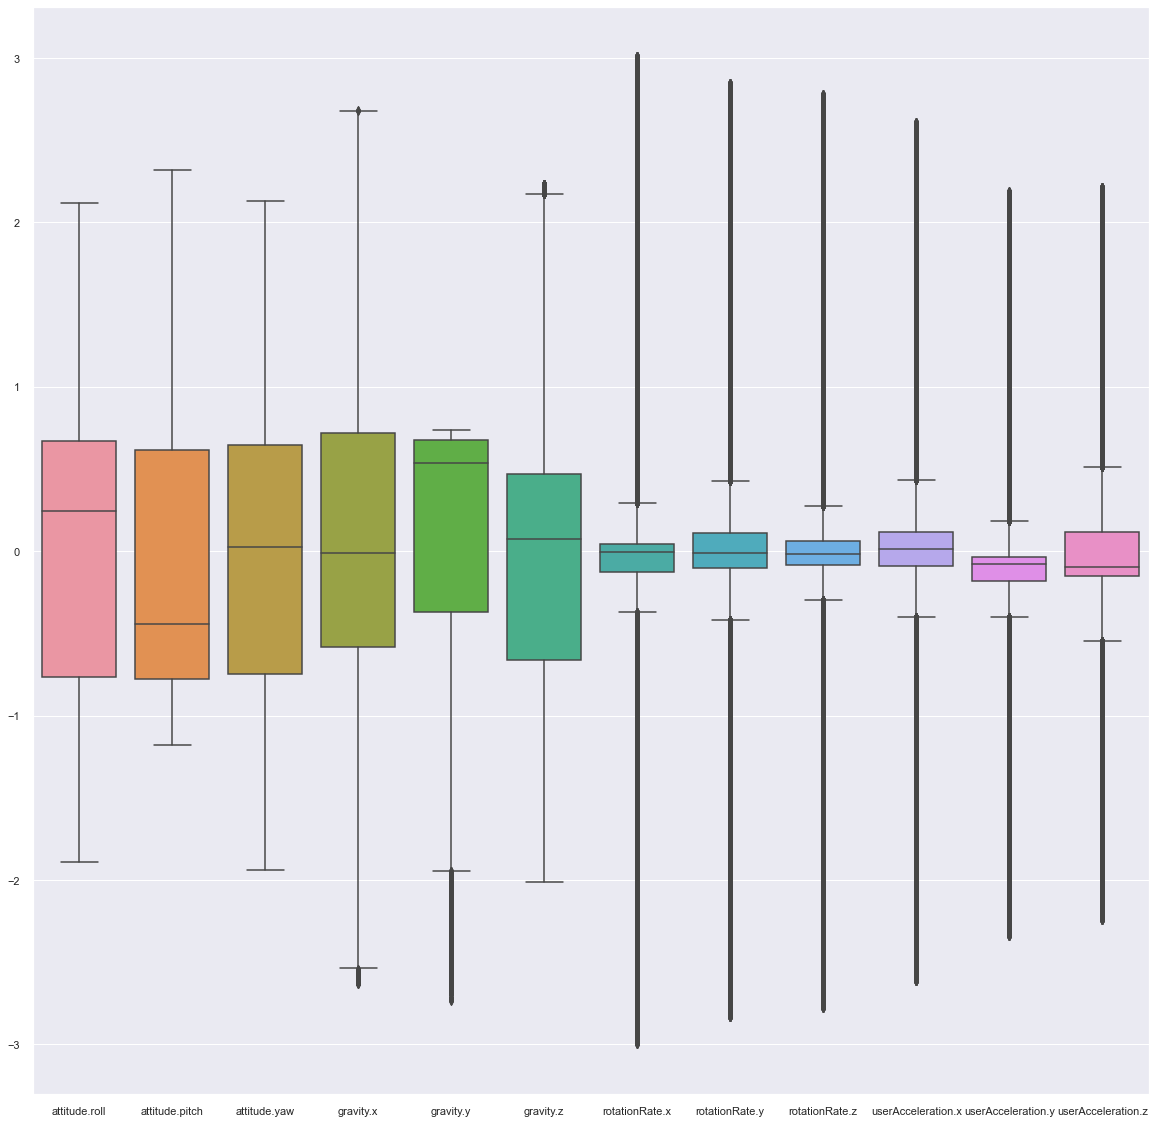

In [84]:
## 1). Gaussian distributed data

## 1. rotationRate.x
LB_rotationRate_x = test_set['rotationRate.x'].mean() - 3 * test_set['rotationRate.x'].std()
UB_rotationRate_x = test_set['rotationRate.x'].mean() + 3 * test_set['rotationRate.x'].std()
print("Min values of test_set['rotationRate.x'] =",test_set['rotationRate.x'].min(),"\nLower Brackert of rotationRate.x =",LB_rotationRate_x,"\n")
print("Max values of test_set['rotationRate.x'] =",test_set['rotationRate.x'].max(),"\nUpper Brackert of rotationRate.x =",UB_rotationRate_x)
# plt.figure(figsize=(20,20))
test_set_without_outliers=(test_set[(test_set["rotationRate.x"]>LB_rotationRate_x) & (test_set["rotationRate.x"]<UB_rotationRate_x)])
print(test_set_without_outliers.shape)
# sns.boxplot(data=test_set_without_outliers,palette="rainbow")

print("-------"*10)

## 2. rotationRate.y
LB_rotationRate_y = test_set_without_outliers['rotationRate.y'].mean() - 3 * test_set_without_outliers['rotationRate.y'].std()
UB_rotationRate_y = test_set_without_outliers['rotationRate.y'].mean() + 3 * test_set_without_outliers['rotationRate.y'].std()
print("Min values of test_set_without_outliers['rotationRate.y'] =",test_set_without_outliers['rotationRate.y'].min(),"\n Lower Brackert of rotationRate.y =",LB_rotationRate_y)
print("Max values of test_set_without_outliers['rotationRate.y'] =",test_set_without_outliers['rotationRate.y'].max(),"\n Upper Brackert of rotationRate.y =",UB_rotationRate_y)

test_set_without_outliers=(test_set_without_outliers[(test_set_without_outliers["rotationRate.y"]>LB_rotationRate_y) & (test_set_without_outliers["rotationRate.y"]<UB_rotationRate_y)])
print(test_set_without_outliers.shape)

# plt.figure(figsize=(20,20))
# sns.boxplot(data=test_set_without_outliers,palette="rainbow")

print("-------"*10)

## 3. rotationRate.z
LB_rotationRate_z = test_set_without_outliers['rotationRate.z'].mean() - 3 * test_set_without_outliers['rotationRate.z'].std()
UB_rotationRate_z = test_set_without_outliers['rotationRate.z'].mean() + 3 * test_set_without_outliers['rotationRate.z'].std()
print("Min values of test_set_without_outliers['rotationRate.z'] =",test_set_without_outliers['rotationRate.z'].min(),"\n Lower Brackert of rotationRate.z =",LB_rotationRate_z)
print("Max values of test_set_without_outliers['rotationRate.z'] =",test_set_without_outliers['rotationRate.z'].max(),"\n Upper Brackert of rotationRate.z =",UB_rotationRate_z)

test_set_without_outliers=(test_set_without_outliers[(test_set_without_outliers["rotationRate.z"]>LB_rotationRate_z) & (test_set_without_outliers["rotationRate.z"]<UB_rotationRate_z)])
print(test_set_without_outliers.shape)

# plt.figure(figsize=(20,20))
# sns.boxplot(data=test_set_without_outliers,palette="rainbow")

print("-------"*10)

## 4. userAcceleration.x
LB_userAcceleration_x = test_set_without_outliers['userAcceleration.x'].mean() - 3 * test_set_without_outliers['userAcceleration.x'].std()
UB_userAcceleration_x = test_set_without_outliers['userAcceleration.x'].mean() + 3 * test_set_without_outliers['userAcceleration.x'].std()
print("Min values of test_set_without_outliers['userAcceleration.x'] =",test_set_without_outliers['userAcceleration.x'].min(),"\n Lower Brackert of userAcceleration.x =",LB_userAcceleration_x)
print("Max values of test_set_without_outliers['userAcceleration.x'] =",test_set_without_outliers['userAcceleration.x'].max(),"\n Upper Brackert of userAcceleration.x =",UB_userAcceleration_x)

test_set_without_outliers=(test_set_without_outliers[(test_set_without_outliers["userAcceleration.x"]>LB_userAcceleration_x) & (test_set_without_outliers["userAcceleration.x"]<UB_userAcceleration_x)])
print(test_set_without_outliers.shape)
# plt.figure(figsize=(20,20))
# sns.boxplot(data=test_set_without_outliers)

print("-------"*10)

## 5. userAcceleration.y
LB_userAcceleration_y = test_set_without_outliers['userAcceleration.y'].mean() - 3 * test_set_without_outliers['userAcceleration.y'].std()
UB_userAcceleration_y = test_set_without_outliers['userAcceleration.y'].mean() + 3 * test_set_without_outliers['userAcceleration.y'].std()
print("Min values of test_set_without_outliers['userAcceleration.y'] =",test_set_without_outliers['userAcceleration.y'].min(),"\n Lower Brackert of userAcceleration.y =",LB_userAcceleration_y)
print("Max values of test_set_without_outliers['userAcceleration.y'] =",test_set_without_outliers['userAcceleration.y'].max(),"\n Upper Brackert of userAcceleration.y =",UB_userAcceleration_y)

test_set_without_outliers=(test_set_without_outliers[(test_set_without_outliers["userAcceleration.y"]>LB_userAcceleration_y) & (test_set_without_outliers["userAcceleration.y"]<UB_userAcceleration_y)])
print(test_set_without_outliers.shape)
# plt.figure(figsize=(20,20))
# sns.boxplot(data=test_set_without_outliers)

print("-------"*10)

## 6. userAcceleration.z
LB_userAcceleration_z = test_set_without_outliers['userAcceleration.z'].mean() - 3 * test_set_without_outliers['userAcceleration.z'].std()
UB_userAcceleration_z = test_set_without_outliers['userAcceleration.z'].mean() + 3 * test_set_without_outliers['userAcceleration.z'].std()
print("Min values of test_set_without_outliers['userAcceleration.z'] =",test_set_without_outliers['userAcceleration.z'].min(),"\n Lower Brackert of userAcceleration.z =",LB_userAcceleration_z)
print("Max values of test_set_without_outliers['userAcceleration.z'] =",test_set_without_outliers['userAcceleration.z'].max(),"\n Upper Brackert of userAcceleration.z =",UB_userAcceleration_z)

test_set_without_outliers=(test_set_without_outliers[(test_set_without_outliers["userAcceleration.z"]>LB_userAcceleration_z) & (test_set_without_outliers["userAcceleration.z"]<UB_userAcceleration_z)])
print(test_set_without_outliers.shape)
# plt.figure(figsize=(20,20))
# sns.boxplot(data=test_set_without_outliers)

print("-------"*10)


## 2). Skewed data

## 1. attitude.pitch
Q_1_attitude_pitch = test_set_without_outliers['attitude.pitch'].quantile(0.25)
Q_3_attitude_pitch = test_set_without_outliers['attitude.pitch'].quantile(0.75)
IQR_attitude_pitch = Q_3_attitude_pitch - Q_1_attitude_pitch
LB_attitude_pitch = Q_1_attitude_pitch - 1.5 * (IQR_attitude_pitch)
UB_attitude_pitch = Q_3_attitude_pitch + 1.5 * (IQR_attitude_pitch)
# print("Min values of test_set_without_outliers['attitude.pitch'] =",test_set_without_outliers['attitude.pitch'].min(),"\n Lower Brackert of attitude.pitch =",LB_attitude_pitch)
print("Max values of test_set_without_outliers['attitude.pitch'] =",test_set_without_outliers['attitude.pitch'].max(),"\n Upper Brackert of attitude.pitch =",UB_attitude_pitch)

test_set_without_outliers=(test_set_without_outliers[(test_set_without_outliers["attitude.pitch"]<UB_attitude_pitch)])
print(test_set_without_outliers.shape)
# plt.figure(figsize=(20,20))
# sns.boxplot(data=test_set_without_outliers)

print("-------"*10)

## 2. gravity.x
Q_1_gravity_x = test_set_without_outliers['gravity.x'].quantile(0.25)
Q_3_gravity_x = test_set_without_outliers['gravity.x'].quantile(0.75)
IQR_gravity_x = Q_3_gravity_x - Q_1_gravity_x
LB_gravity_x = Q_1_gravity_x - 1.5 * (IQR_gravity_x)
UB_gravity_x = Q_3_gravity_x + 1.5 * (IQR_gravity_x)
print("Min values of test_set_without_outliers['gravity.x'] =",test_set_without_outliers['gravity.x'].min(),"\n Lower Brackert of gravity.x =",LB_gravity_x)
print("Max values of test_set_without_outliers['gravity.x'] =",test_set_without_outliers['gravity.x'].max(),"\n Upper Brackert of gravity.x =",UB_gravity_x)

test_set_without_outliers=(test_set_without_outliers[(test_set_without_outliers["gravity.x"]>LB_gravity_x) & (test_set_without_outliers["gravity.x"]<UB_gravity_x)])
print(test_set_without_outliers.shape)
# plt.figure(figsize=(20,20))
# sns.boxplot(data=test_set_without_outliers)

print("-------"*10)

## 3. gravity.y
Q_1_gravity_y = test_set_without_outliers['gravity.y'].quantile(0.25)
Q_3_gravity_y = test_set_without_outliers['gravity.y'].quantile(0.75)
IQR_gravity_y = Q_3_gravity_y - Q_1_gravity_y
LB_gravity_y = Q_1_gravity_y - 1.5 * (IQR_gravity_y)
UB_gravity_y = Q_3_gravity_y + 1.5 * (IQR_gravity_y)
print("Min values of test_set_without_outliers['gravity.y'] =",test_set_without_outliers['gravity.y'].min(),"\n Lower Brackert of gravity.y =",LB_gravity_y)
print("Max values of test_set_without_outliers['gravity.y'] =",test_set_without_outliers['gravity.y'].max(),"\n Upper Brackert of gravity.y =",UB_gravity_y)

test_set_without_outliers=(test_set_without_outliers[(test_set_without_outliers["gravity.y"]>LB_gravity_y)])
print(test_set_without_outliers.shape)
# plt.figure(figsize=(20,20))
# sns.boxplot(data=test_set_without_outliers)

print("-------"*10)

## 4. gravity.z
Q_1_gravity_z = test_set_without_outliers['gravity.z'].quantile(0.25)
Q_3_gravity_z = test_set_without_outliers['gravity.z'].quantile(0.75)
IQR_gravity_z = Q_3_gravity_z - Q_1_gravity_z
LB_gravity_z = Q_1_gravity_z - 1.5 * (IQR_gravity_z)
UB_gravity_z = Q_3_gravity_z + 1.5 * (IQR_gravity_z)
print("Min values of test_set_without_outliers['gravity.z'] =",test_set_without_outliers['gravity.z'].min(),"\n Lower Brackert of gravity.z =",LB_gravity_z)
print("Max values of test_set_without_outliers['gravity.z'] =",test_set_without_outliers['gravity.z'].max(),"\n Upper Brackert of gravity.z =",UB_gravity_z)

test_set_without_outliers=(test_set_without_outliers[(test_set_without_outliers["gravity.z"]>LB_gravity_z) & (test_set_without_outliers["gravity.z"]<UB_gravity_z)])
print(test_set_without_outliers.shape)
plt.figure(figsize=(20,20))
sns.boxplot(data=test_set_without_outliers)

print("-------"*10)





#### Observation 
- Most of the outliers have been removed from test set

# Creating the input feature's test dataframe
- X_test

In [85]:
X_test=test_set_without_outliers.drop(columns="Action")
X_test.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
336591,-1.487003,1.442723,0.716165,-1.811890,-1.453170,2.131709,-0.002035,-0.017182,-0.020491,0.070812,-0.076120,-0.092492
472981,0.519087,0.753243,-0.537426,1.309709,-0.534733,-1.209042,-0.002525,-0.012707,-0.016323,0.018021,-0.057555,-0.096407
652268,1.090907,-0.518833,-1.399941,0.825624,0.576256,0.295697,-0.011483,-0.074773,-0.024246,-0.061685,-0.031346,-0.090961
347223,0.616055,1.811367,0.247613,1.960435,-1.989792,-1.313611,-0.003781,-0.008887,-0.014913,-0.019858,-0.076568,-0.144614
1210738,0.515074,-0.235971,-0.544097,0.660360,0.413896,-0.525812,-0.669608,-1.019352,-0.826135,0.248130,-0.602263,0.008445


# Q-Q plot for X_test set outliers
- As the dataset size is very large, so it will take a very high computational cost and time to plot kde graph.  
  So instead of plotting kde plot, we are going to plot Q-Q plot.
* Q-Q plot is used to check whether feature is guassian or normal distributed

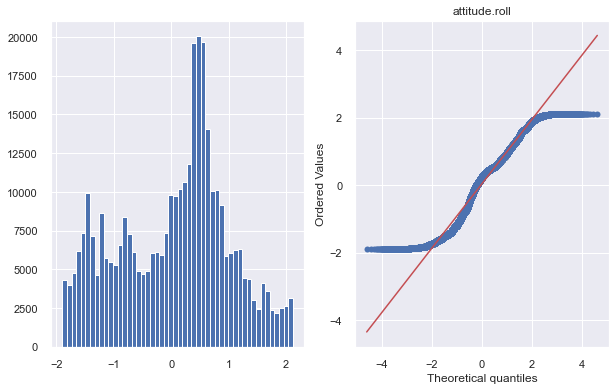

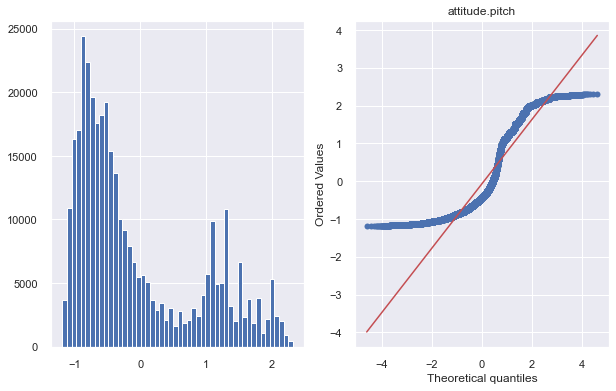

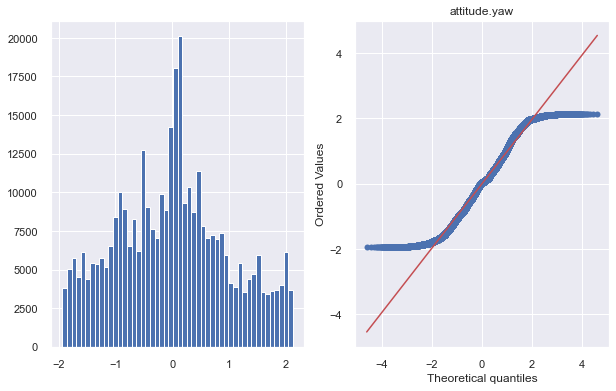

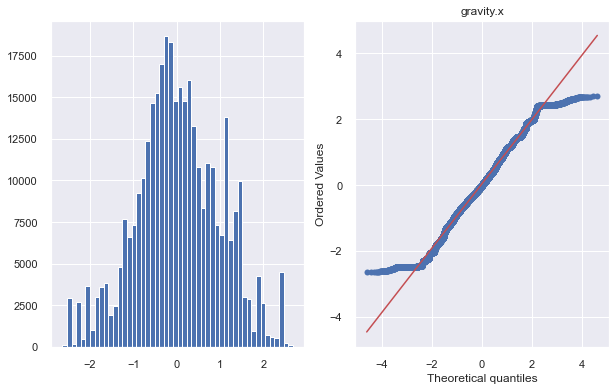

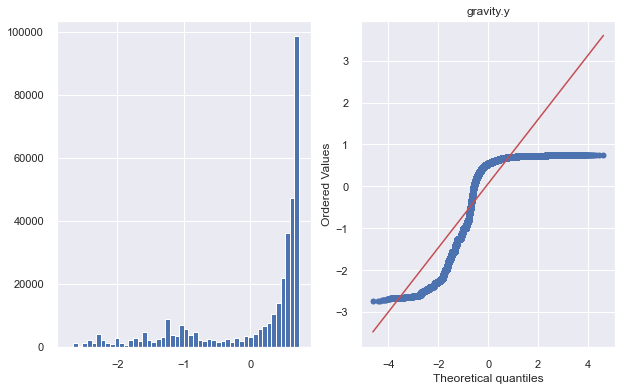

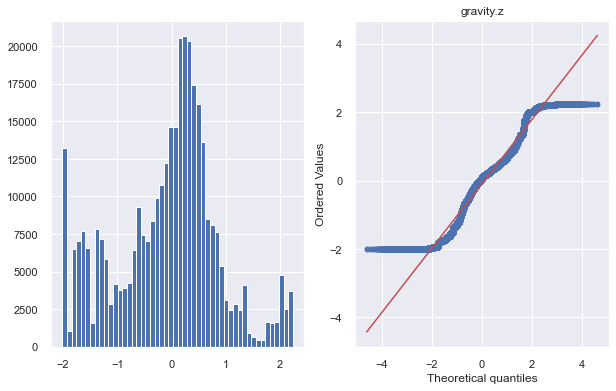

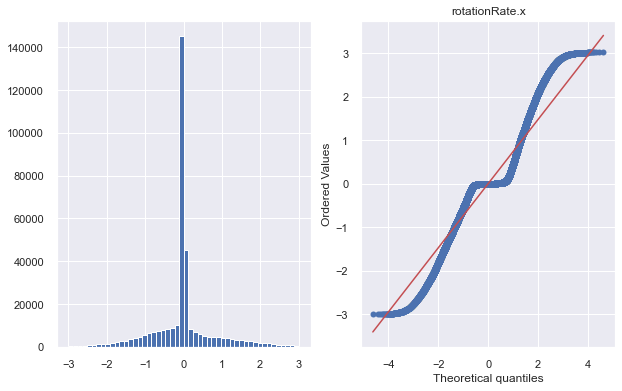

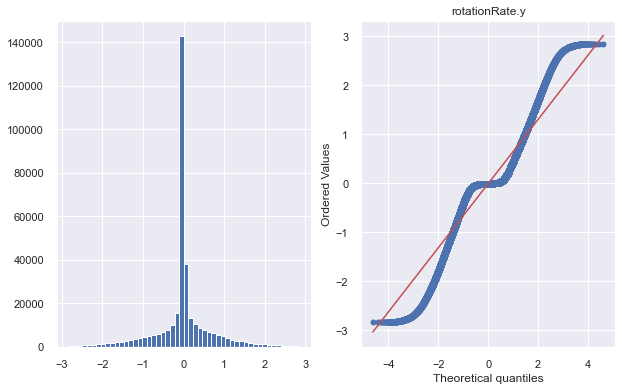

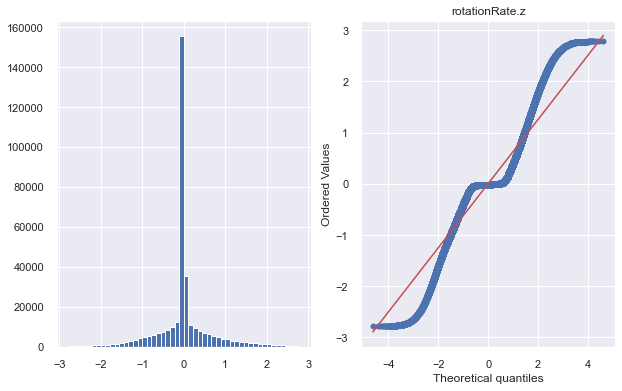

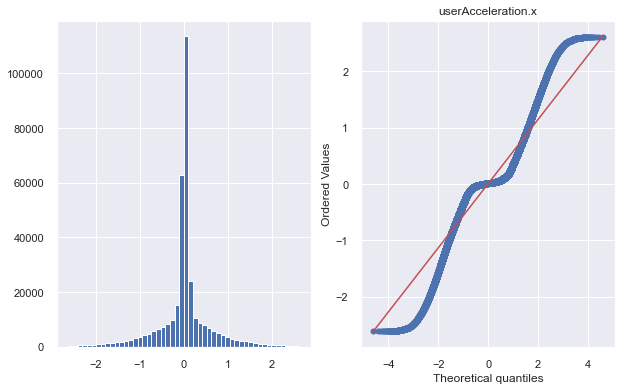

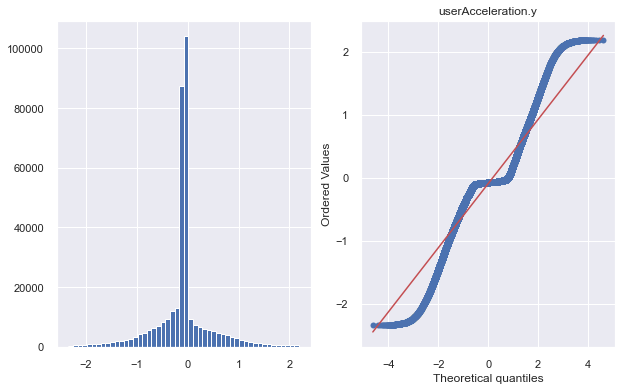

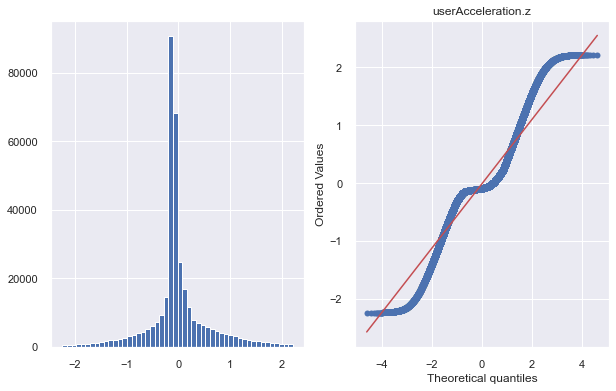

In [86]:
for i in X_test:
    plot_data(X_test,i)

# Creating test target column 
- y_test

In [87]:
y_test=test_set_without_outliers["Action"]
y_test=pd.Series(y_test,name="Action")
y_test

336591      sitting
472981      sitting
652268     standing
347223      sitting
1210738     walking
             ...   
163482      jogging
1346624     walking
1201011     walking
246512      jogging
927509     upstairs
Name: Action, Length: 355842, dtype: object

### Visualizing Count plots of train data without outliers

<AxesSubplot:xlabel='Action', ylabel='count'>

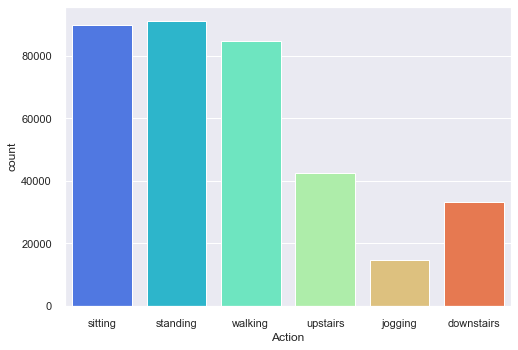

In [88]:
sns.countplot(data=test_set_without_outliers,x="Action",palette="rainbow")

### Correlation matrix of X_test

In [89]:
corr_mat_test=X_test.corr()
corr_mat_test

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
attitude.roll,1.000000,0.031885,0.032706,0.676184,-0.031647,-0.310207,-0.026698,0.020567,-0.008134,-0.103524,0.002308,0.064760
attitude.pitch,0.031885,1.000000,0.079385,0.226098,-0.981082,-0.483914,0.001725,-0.050920,0.018503,-0.028187,-0.019389,-0.006442
attitude.yaw,0.032706,0.079385,1.000000,-0.017425,-0.066197,-0.002868,-0.000198,0.016287,-0.003685,0.028439,0.000668,-0.028771
gravity.x,0.676184,0.226098,-0.017425,1.000000,-0.216246,-0.490157,-0.020852,-0.007390,-0.007267,-0.128251,0.005010,0.025006
gravity.y,-0.031647,-0.981082,-0.066197,-0.216246,1.000000,0.480628,-0.000471,0.032687,-0.007067,0.014453,0.004381,0.036249
gravity.z,-0.310207,-0.483914,-0.002868,-0.490157,0.480628,1.000000,0.000442,0.046069,-0.068567,0.102240,0.007327,-0.171422
rotationRate.x,-0.026698,0.001725,-0.000198,-0.020852,-0.000471,0.000442,1.000000,-0.158956,0.407083,-0.071486,0.076351,0.072354
rotationRate.y,0.020567,-0.050920,0.016287,-0.007390,0.032687,0.046069,-0.158956,1.000000,-0.123683,-0.027016,0.112306,-0.048723
rotationRate.z,-0.008134,0.018503,-0.003685,-0.007267,-0.007067,-0.068567,0.407083,-0.123683,1.000000,-0.077393,0.001944,0.097213
userAcceleration.x,-0.103524,-0.028187,0.028439,-0.128251,0.014453,0.102240,-0.071486,-0.027016,-0.077393,1.000000,0.007625,-0.258306


## Heatmap for correlation matrix of X_test

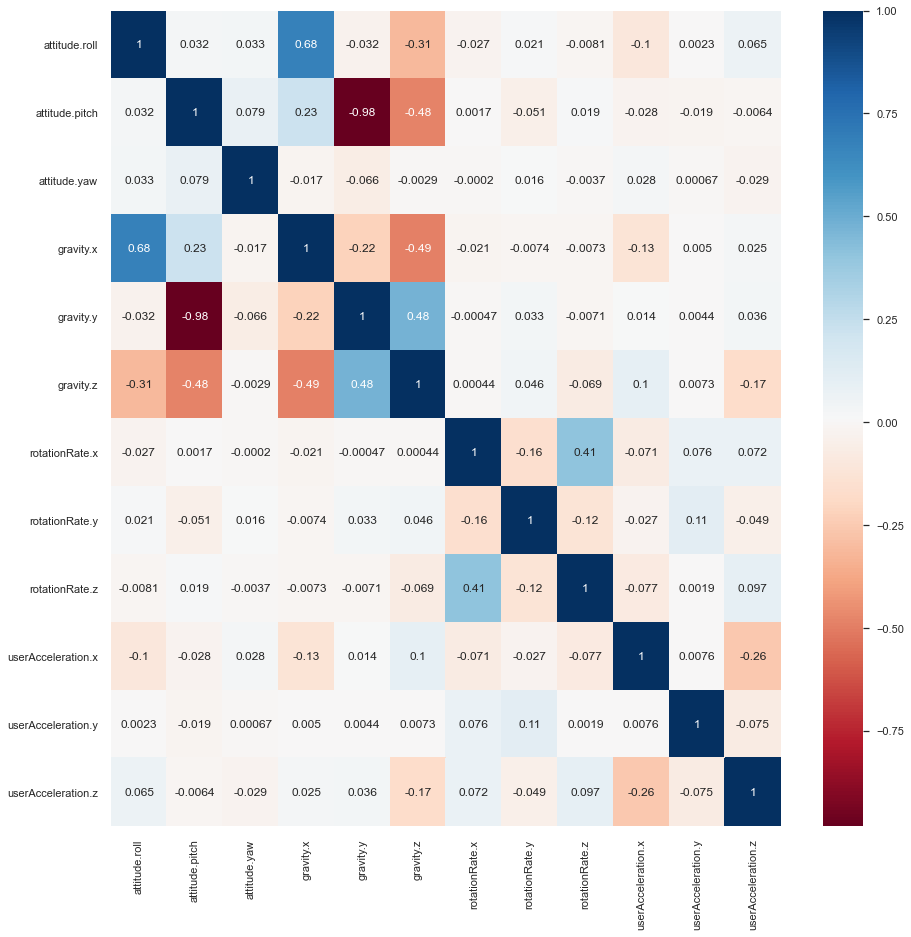

In [90]:
#plot the heatmap
plt.figure(figsize=(15,15))
ax = sns.heatmap(X_test.corr(),annot=True,cmap='RdBu')

#### Observations
- Most of the features are not correlated w.r.to another, but some features are related to each other.    
       

- Some +ve correlated features are     
1. attitude.roll and gravity.x
2. gravity.z and gravity.y are slightly +ve correlated   
3. rotationRate.x and rotationRate.z are also slightly +ve correlated   

- Some -ve correlated features are  
1. gravity.y and attitude.pitch are highly -ve correlated
2. gravity.z and attitude.pitch are slightly -ve correlated
3. gravity.z and gravity.x are slightly -ve correlated

# Classification Algorithms

## 1. Logistic Regression

#### Model training

In [91]:
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

#### Predicting final class for X_test

In [92]:
#Predicting the test set result  
y_pred= lr_classifier.predict(X_test)  

#### Plotting cinfusion matrix

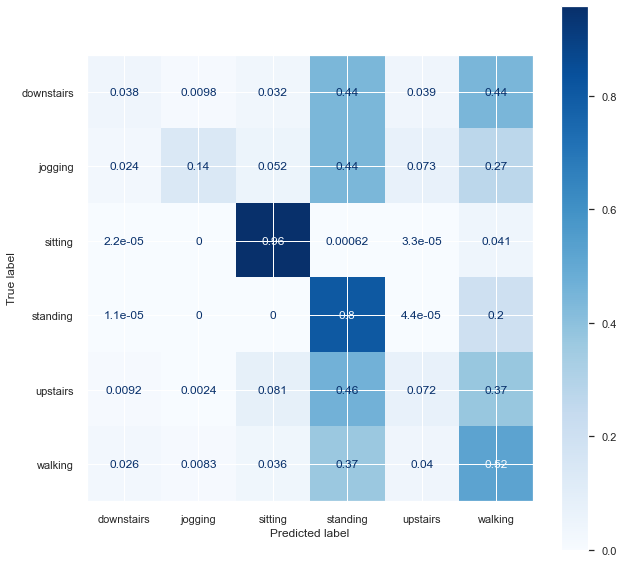

In [93]:
fig, ax = plt.subplots(figsize=(10, 10))
# plot_confusion_matrix(your_model, X_test, y_test, ax=ax)
plot_confusion_matrix(lr_classifier, X_test, y_test,normalize='true',cmap=plt.cm.Blues, ax=ax)

#### Classification Report

In [94]:
print ('\n*Classification Report:\n'), 
clf_report=classification_report(y_test,y_pred)
print(clf_report)


*Classification Report:

              precision    recall  f1-score   support

  downstairs       0.30      0.04      0.07     33036
     jogging       0.65      0.14      0.23     14778
     sitting       0.91      0.96      0.93     89822
    standing       0.51      0.80      0.62     91103
    upstairs       0.35      0.07      0.12     42434
     walking       0.44      0.52      0.48     84669

    accuracy                           0.59    355842
   macro avg       0.53      0.42      0.41    355842
weighted avg       0.56      0.59      0.54    355842



#### Plotting Classification report matrix

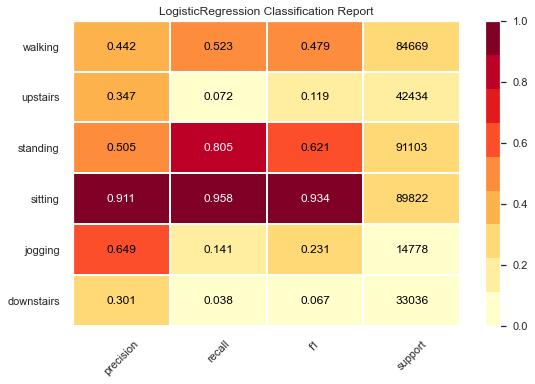

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [95]:
classes=['downstairs','jogging','sitting','standing','upstairs','walking']
visualizer = ClassificationReport(lr_classifier, classes=classes, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#### Observations
- Precision score tells the % of correct +ve prediction we predicted out of total +ve prediction we predicted.        
- Recall tells the % of correct +ve prediction we detect out of total actual +ve.   
- f1 score is the harmonic mean of precision and recall, f1 score is high only if both precision and recall are high. 
- Support is the number of actual occurrences of the class in the specified dataset.   






#### For Logistic Regression 
- 'sitting' class has precision of 0.911 which means that out of total +ve prediction, it is correct 91.1% of time.        
- 'sitting' has the recall score of 0.958 which means that it detect 95.8% of the 'sitting' class.
- 'f1 score' has high value for 'sitting' class because it has high value of both precision and recall.    

#### Accuracy Score

In [96]:
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy score: 0.5902816418522827


#### K-fold cross validation

In [97]:
accuracy_clf = cross_val_score(lr_classifier, X_test, y_test, scoring='accuracy', cv = 5)
print(accuracy_clf)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[0.59059422 0.58977926 0.59164231 0.59300528 0.59019503]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Grid Search CV

In [98]:
parameters = [{"penalty" : ['l1', 'l2'],
               "C" : [0.5,0.75]}]
grid_search = GridSearchCV(estimator=lr_classifier,param_grid=parameters, scoring="accuracy", cv=10, n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
accuracy = grid_search.best_score_
print("Accuracy of grid search model =",accuracy)

Accuracy of grid search model = 0.5891137516245589


In [100]:
grid_search.best_params_

{'C': 0.75, 'penalty': 'l2'}

In [101]:
lr_classifier = LogisticRegression(C=0.75, penalty = "l2")
lr_classifier.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.75)

In [102]:
#Predicting the test set result  
y_pred= lr_classifier.predict(X_test)  
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy score: 0.5902310576042176


## 2. Naive Bayes

#### Model training

In [103]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

#### Predicting final class for X_test

In [104]:
y_pred=gnb.predict(X_test)

#### Plotting Confusion matrix

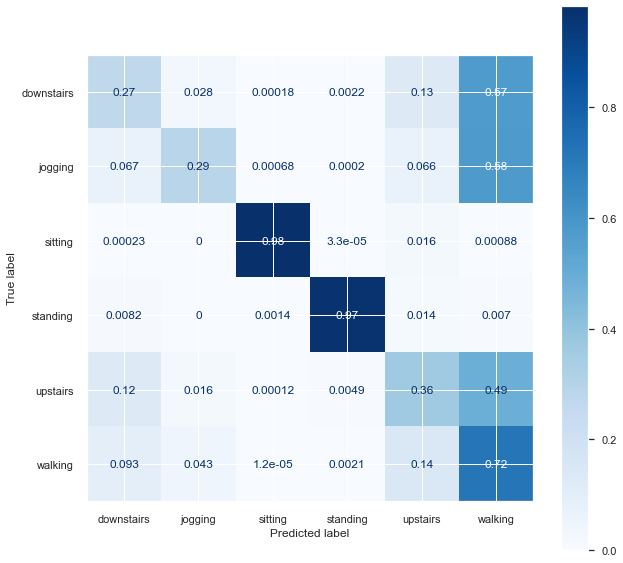

In [105]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gnb, X_test, y_test,normalize='true',cmap=plt.cm.Blues, ax=ax)

#### Classification report

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  downstairs       0.37      0.27      0.31     33036
     jogging       0.45      0.29      0.35     14778
     sitting       1.00      0.98      0.99     89822
    standing       0.99      0.97      0.98     91103
    upstairs       0.43      0.36      0.40     42434
     walking       0.55      0.72      0.62     84669

    accuracy                           0.75    355842
   macro avg       0.63      0.60      0.61    355842
weighted avg       0.74      0.75      0.74    355842



#### Plotting Classification report matrix

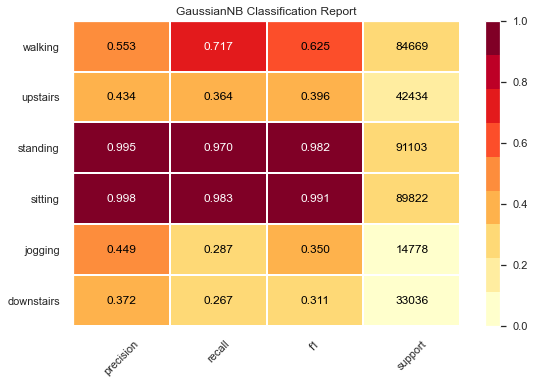

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [107]:
classes=['downstairs','jogging','sitting','standing','upstairs','walking']
visualizer = ClassificationReport(gnb, classes=classes, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#### Observations
- Precision score tells the % of correct +ve prediction we predicted out of total +ve prediction we predicted.        
- Recall tells the % of correct +ve prediction we detect out of total actual +ve.   
- f1 score is the harmonic mean of precision and recall, f1 score is high only if both precision and recall are high. 
- Support is the number of actual occurrences of the class in the specified dataset.   






#### For Naive Bayes
- 'sitting' class has precision of 0.998 which means that out of total +ve prediction we predict, it is correct 99.8% of time. 
- 'sitting' has the recall score of 0.983 which means that it detect 98.3% of the 'sitting' class.
- 'f1 score' has high value for 'sitting' class because it has high value of both precision and recall.

- 'standing' class has precision of 0.995 which means that out of total +ve prediction we predict, it is correct 99.5% of time. 
- 'standing' has the recall score of 0.970 which means that it detect 97.0% of the 'sitting' class.

#### Accuracy score

In [108]:
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy score: 0.7472614250144727


#### K-fold cross validation

In [109]:
accuracy_gnb = cross_val_score(gnb, X_test, y_test, scoring='accuracy', cv = 5)
print(accuracy_gnb)

[0.74687013 0.74588655 0.74776585 0.75092738 0.74596729]


## 3. K-Nearest Neighbors Classifier

#### Model training

In [110]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

#### Prediction on X_test

In [111]:
y_pred=knn.predict(X_test)

#### Plotting Confusion matrix

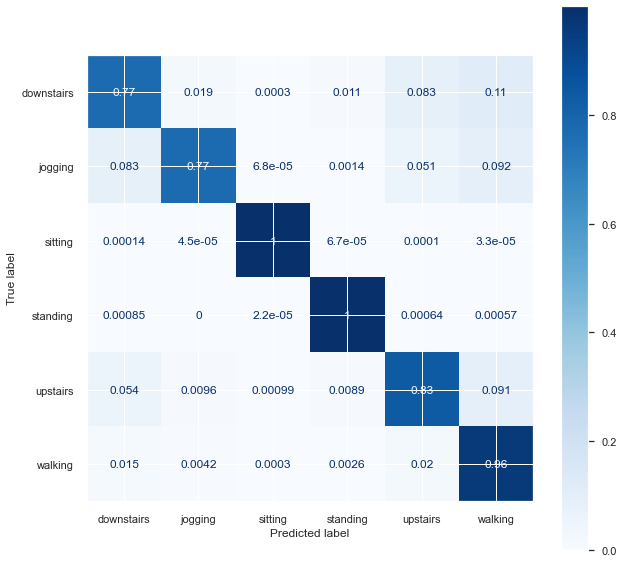

In [112]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn, X_test, y_test,normalize='true',cmap=plt.cm.Blues, ax=ax)

#### Classification Report

In [113]:
print ('\n*Classification Report:\n'), 
clf_report=classification_report(y_test,y_pred)
print(clf_report)


*Classification Report:

              precision    recall  f1-score   support

  downstairs       0.84      0.77      0.80     33036
     jogging       0.89      0.77      0.83     14778
     sitting       1.00      1.00      1.00     89822
    standing       0.99      1.00      0.99     91103
    upstairs       0.87      0.83      0.85     42434
     walking       0.90      0.96      0.93     84669

    accuracy                           0.94    355842
   macro avg       0.91      0.89      0.90    355842
weighted avg       0.94      0.94      0.94    355842



#### Plot Classification report matrix

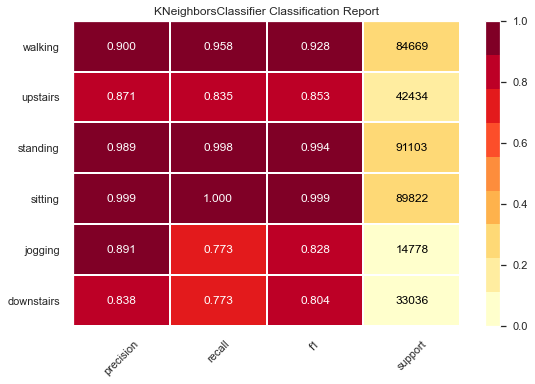

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [114]:
classes=['downstairs','jogging','sitting','standing','upstairs','walking']
visualizer = ClassificationReport(knn, classes=classes, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#### Observations
- Precision score tells the % of correct +ve prediction we predicted out of total +ve prediction we predicted.        
- Recall tells the % of correct +ve prediction we detect out of total actual +ve.   
- f1 score is the harmonic mean of precision and recall, f1 score is high only if both precision and recall are high. 
- Support is the number of actual occurrences of the class in the specified dataset.   






#### For K-Nearest Neighbors Classifier
- 'sitting' class has precision of 0.999 which means that out of total +ve prediction we predict, it is correct 99.9% of time. 
- 'sitting' has the recall score of 1.0 which means that it detect 100% of the 'sitting' class.
- 'f1 score' has high value for 'sitting' class because it has high value of both precision and recall.

- K-Nearest Neighbors model is fitted very well on this dataset which results in very high precision and recall scores.   

#### Accuracy Score

In [115]:
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy score: 0.9391330983976034


#### K-fold cross validation

In [116]:
accuracy_knn = cross_val_score(knn, X_test, y_test, scoring='accuracy', cv = 5)
print(accuracy_knn)

[0.91884107 0.91688797 0.91690085 0.91720998 0.92048393]


#### Grid Search CV

#### Due to limitation of system hardware, grid search cv was taking too much time to perform. So i was unable to apply grid search cv further.

## 4. Decision Tree

#### Model training

In [117]:
dt_classifier = DecisionTreeClassifier(max_depth=12, random_state=0,min_samples_leaf=10,)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=10, random_state=0)

#### Predicting classes on X_test

In [118]:
y_pred=dt_classifier.predict(X_test)

#### Plotting Confusion matrix

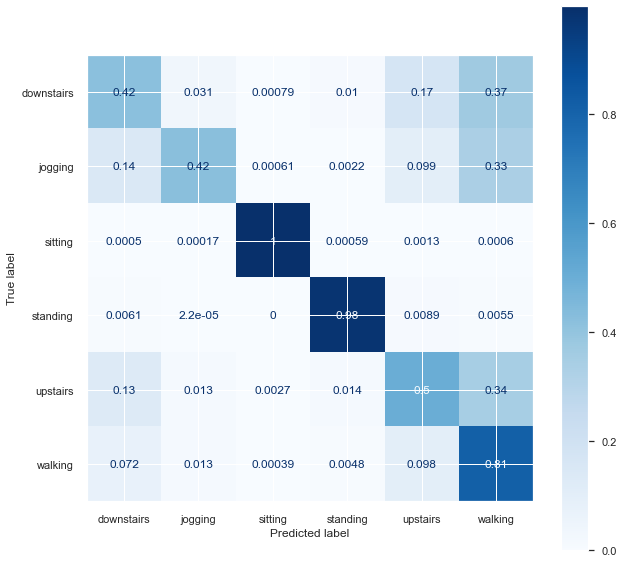

In [119]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(dt_classifier, X_test, y_test,normalize='true',cmap=plt.cm.Blues, ax=ax)

#### Classification report

In [120]:
print ('\n*Classification Report:\n'), 
clf_report=classification_report(y_test,y_pred)
print(clf_report)


*Classification Report:

              precision    recall  f1-score   support

  downstairs       0.49      0.42      0.45     33036
     jogging       0.70      0.42      0.53     14778
     sitting       1.00      1.00      1.00     89822
    standing       0.98      0.98      0.98     91103
    upstairs       0.56      0.50      0.53     42434
     walking       0.68      0.81      0.74     84669

    accuracy                           0.81    355842
   macro avg       0.74      0.69      0.71    355842
weighted avg       0.81      0.81      0.81    355842



#### Plotting Classification report matrix

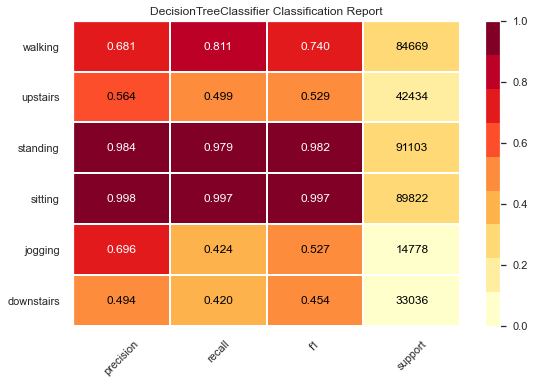

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [121]:
classes=['downstairs','jogging','sitting','standing','upstairs','walking']
visualizer = ClassificationReport(dt_classifier, classes=classes, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#### Observations
- Precision score tells the % of correct +ve prediction we predicted out of total +ve prediction we predicted.        
- Recall tells the % of correct +ve prediction we detect out of total actual +ve.   
- f1 score is the harmonic mean of precision and recall, f1 score is high only if both precision and recall are high. 
- Support is the number of actual occurrences of the class in the specified dataset.   






#### For Decision Tree
- 'sitting' class has precision of 0.998 which means that out of total +ve prediction we predict, it is correct 99.8% of time. 
- 'sitting' has the recall score of 0.997 which means that it detect 99.7% of the 'sitting' class.
- 'f1 score' has high value for 'sitting' class because it has high value of both precision and recall.

- Similarly we can intrepret the results based on required class.

#### Accuracy Score

In [122]:
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy score: 0.8114753176971802


#### K-fold cross validation

In [123]:
accuracy_knn = cross_val_score(dt_classifier, X_test, y_test, scoring='accuracy', cv = 5)
print(accuracy_knn)

[0.80210485 0.8027512  0.80155407 0.80574134 0.8024674 ]


## 5. Random Forest Tree

#### Model training

In [124]:
rf_classifier = RandomForestClassifier(n_estimators=30)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

#### Predicting classs of X_test

In [125]:
y_pred=rf_classifier.predict(X_test)

#### Confusion matrix

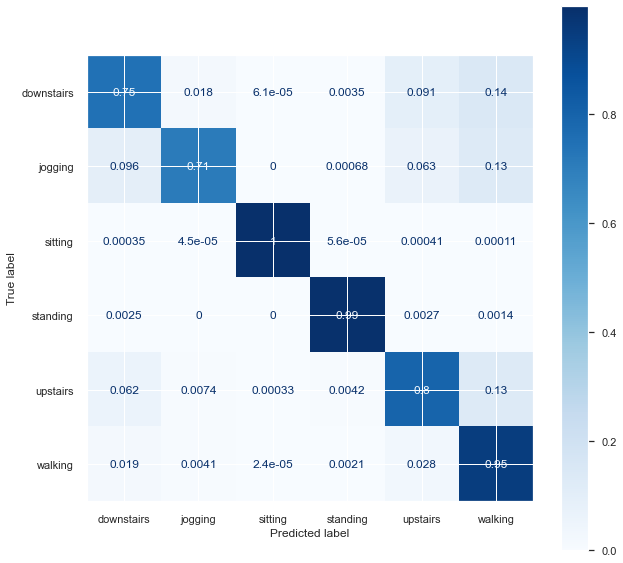

In [126]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rf_classifier, X_test, y_test,normalize='true',cmap=plt.cm.Blues, ax=ax)

#### Classification report

In [127]:
clf_report=classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

  downstairs       0.81      0.75      0.77     33036
     jogging       0.89      0.71      0.79     14778
     sitting       1.00      1.00      1.00     89822
    standing       0.99      0.99      0.99     91103
    upstairs       0.84      0.80      0.82     42434
     walking       0.87      0.95      0.91     84669

    accuracy                           0.93    355842
   macro avg       0.90      0.87      0.88    355842
weighted avg       0.93      0.93      0.92    355842



#### Poltting Classification report matrix

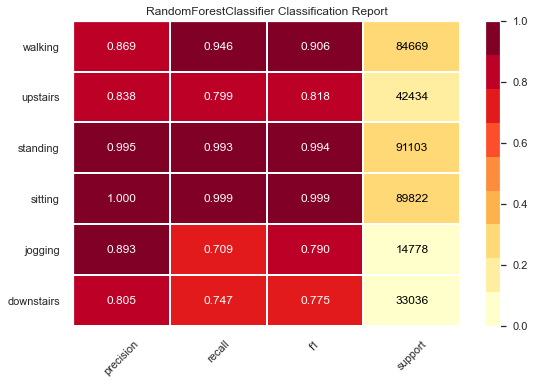

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [128]:
classes=['downstairs','jogging','sitting','standing','upstairs','walking']
visualizer = ClassificationReport(rf_classifier, classes=classes, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#### Observations
- Precision score tells the % of correct +ve prediction we predicted out of total +ve prediction we predicted.        
- Recall tells the % of correct +ve prediction we detect out of total actual +ve.   
- f1 score is the harmonic mean of precision and recall, f1 score is high only if both precision and recall are high. 
- Support is the number of actual occurrences of the class in the specified dataset.   






#### For Random Forest Tree
- 'sitting' class has precision of 1.0 which means that out of total +ve prediction we predict, it is correct 100% of time. 
- 'sitting' has the recall score of 0.999 which means that it detect 99.9% of the 'sitting' class.
- 'f1 score' has high value for 'sitting' class because it has high value of both precision and recall.

- Similarly we can intrepret the results based on required class.

#### Accuracy score

In [129]:
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy score: 0.9257760466723995


#### K-fold cross validation

In [130]:
accuracy_knn = cross_val_score(rf_classifier, X_test, y_test, scoring='accuracy', cv = 5)
print(accuracy_knn)

[0.90592814 0.90070115 0.90276529 0.90483082 0.90376293]


In [131]:
rf_classifier.predict([[0.616055,1.811367,0.247613,1.960435,-1.989792,-1.313611,-0.003781,-0.008887,-0.014913,-0.019858,-0.076568,-0.144614]])

array(['sitting'], dtype=object)

#### Result
- The predicted result is correct.

In [132]:
test_set_without_outliers.iloc[12921,:]

attitude.roll         -0.174186
attitude.pitch        0.0245762
attitude.yaw         -0.0910931
gravity.x             -0.842933
gravity.y              0.218071
gravity.z             -0.857376
rotationRate.x         0.726563
rotationRate.y        -0.772164
rotationRate.z       -0.0357857
userAcceleration.x     0.483878
userAcceleration.y     -1.09539
userAcceleration.z      1.39048
Action                  walking
Name: 1360701, dtype: object

In [133]:
rf_classifier.predict([[-0.174186,0.0245762,-0.0910931,-0.842933,0.218071,-0.857376,0.726563,-0.772164,-0.0357857,0.483878,-1.09539,1.39048]])

array(['walking'], dtype=object)

#### Result
- Above prediction is correct